In [1]:
import sys
sys.dont_write_bytecode = True
import os
from itertools import product
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from src.models.train_model import BTCForecasting

import pickle
import gc

from src.utils.utils import *
from src.utils.constants import *
from src.visualization.visualize import *

In [2]:
TRAIN = False

In [3]:
# Classifiers

classifiers = {
    'Decision_Tree': DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'),
    'RFC_balanced_subsample': RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced_subsample', n_jobs=-1),
}

In [4]:
# Training params

view_params = {
    'candles': {
        'use_smoteenn': False,
        'feature_selection': 'sfm',
        'factor': 2,
        'aggresive_elimination': False,
        'n_splits': 5,
        'classifier__max_depth': range(1, 20),
        'classifier__min_samples_leaf': range(1, 10, 1),
        'classifier__min_samples_split': range(2, 20, 2),
        'classifier__max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70],
    },
    'orderbook': {
        'use_smoteenn': False,
        'feature_selection': 'sfm',
        'factor': 2,
        'aggresive_elimination': False,
        'n_splits': 5,
        'classifier__max_depth': range(1, 20),
        'classifier__min_samples_leaf': range(1, 10, 1),
        'classifier__min_samples_split': range(2, 20, 2),
        'classifier__max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70],
    },
    'unified': {
        'use_smoteenn': False,
        'feature_selection': 'sfm',
        'factor': 2,
        'aggresive_elimination': False,
        'n_splits': 5,
        'classifier__max_depth': range(1, 20),
        'classifier__min_samples_leaf': range(1, 10, 1),
        'classifier__min_samples_split': range(2, 20, 2),
        'classifier__max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70],
    }
}

In [5]:
# Import data

data = {
    (exchange, data_type): pd.read_parquet(
        os.path.join(INTERIM_DATA_PATH, f'{exchange}_{data_type}_data.parquet')
    )
    for exchange, data_type in product(EXCHANGES, DATA_TYPES)
}
data[(ALL, UNIFIED)] = pd.read_parquet(os.path.join(INTERIM_DATA_PATH, f'{ALL}_{UNIFIED}_data.parquet'))

ground_truth = pd.read_parquet(os.path.join(INTERIM_DATA_PATH, 'ground_truth_data.parquet'))

In [6]:
# Training

if TRAIN:

    model_params = {}

    for (name, classifier) in classifiers.items():
        for (exchange, data_type), df in data.items():
            
            params = view_params[data_type]

            use_smoteenn = params['use_smoteenn']
            factor = params['factor']
            aggressive_elimination = params['aggresive_elimination']
            n_splits = params['n_splits']
            
            print(f"\nStarting training {name} model for {exchange} - {data_type}")

            btcf = BTCForecasting(
                df, 
                ground_truth,
                n_splits=n_splits,
                smoteenn=use_smoteenn,
                pca_variance_threshold=PCA_VARIANCE_THRESHOLD,
                feature_selection=params['feature_selection'],
            )

            model_params = {k: v for k, v in params.items() if k.startswith('classifier__')}

            btcf.train(classifier, model_params, factor=factor, aggressive_elimination=aggressive_elimination, verbose=3)

            save_model(btcf, name, exchange, data_type)


Best params for Decision_Tree model for BINANCE - candles
{'classifier__max_depth': 7, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 4}


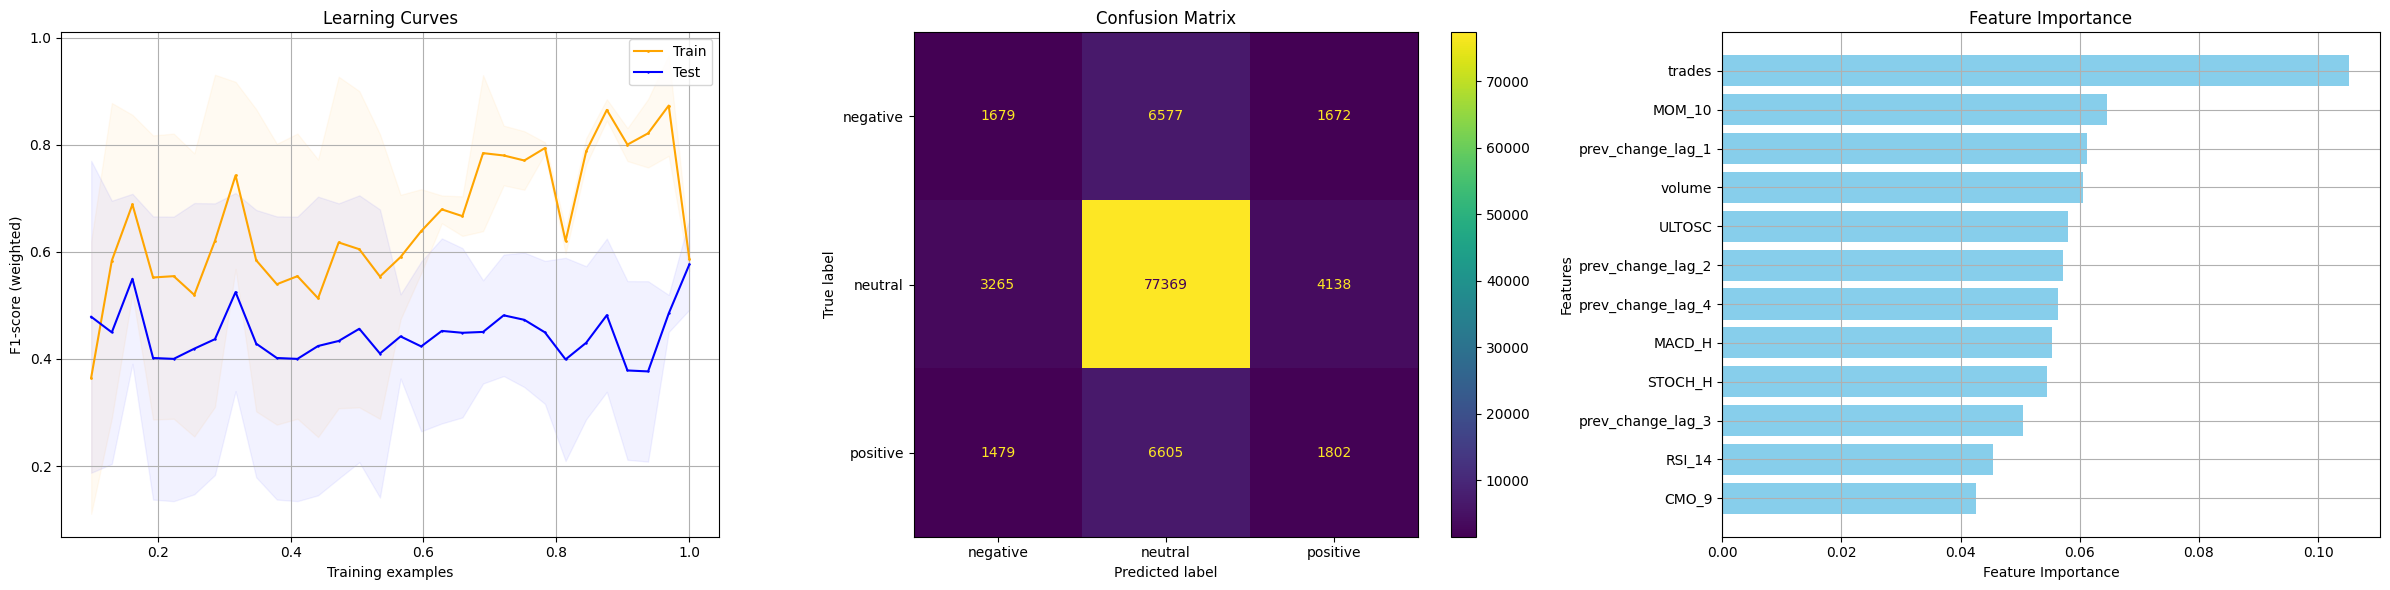

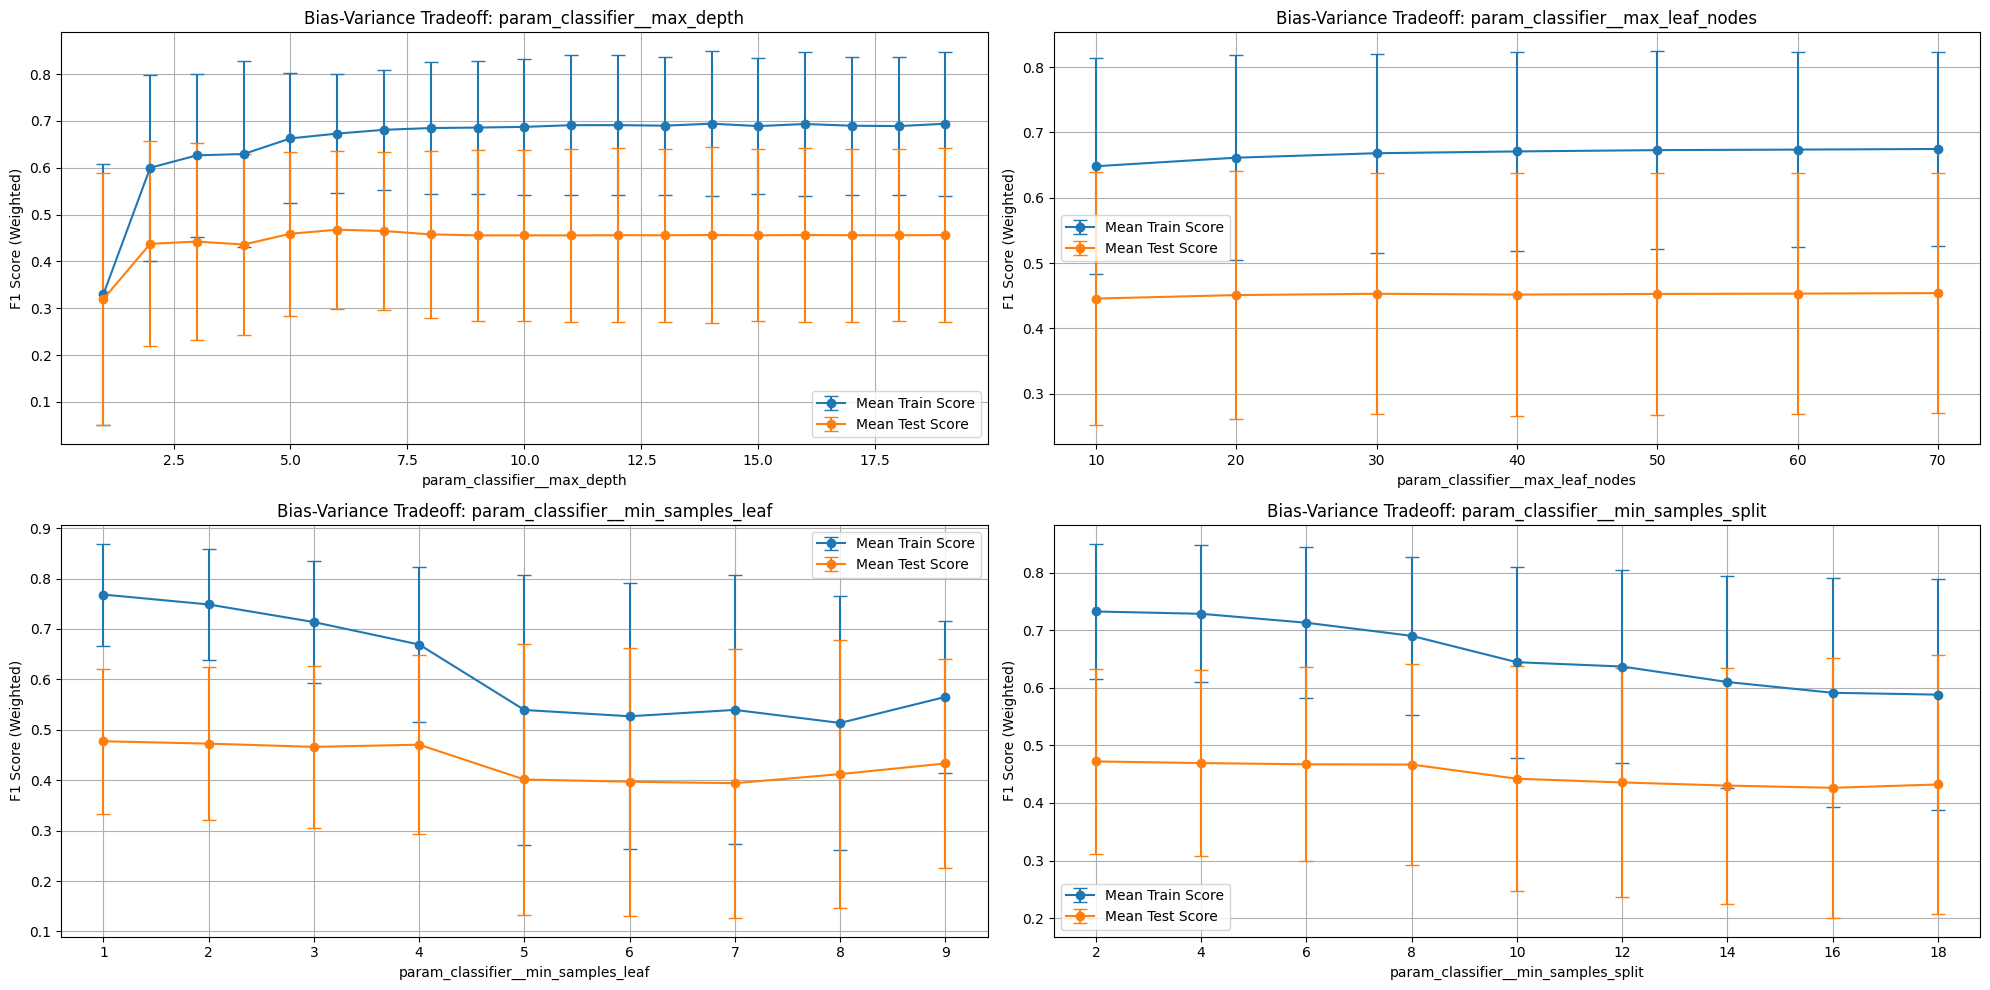


Best params for Decision_Tree model for BINANCE - orderbook
{'classifier__max_depth': 17, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}


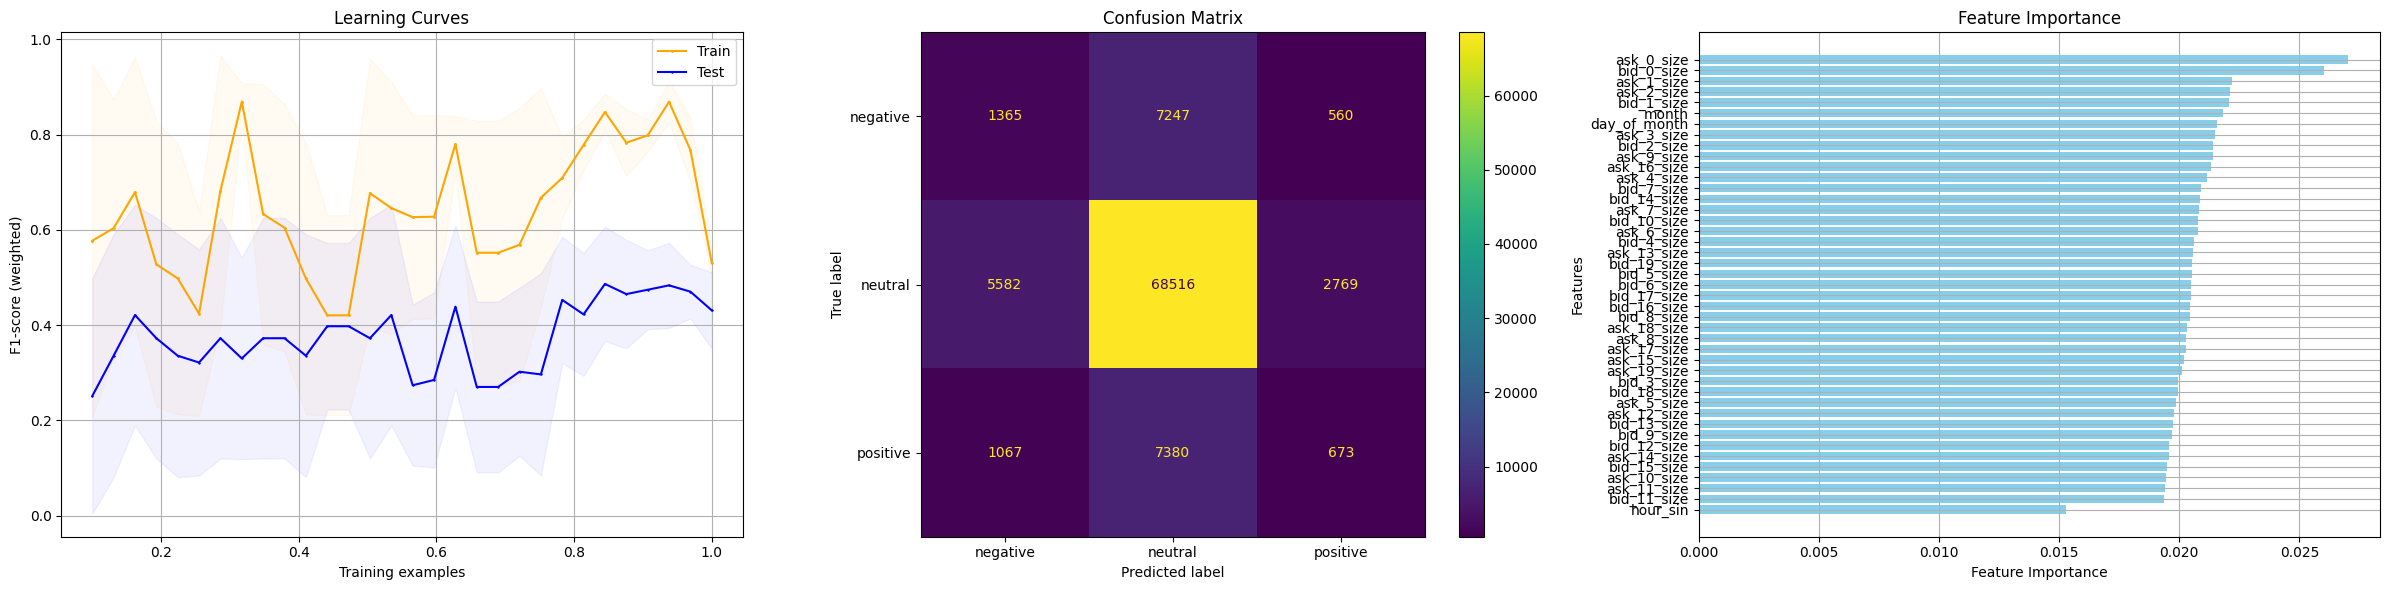

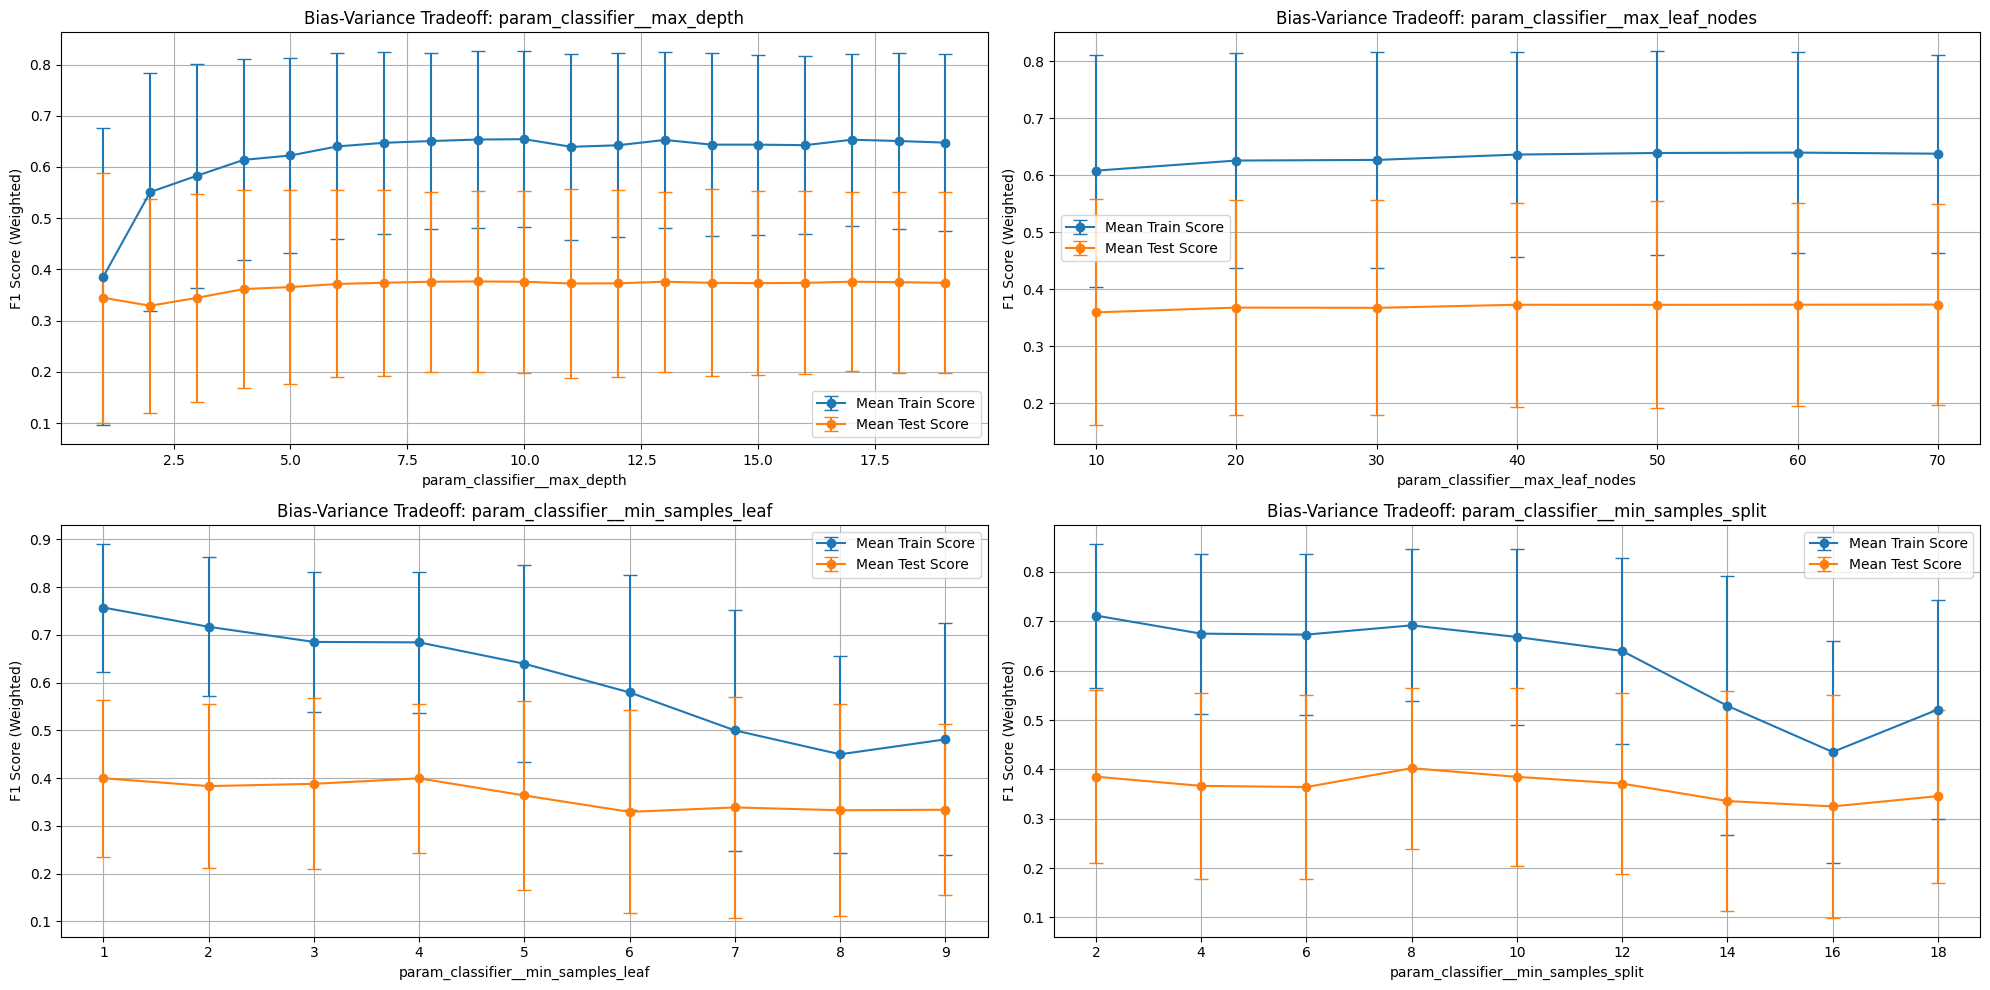


Best params for Decision_Tree model for BINANCE - unified
{'classifier__max_depth': 13, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 8}


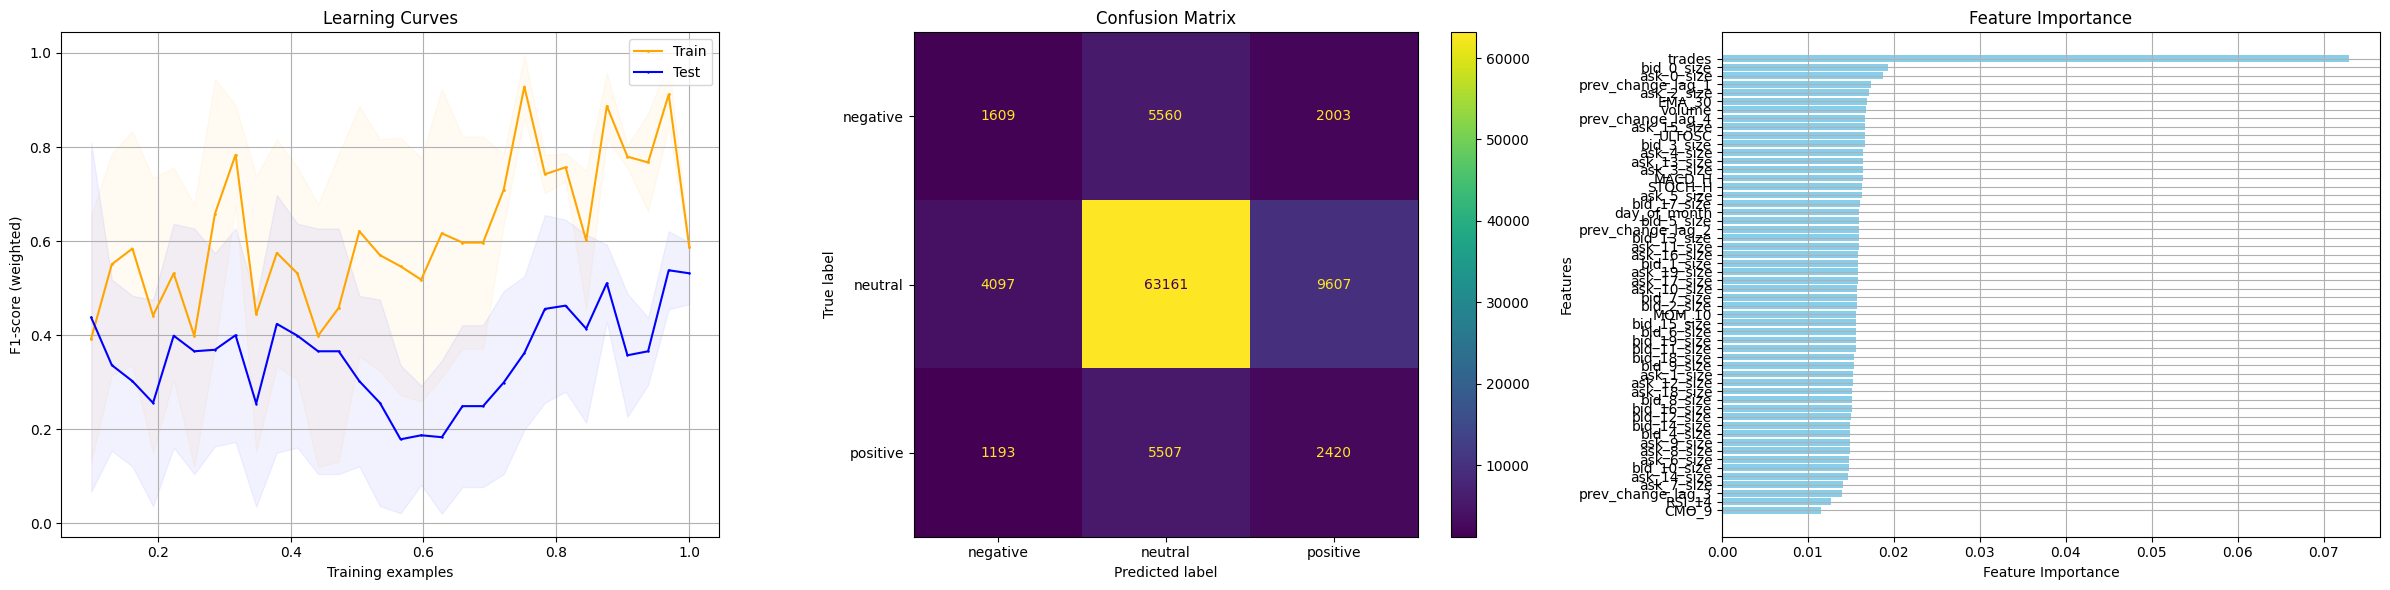

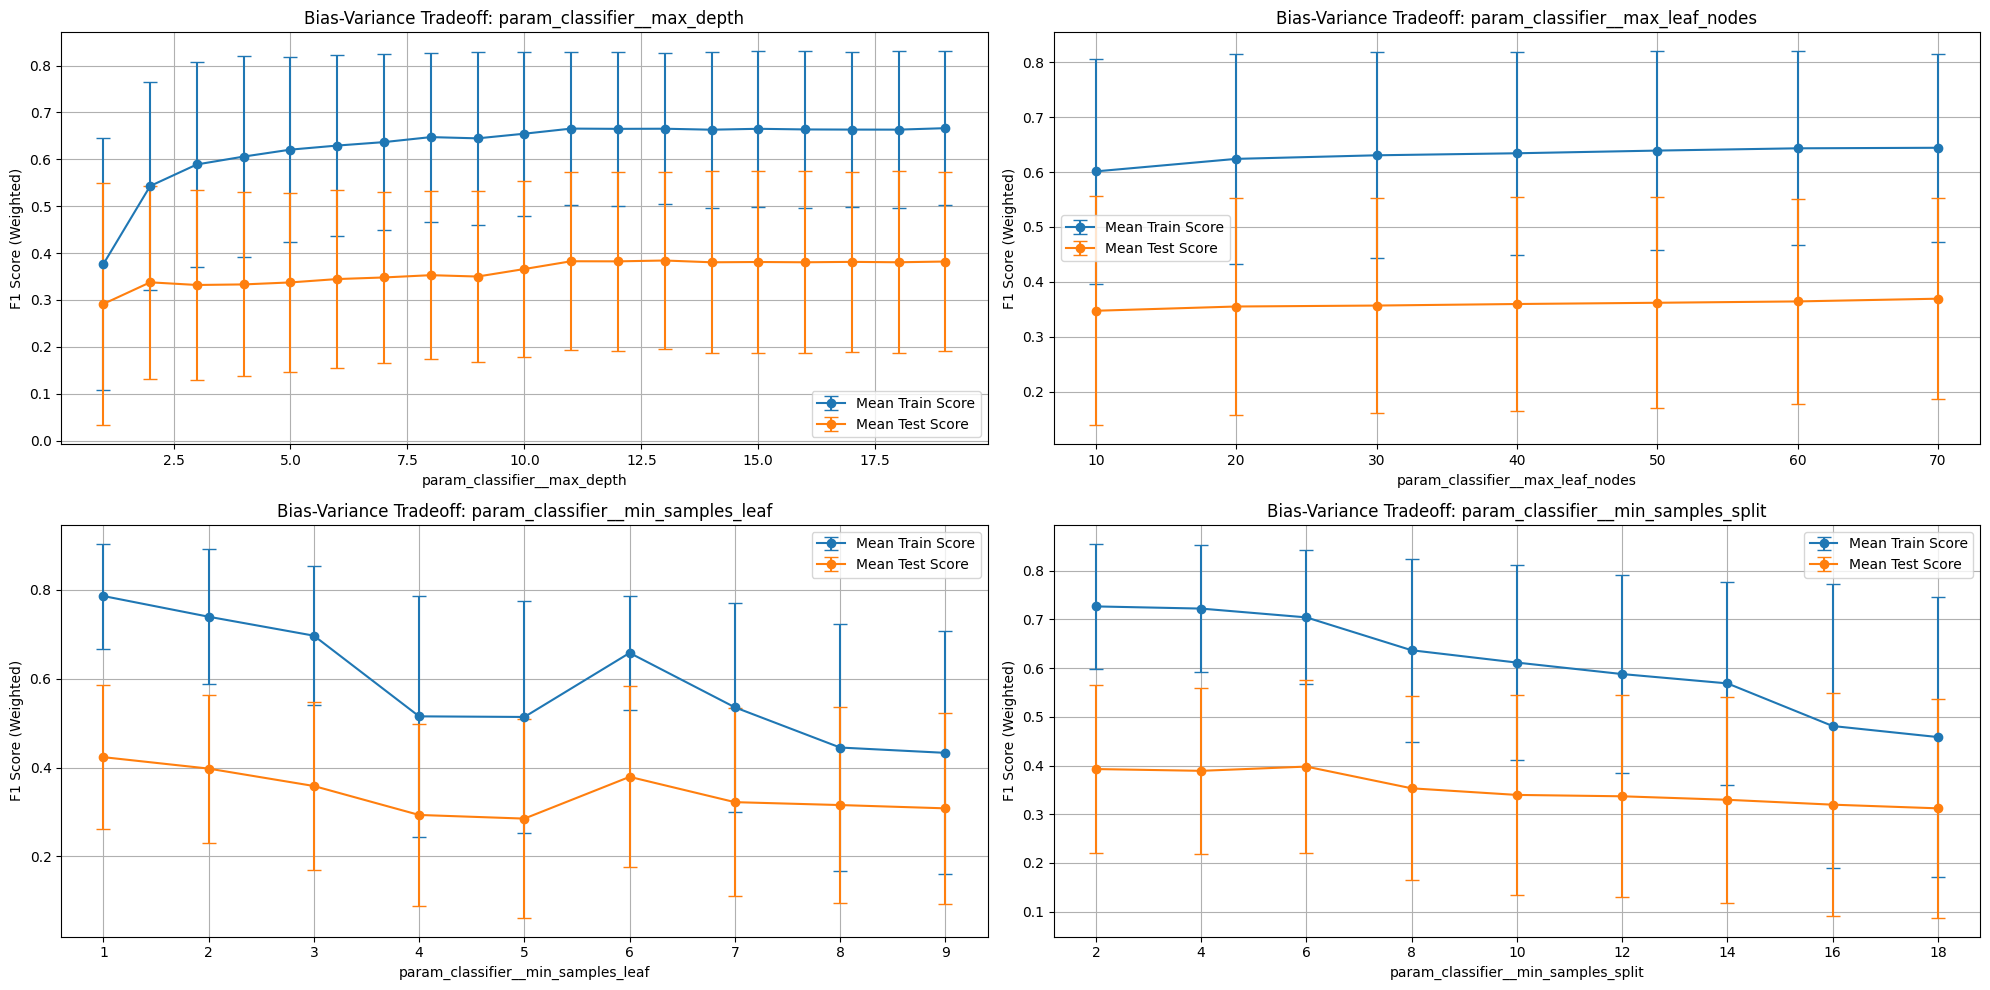


Best params for Decision_Tree model for HUOBI - candles
{'classifier__max_depth': 11, 'classifier__max_leaf_nodes': 60, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


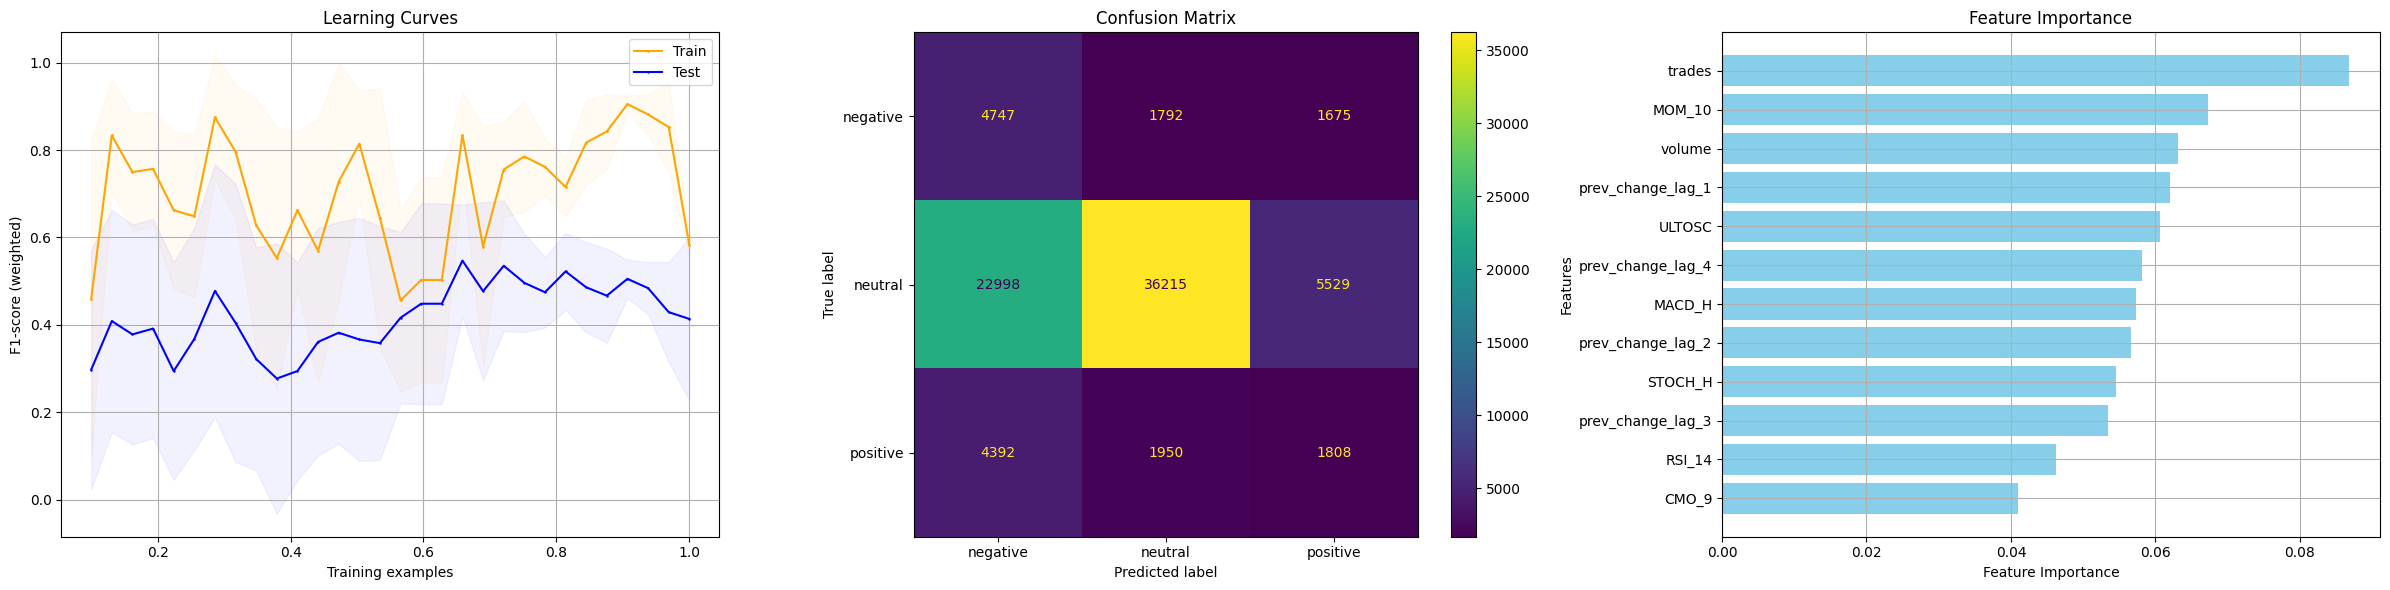

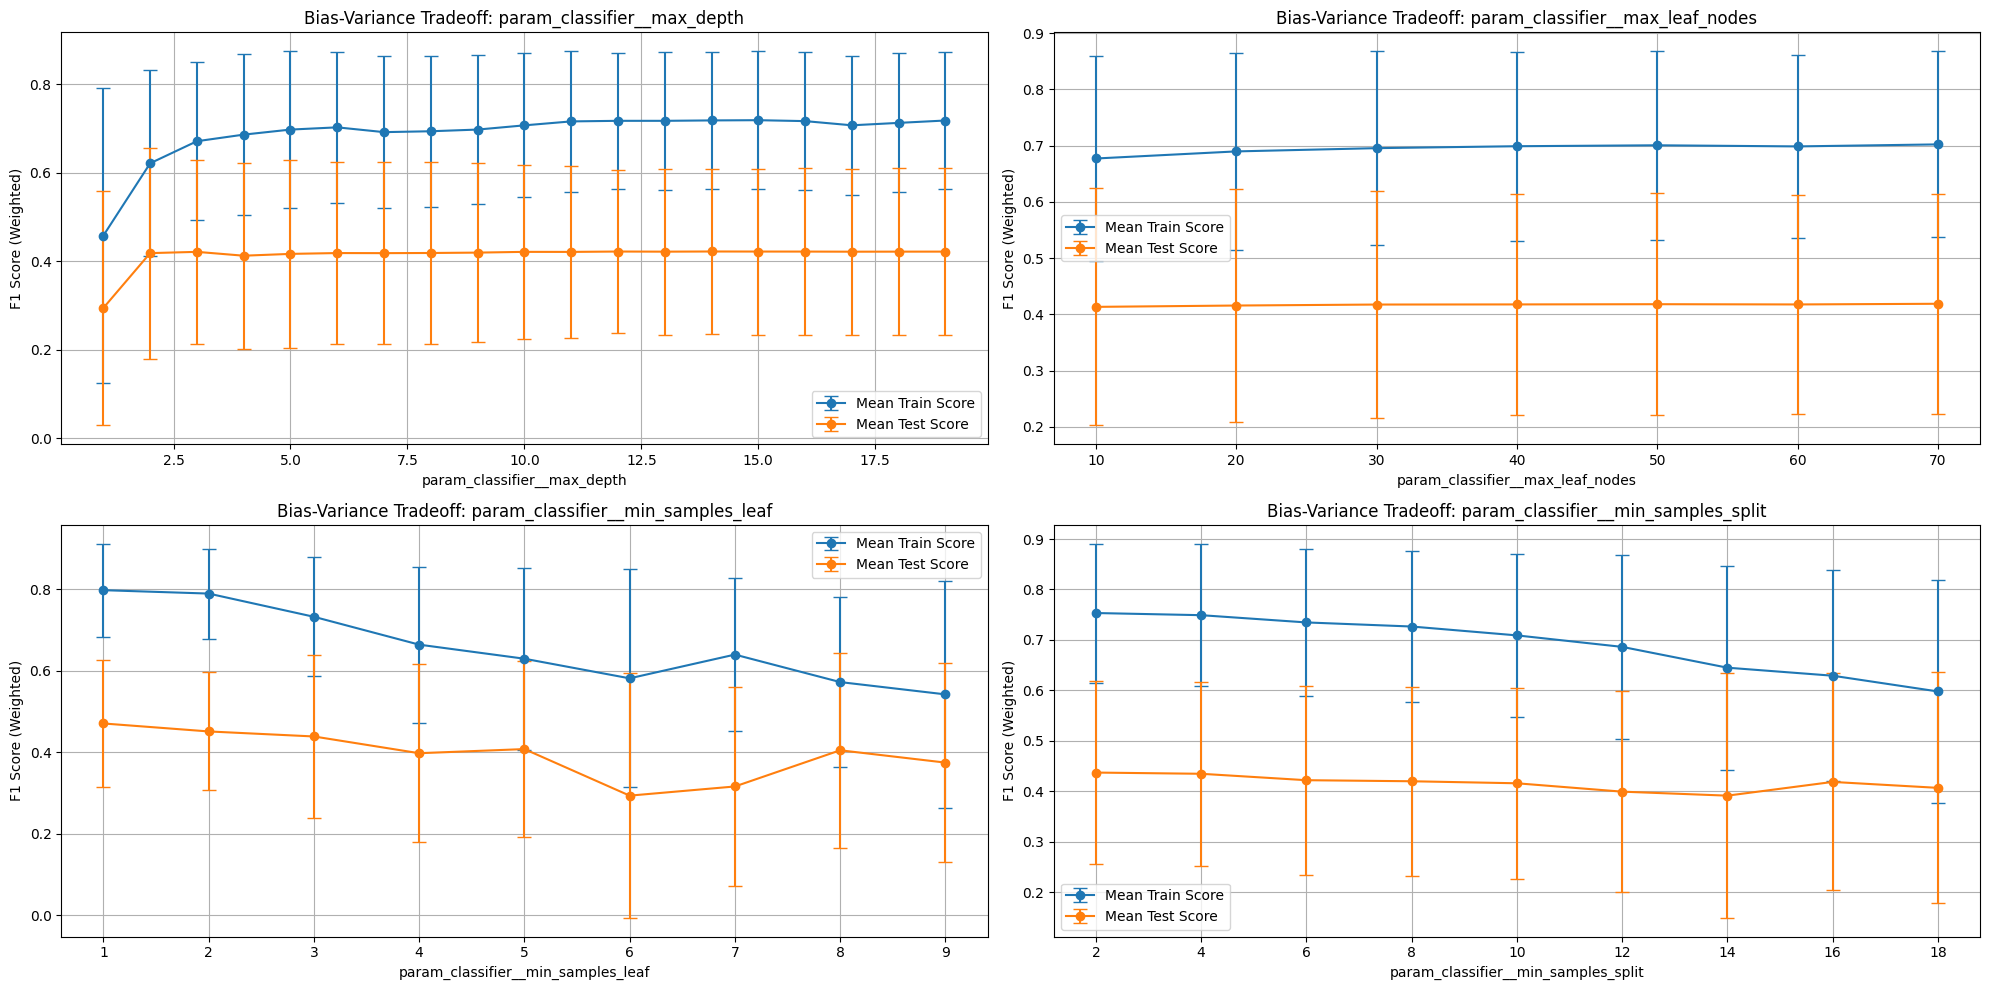


Best params for Decision_Tree model for HUOBI - orderbook
{'classifier__max_depth': 16, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6}


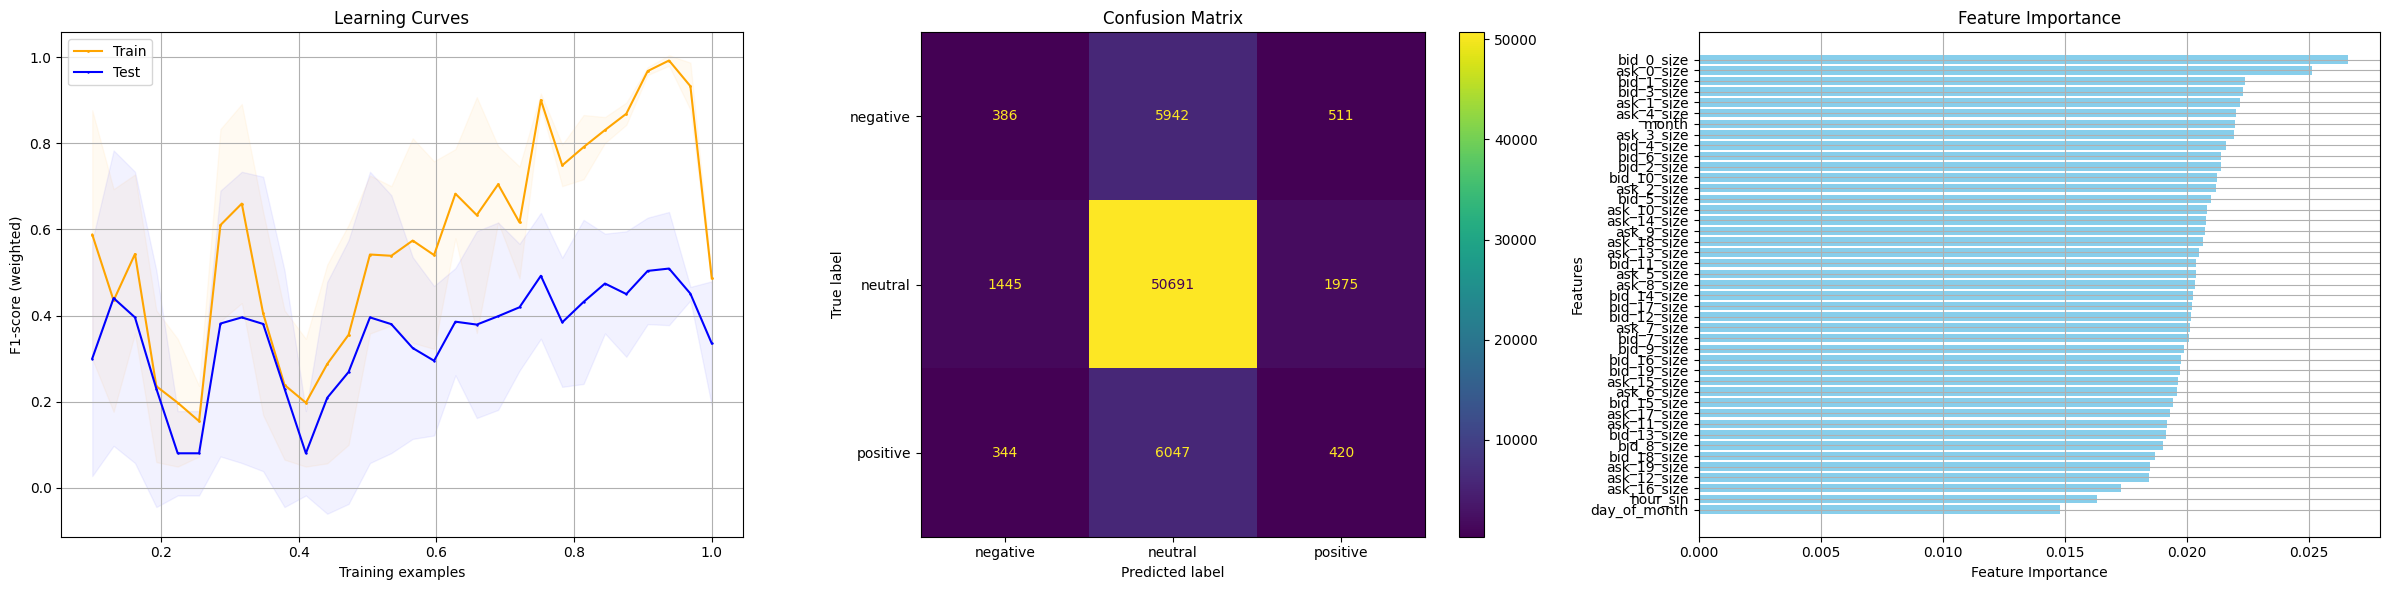

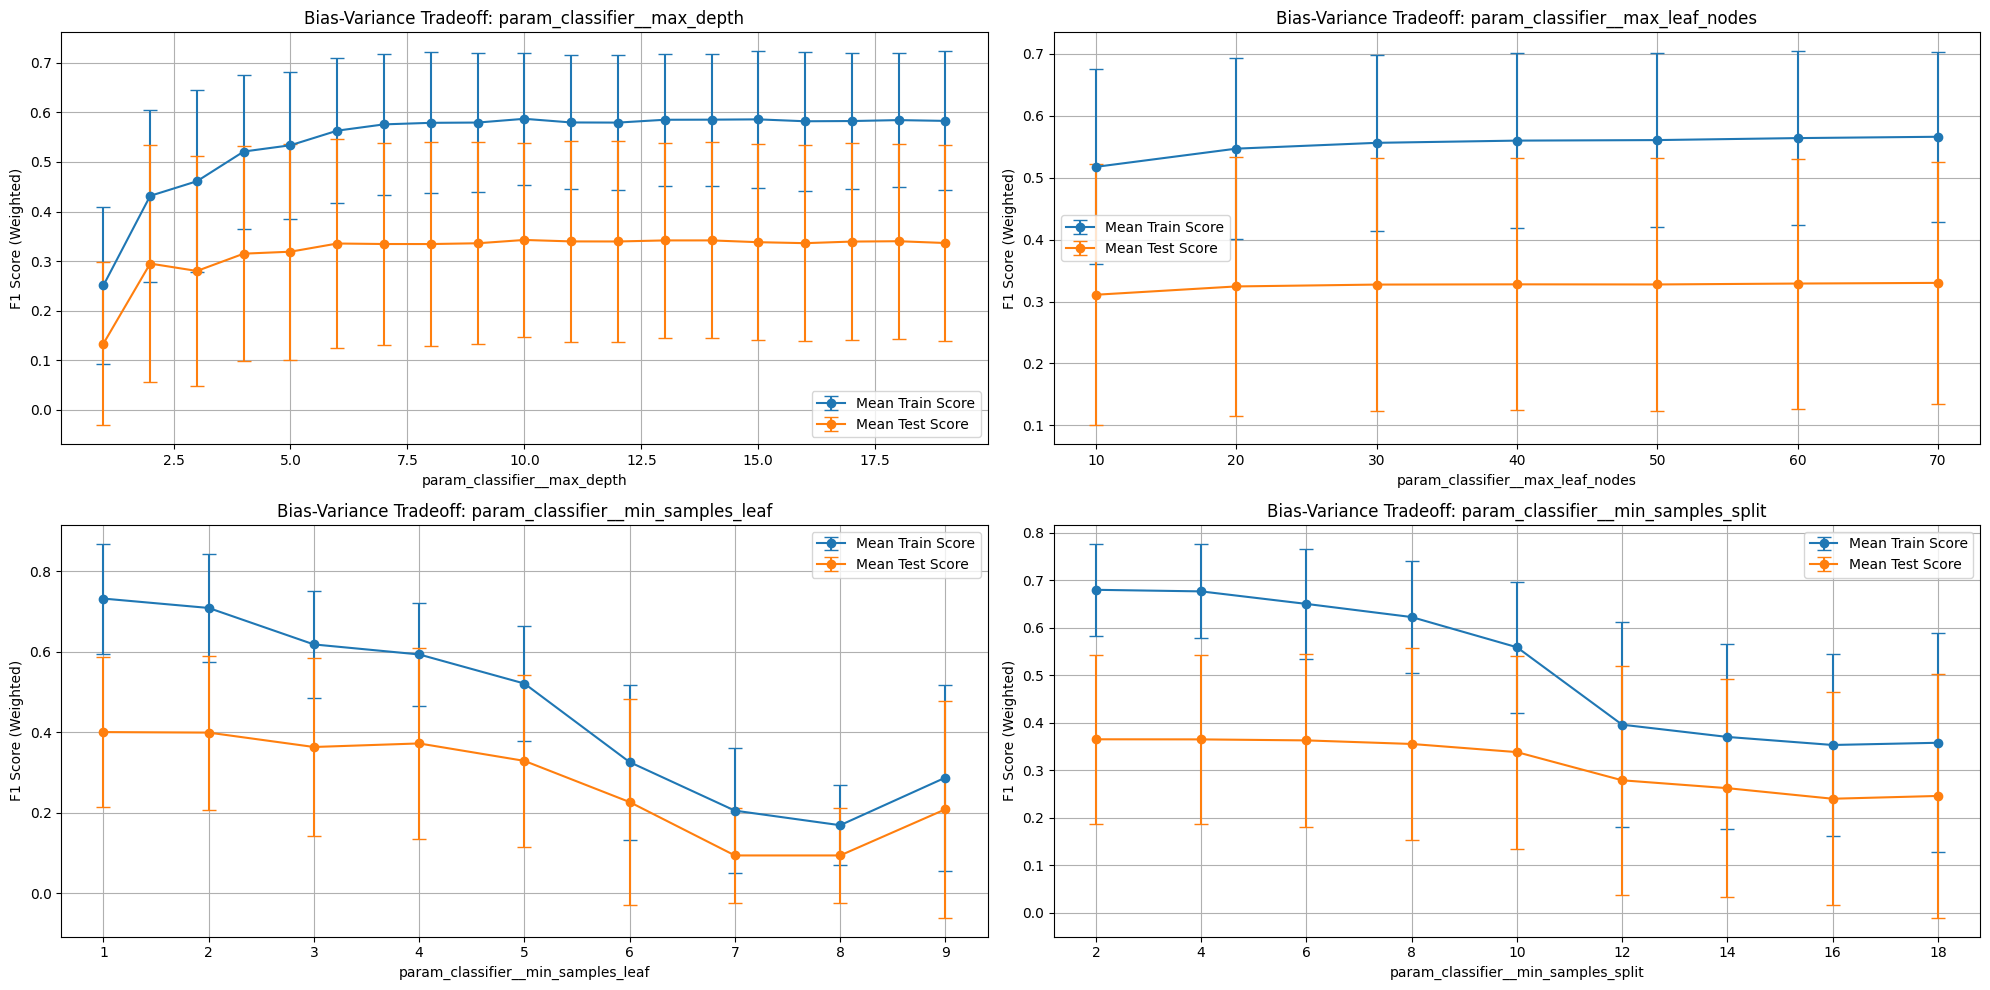


Best params for Decision_Tree model for HUOBI - unified
{'classifier__max_depth': 19, 'classifier__max_leaf_nodes': 60, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 4}


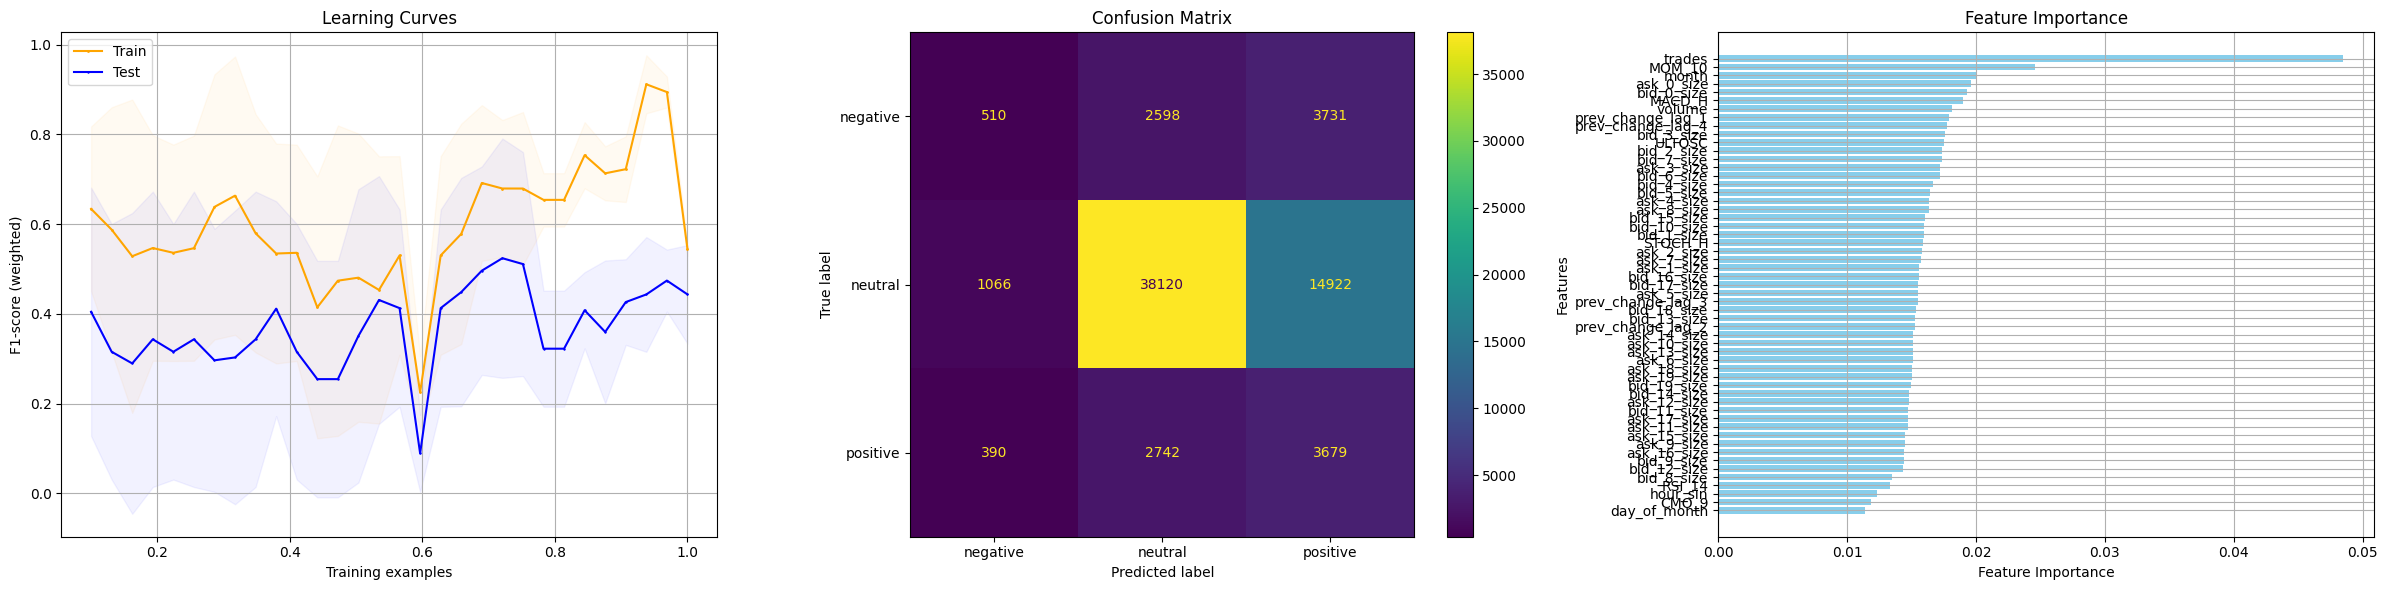

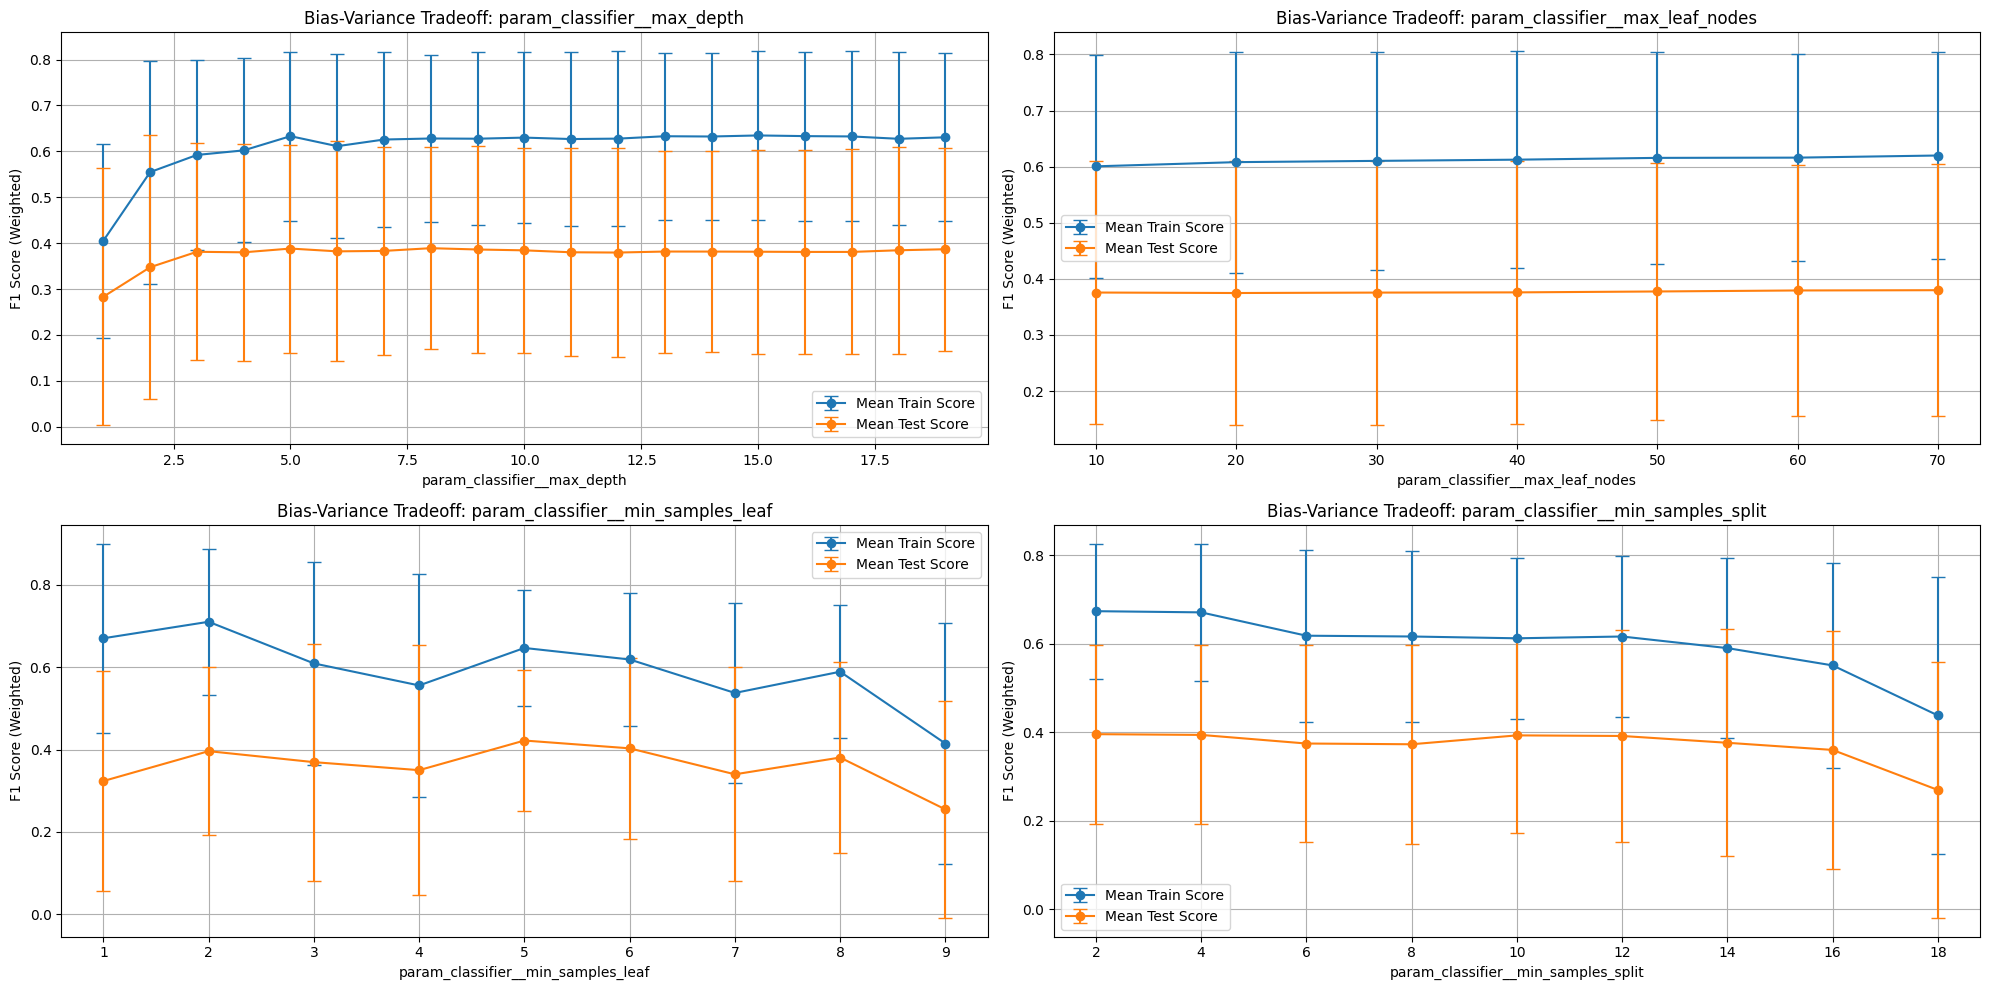


Best params for Decision_Tree model for OKX - candles
{'classifier__max_depth': 9, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6}


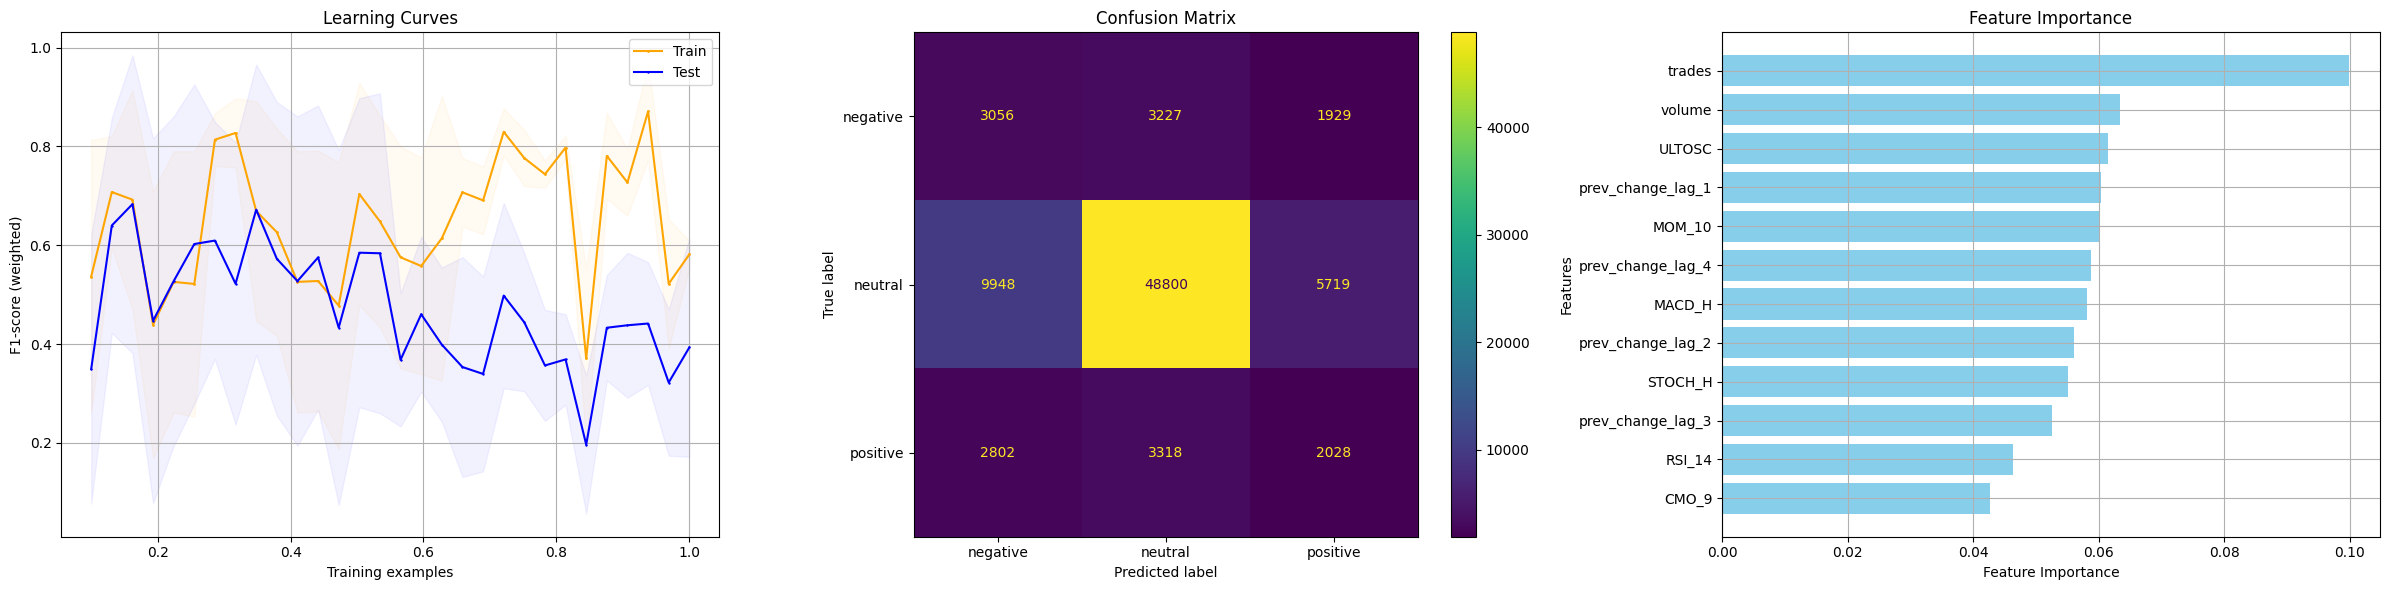

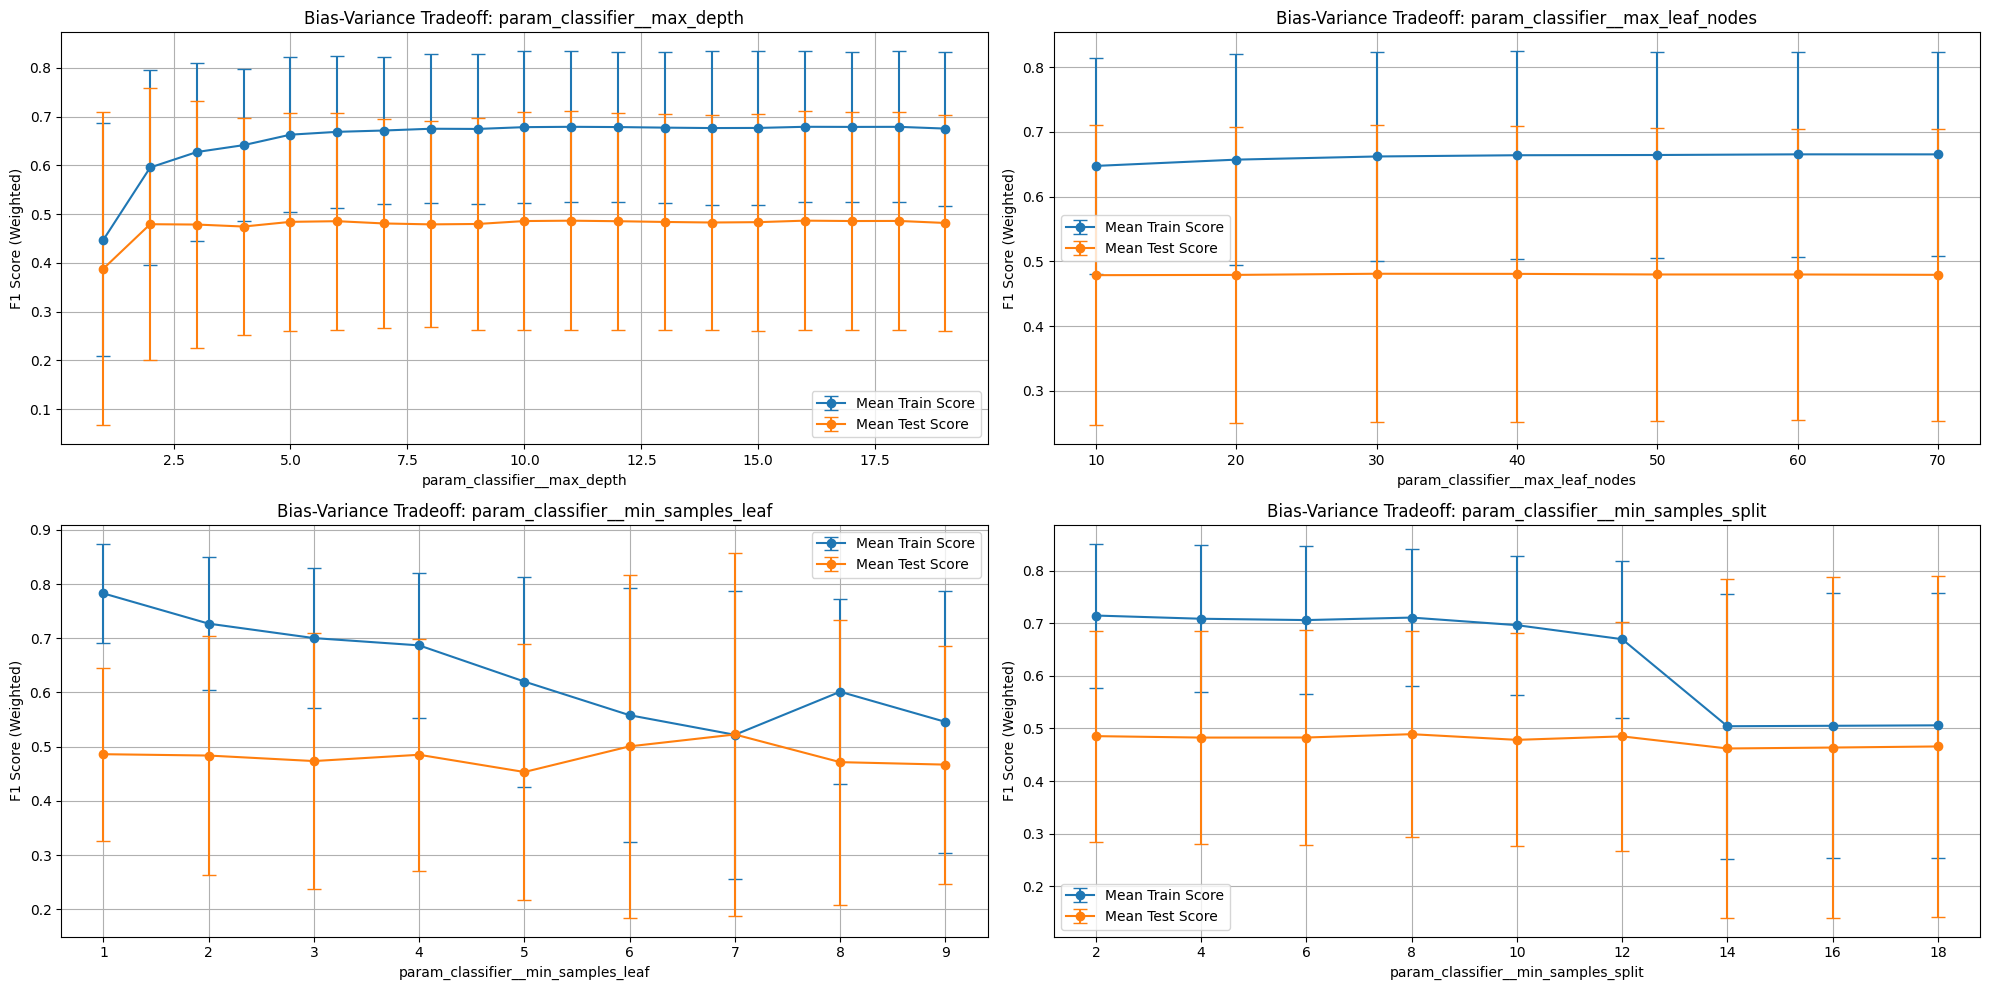


Best params for Decision_Tree model for OKX - orderbook
{'classifier__max_depth': 17, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


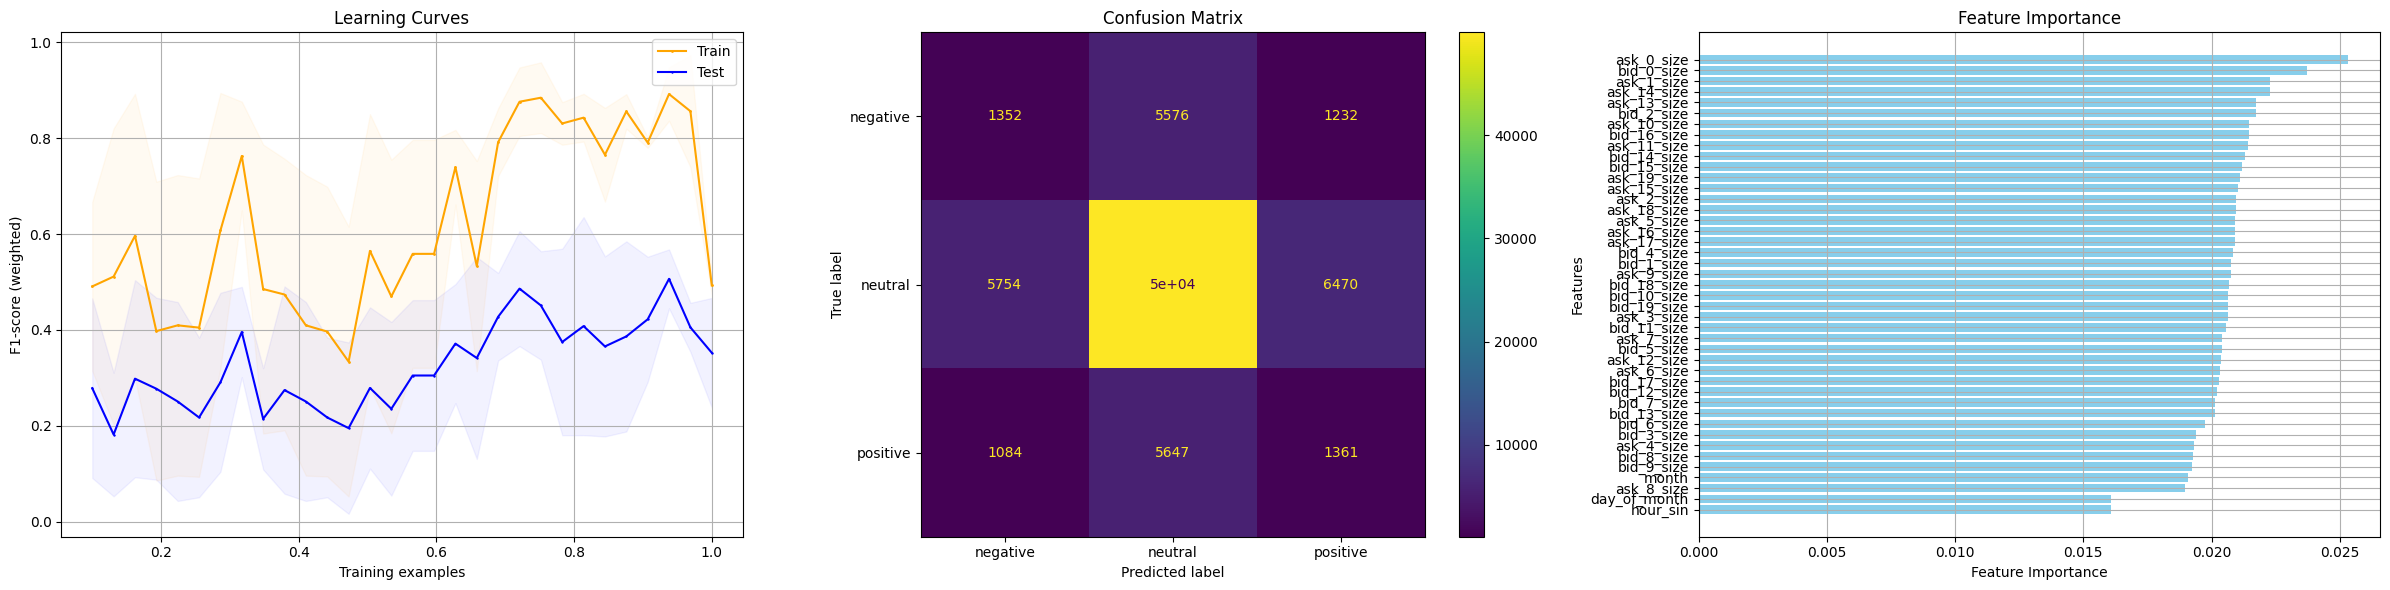

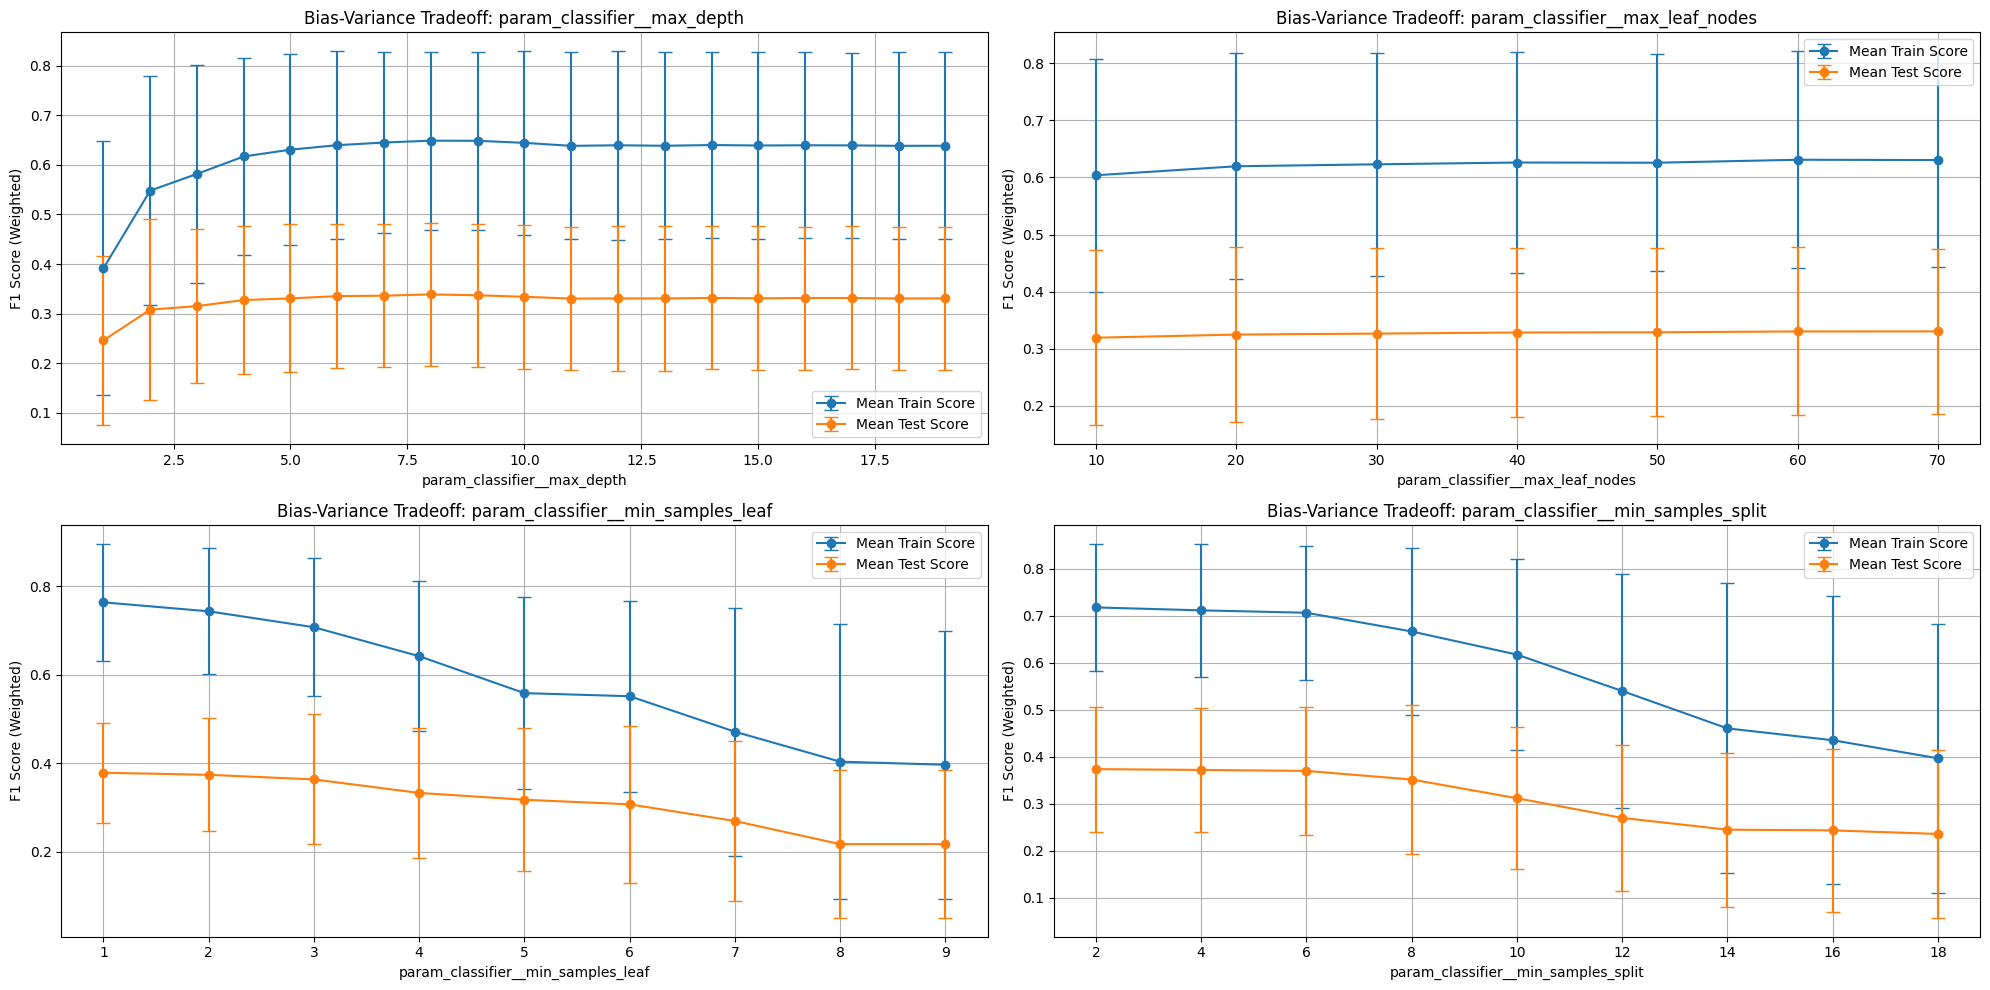


Best params for Decision_Tree model for OKX - unified
{'classifier__max_depth': 8, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6}


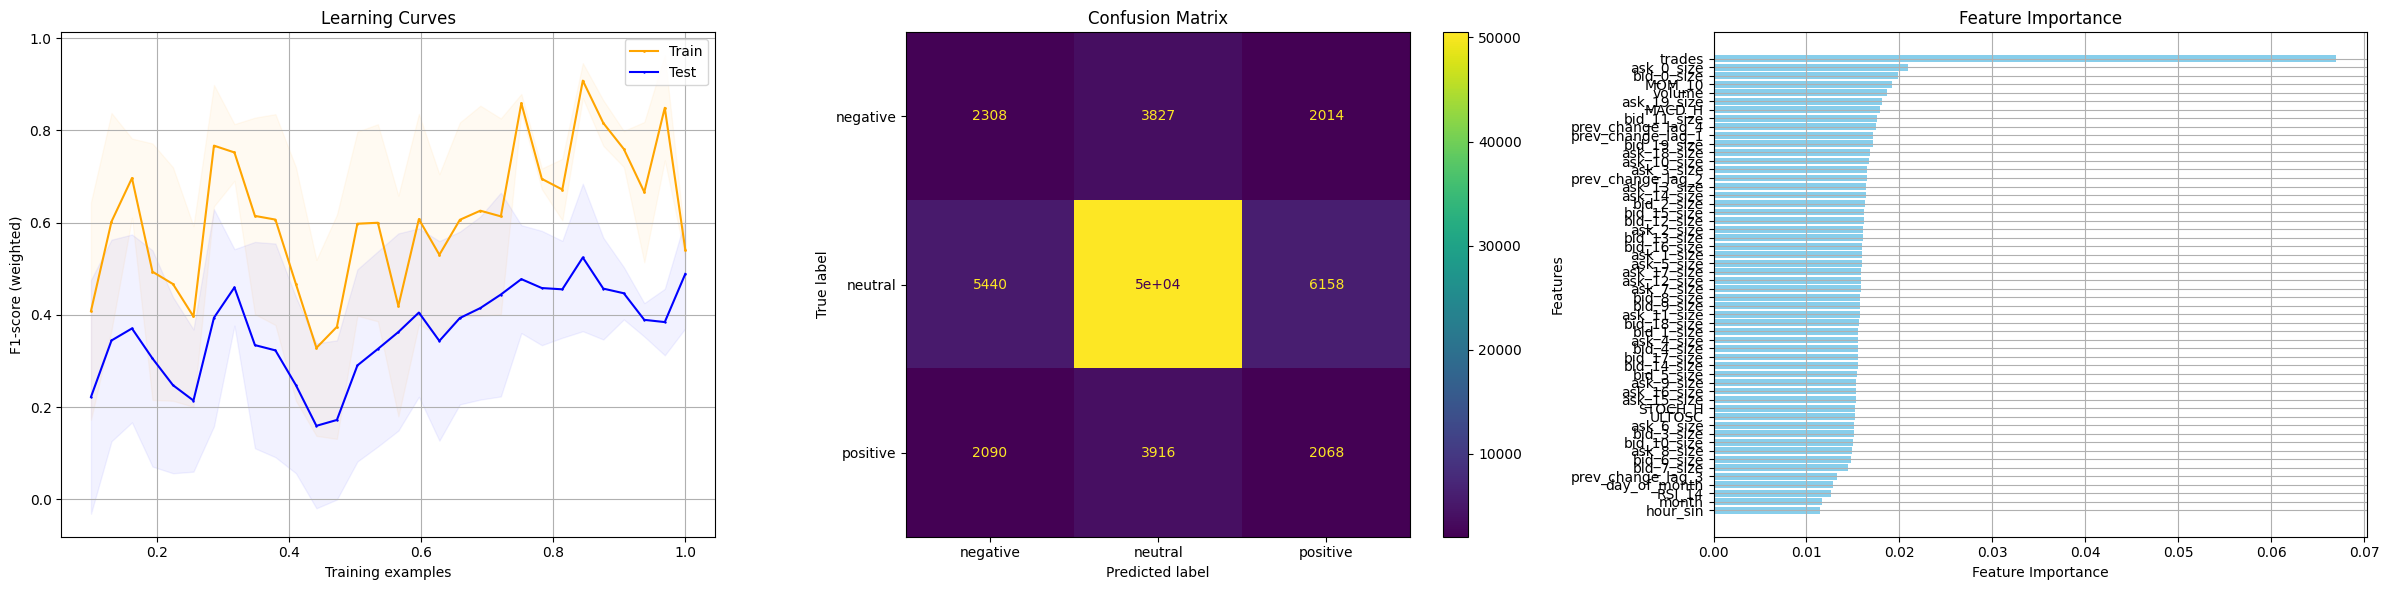

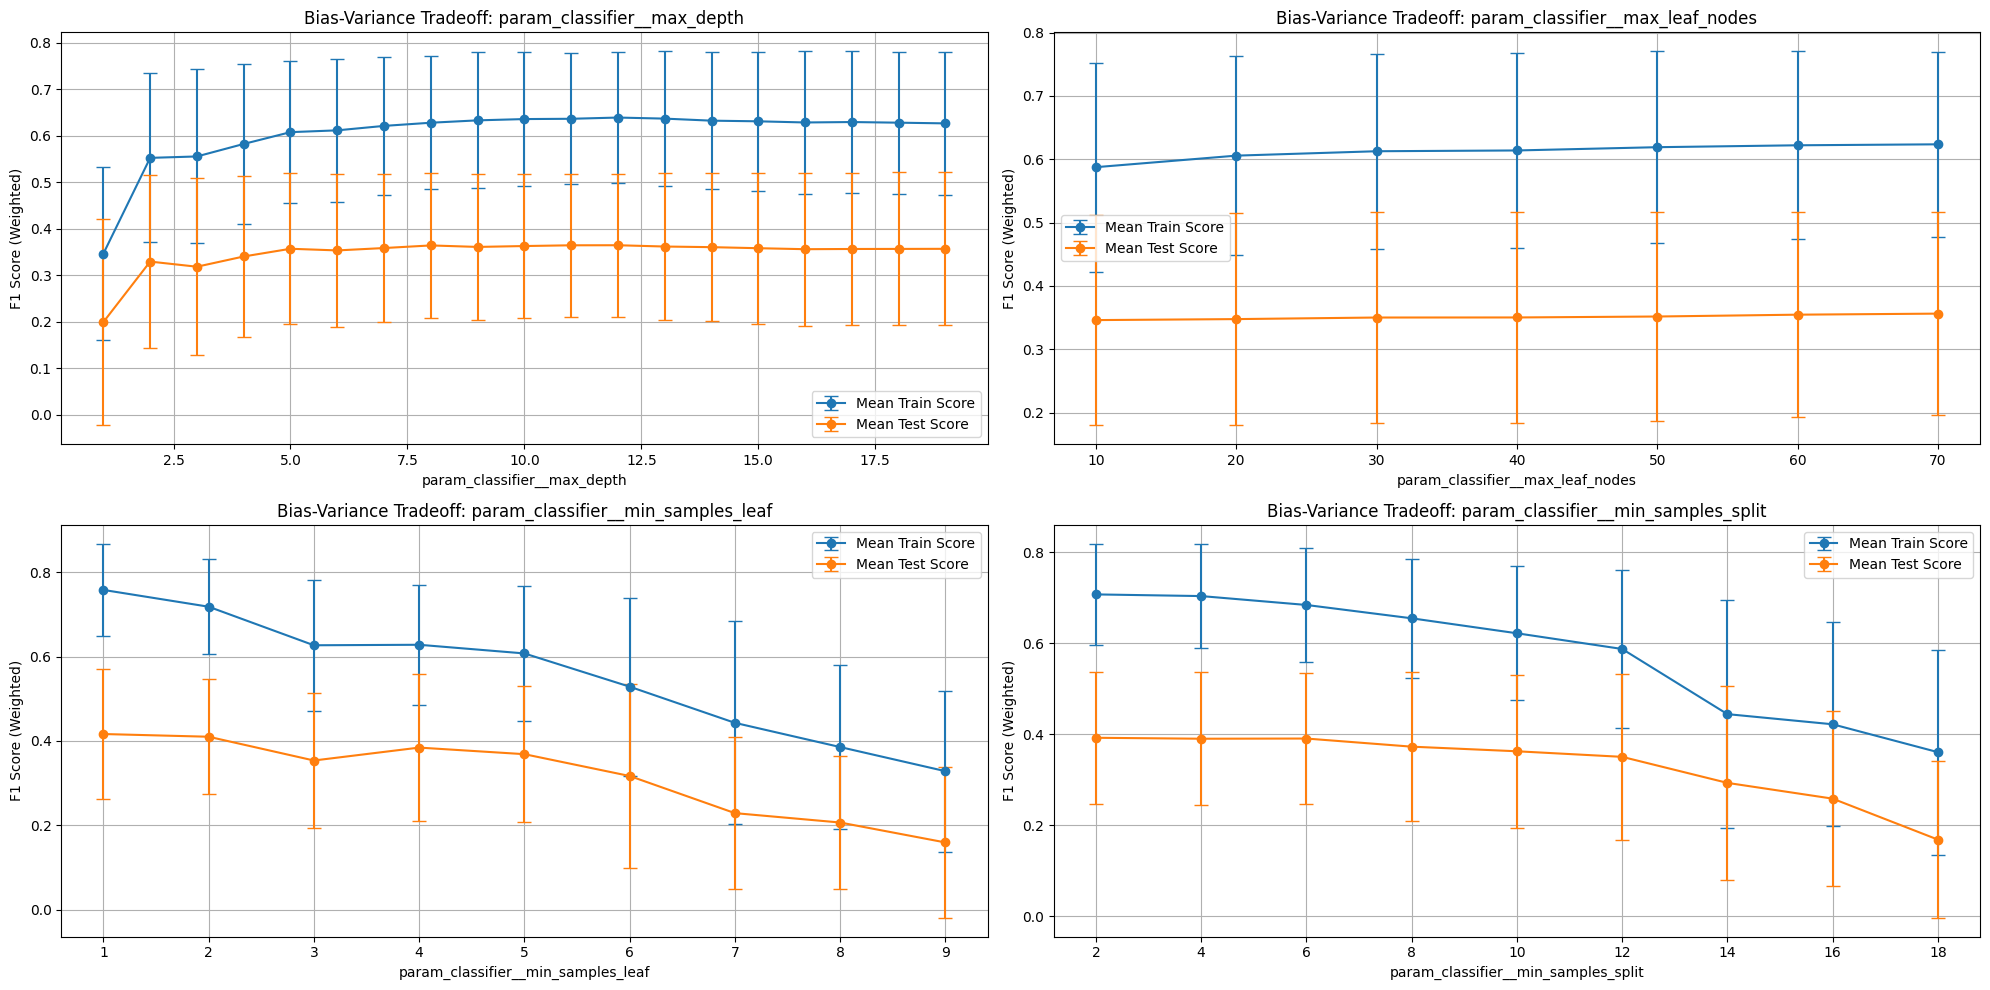


Best params for Decision_Tree model for ALL - unified
{'classifier__max_depth': 14, 'classifier__max_leaf_nodes': 60, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


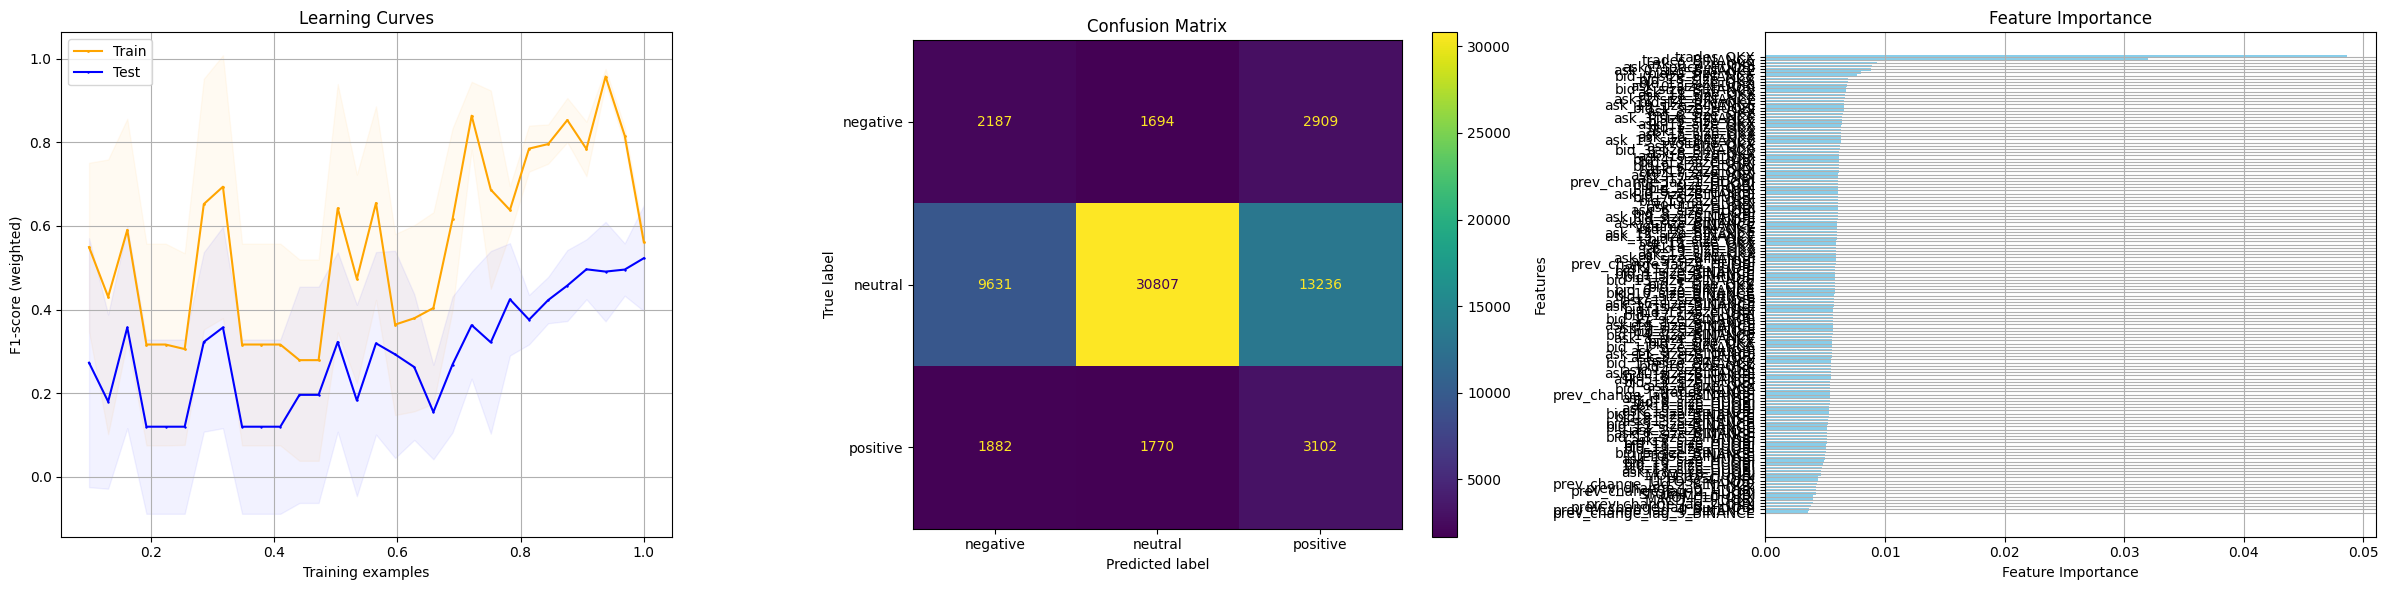

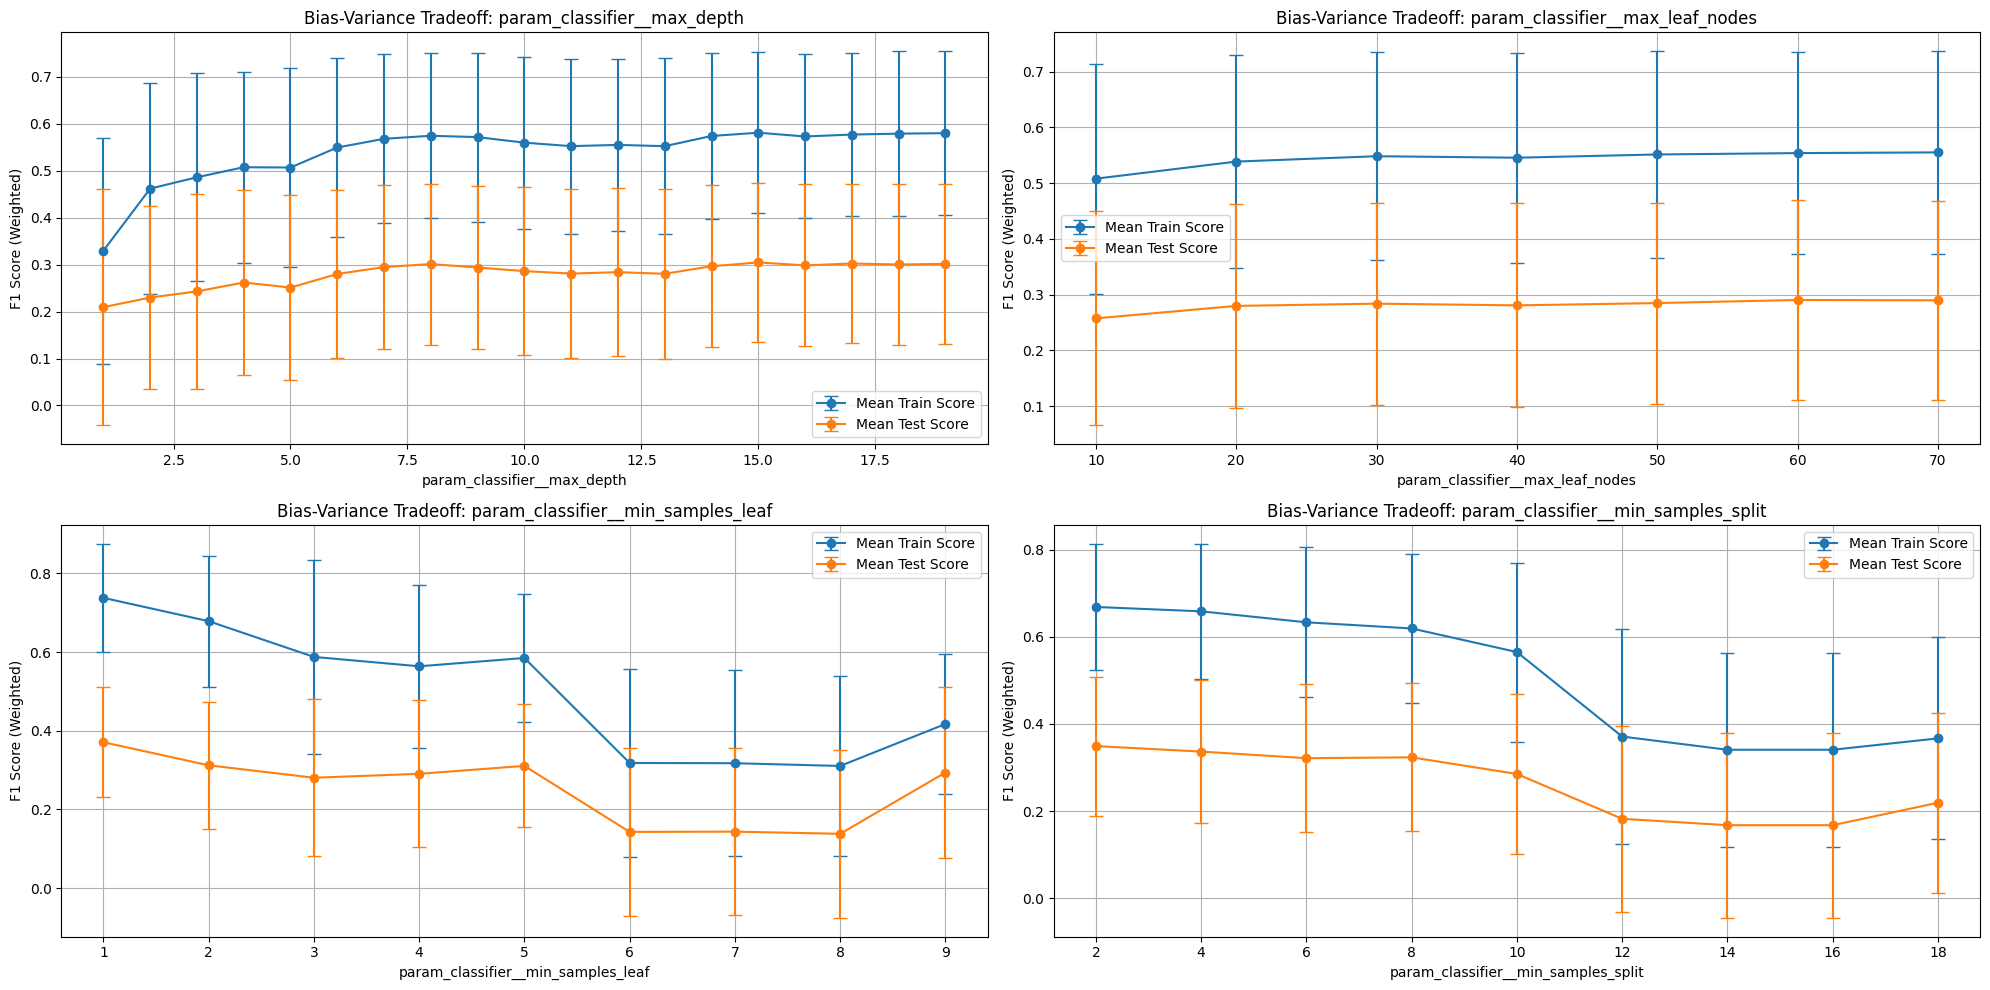


Best params for RFC_balanced_subsample model for BINANCE - candles
{'classifier__max_depth': 10, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 12}


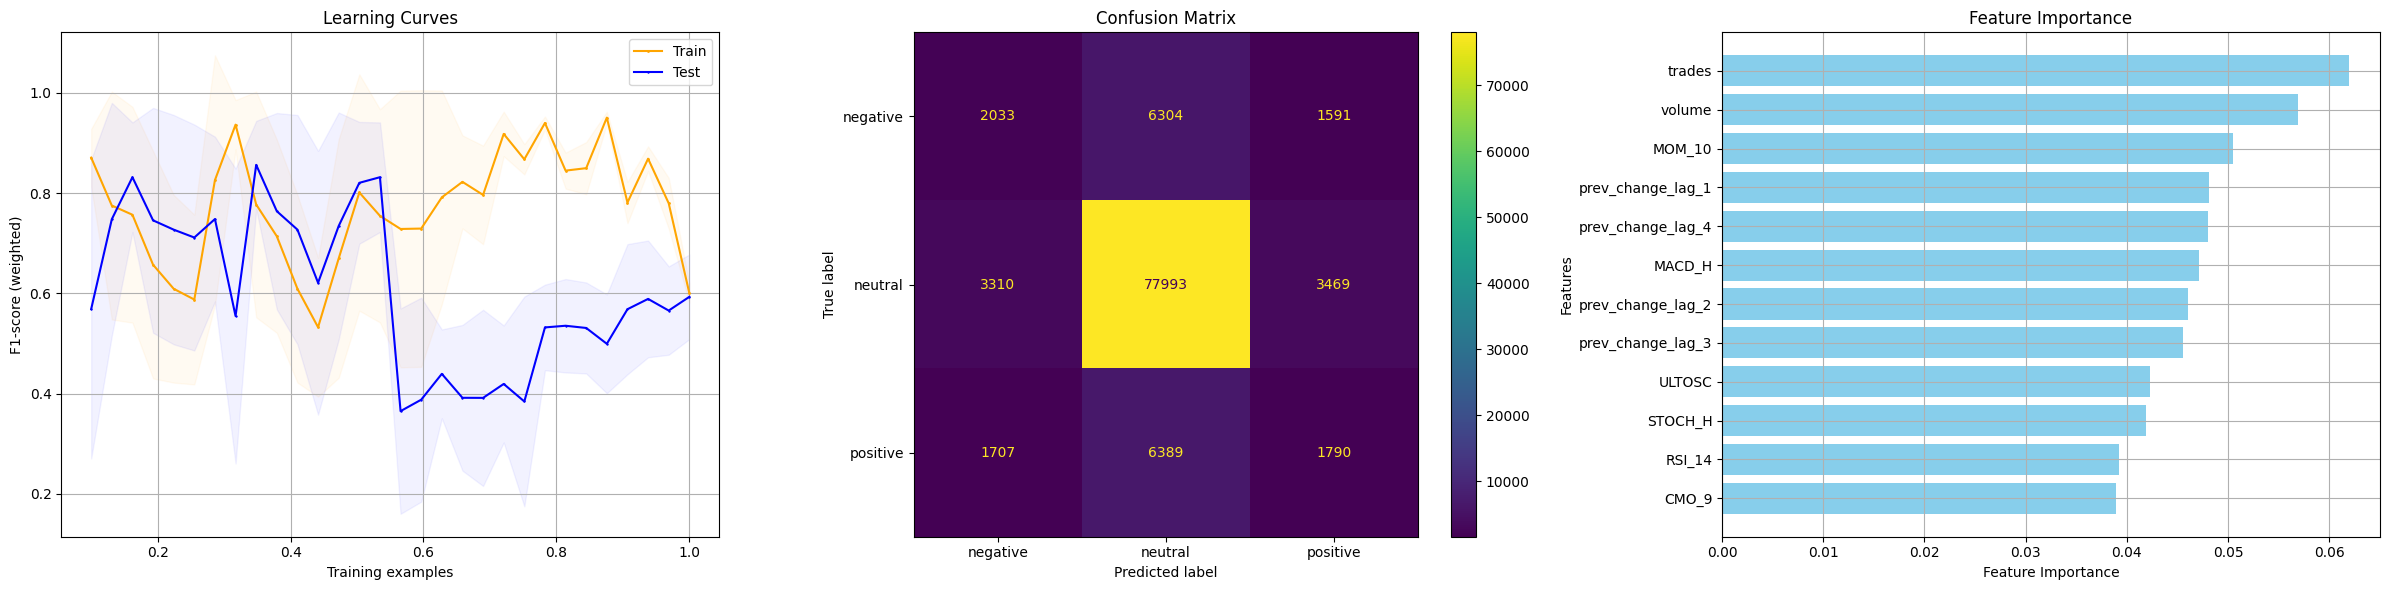

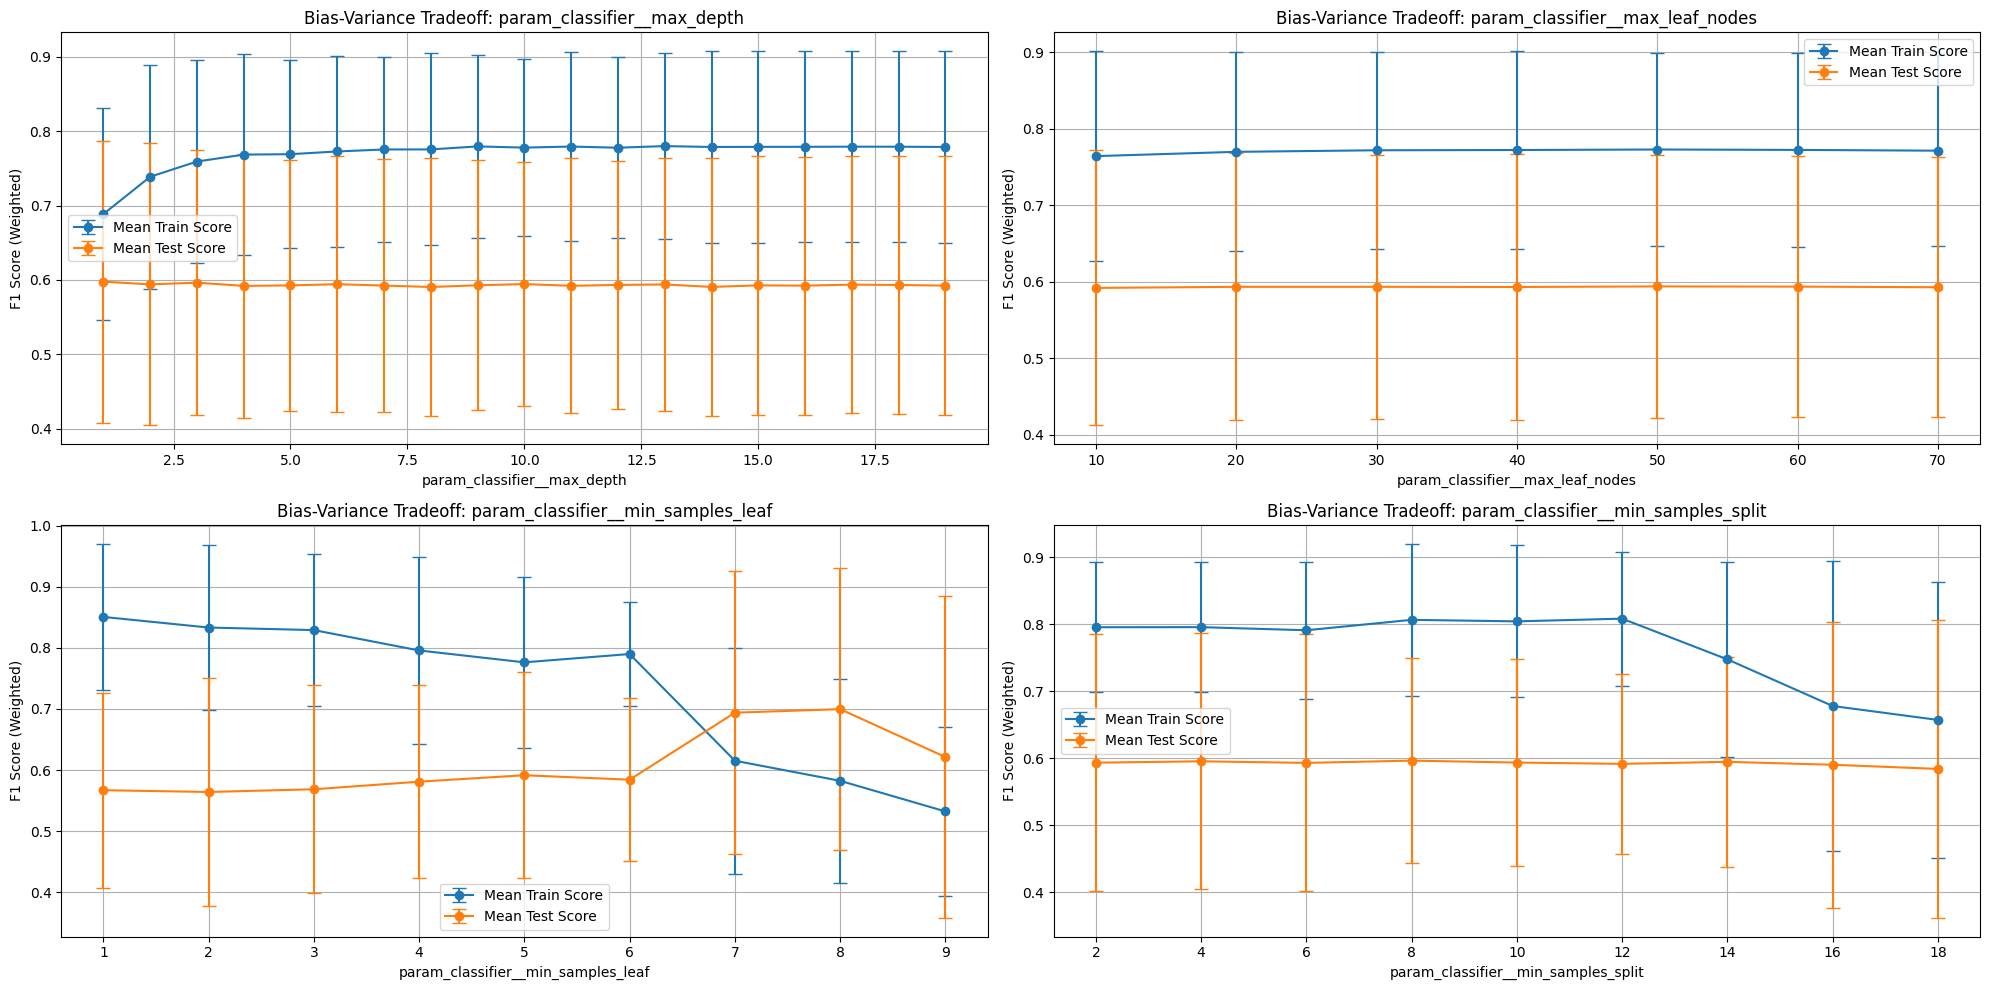


Best params for RFC_balanced_subsample model for BINANCE - orderbook
{'classifier__max_depth': 13, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 14}


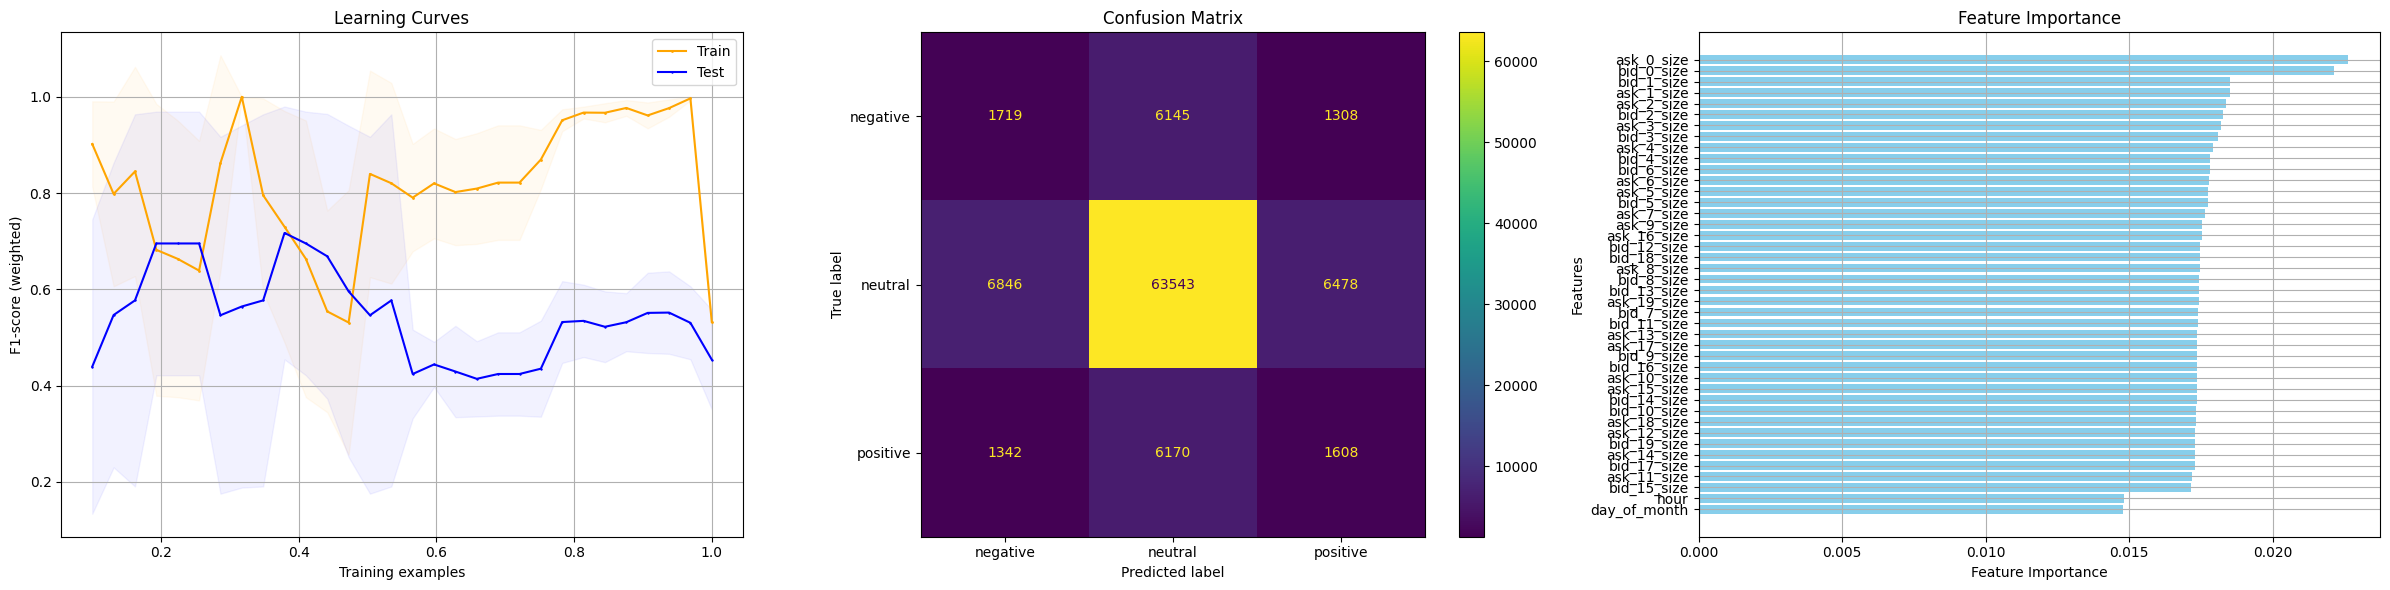

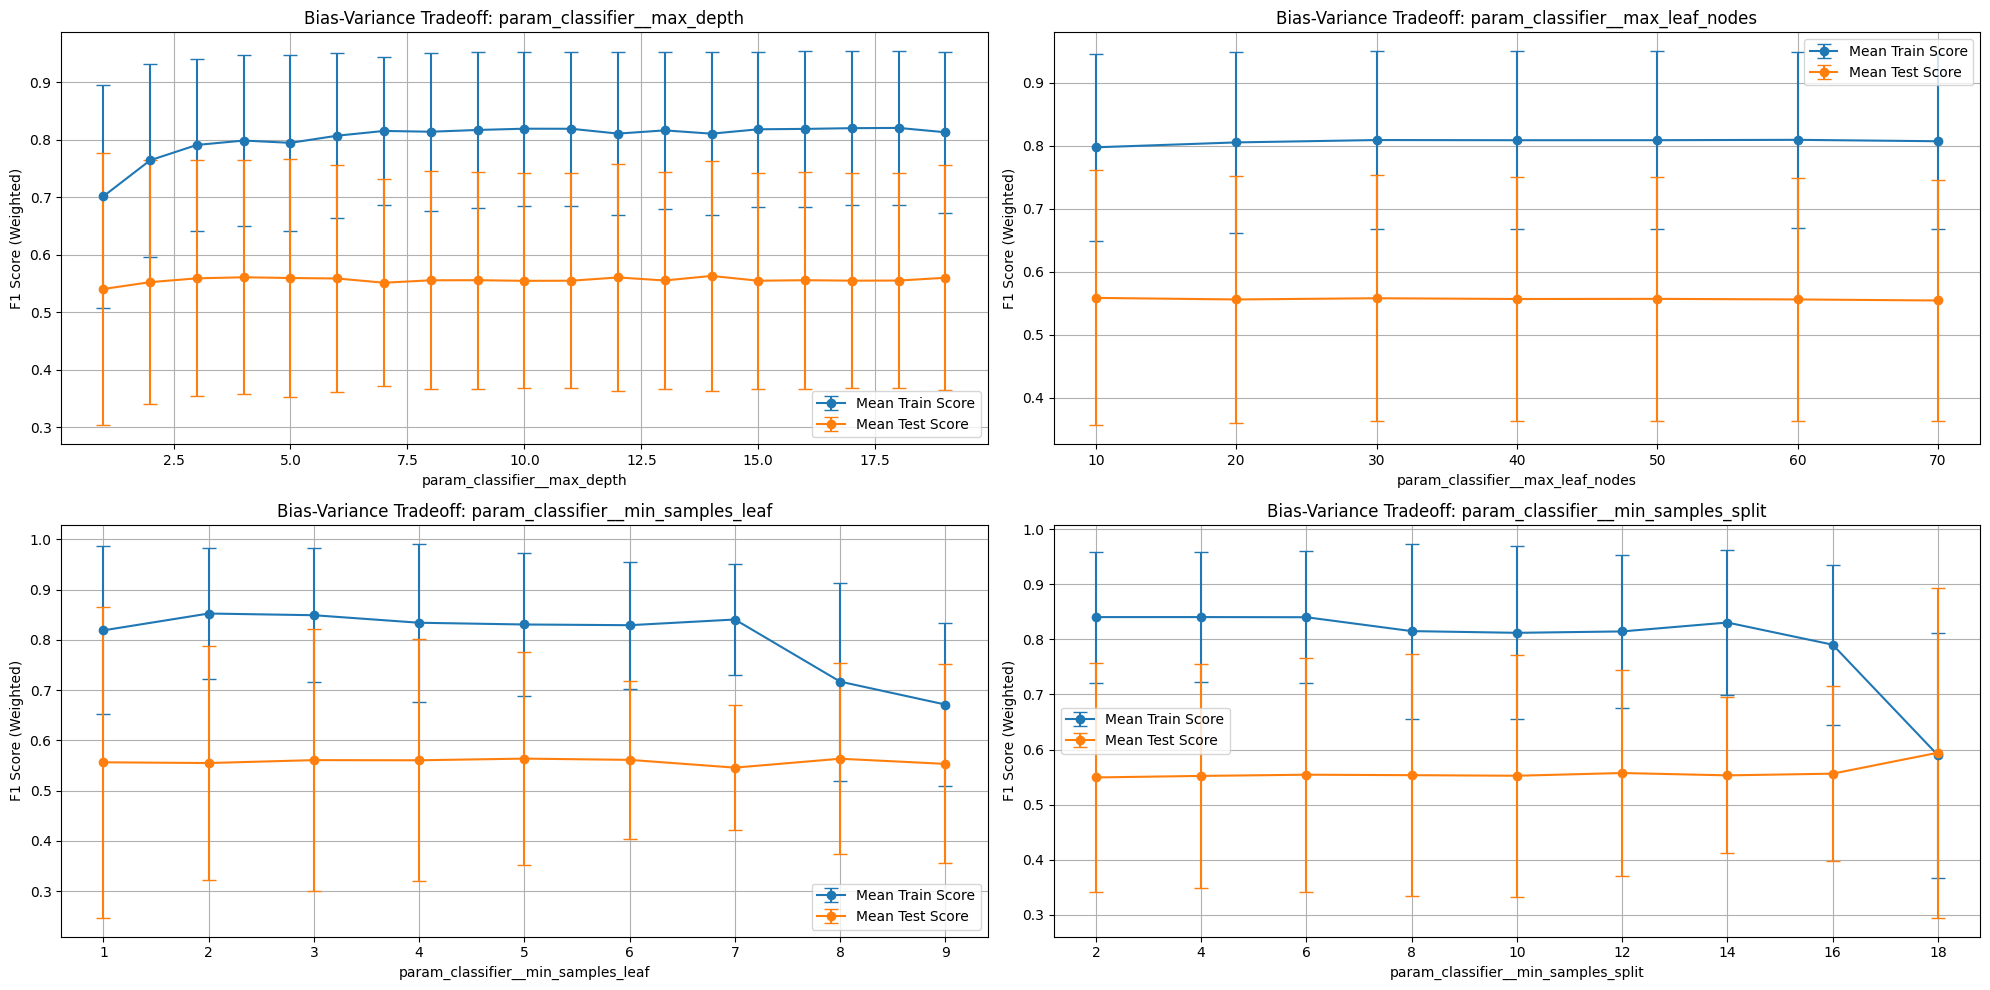


Best params for RFC_balanced_subsample model for BINANCE - unified
{'classifier__max_depth': 6, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 4}


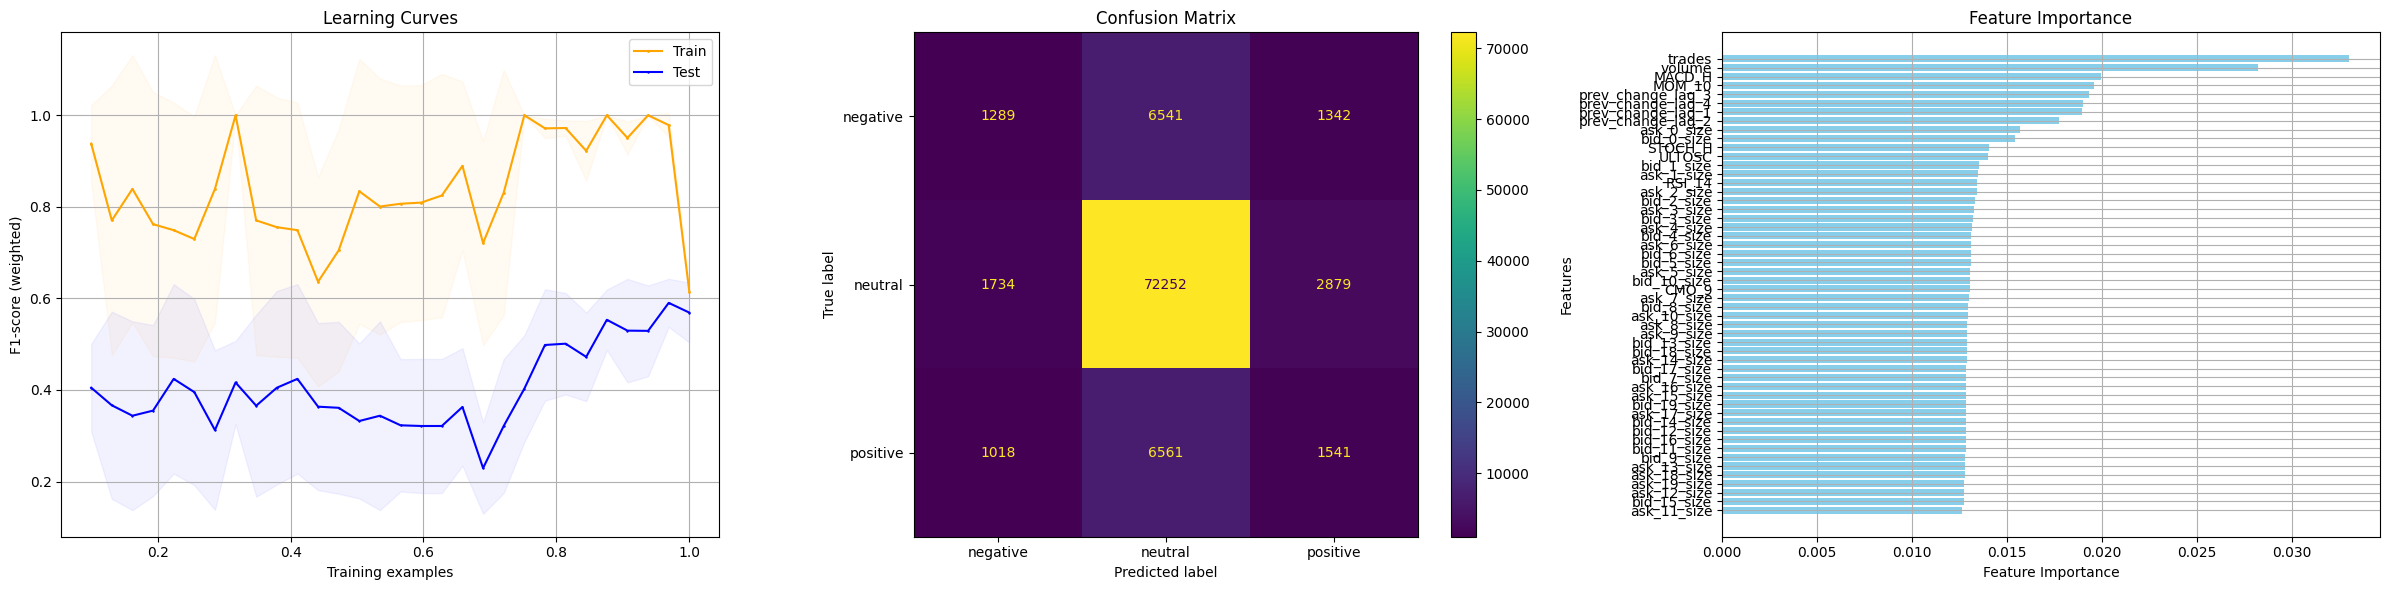

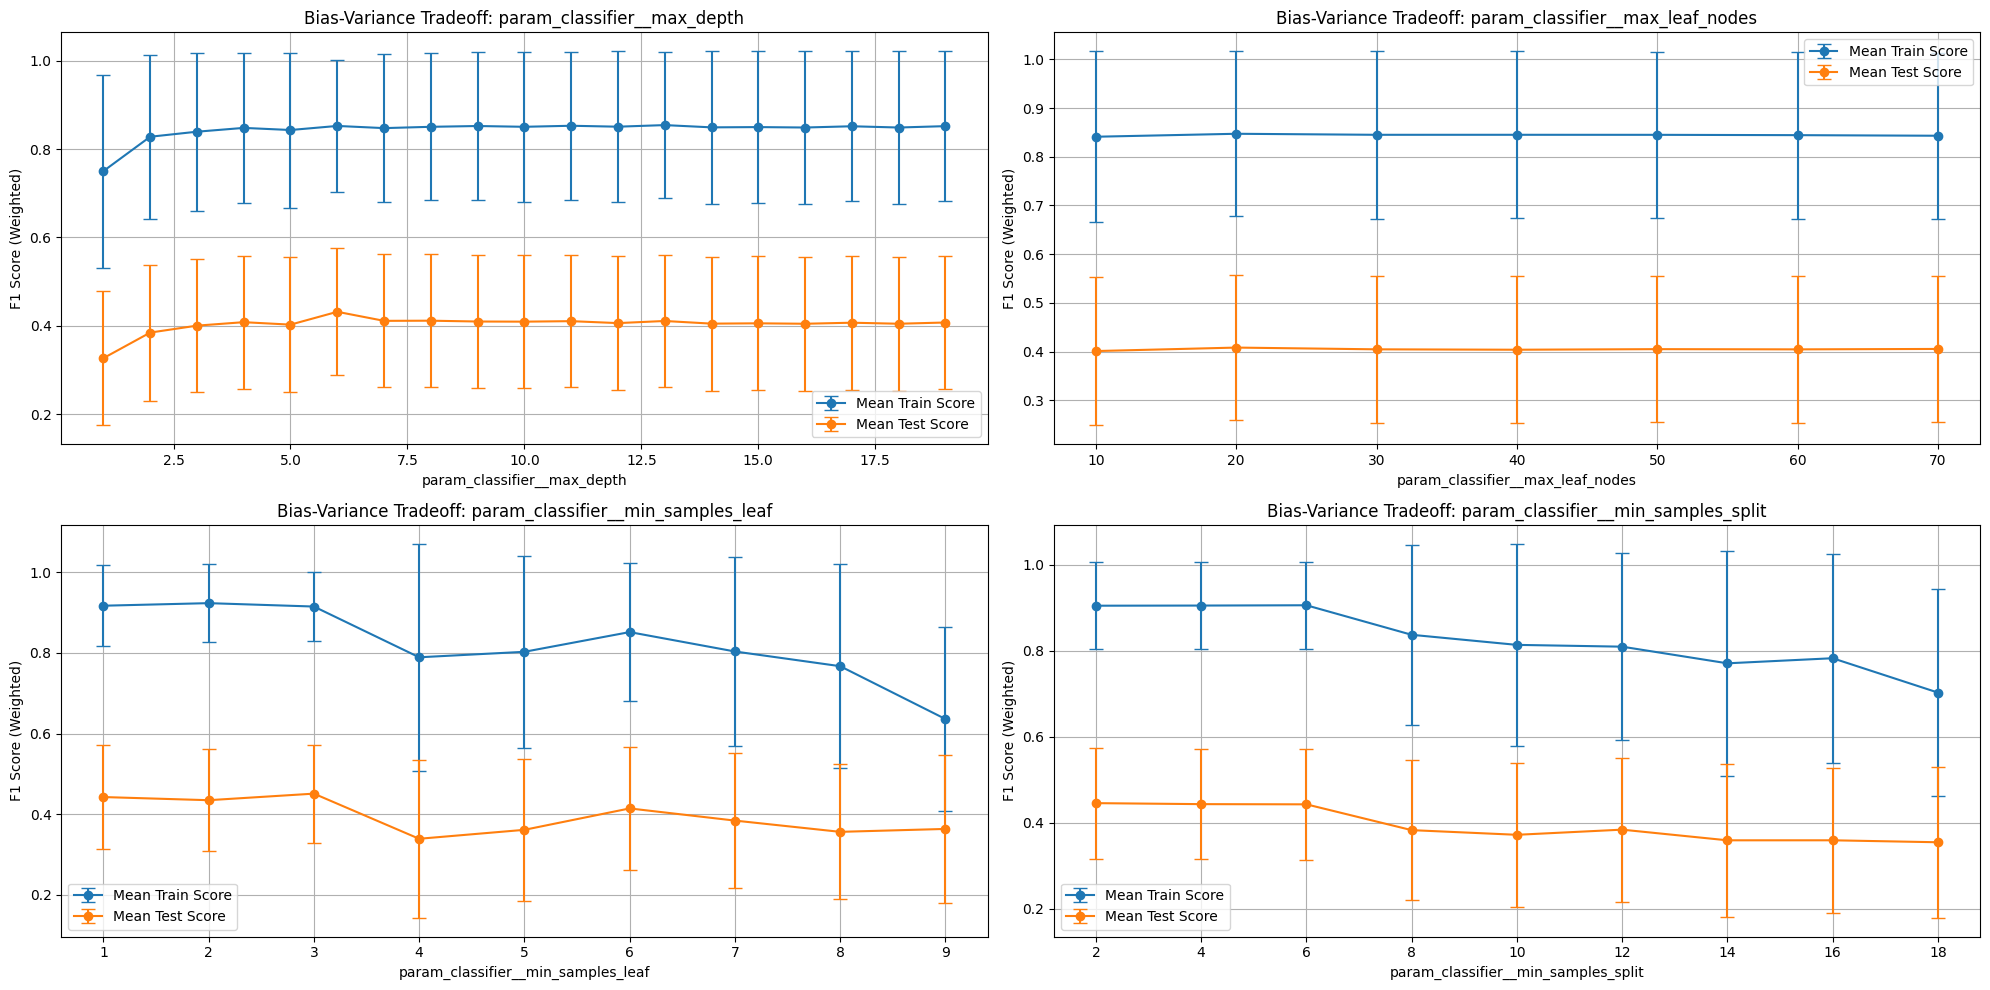


Best params for RFC_balanced_subsample model for HUOBI - candles
{'classifier__max_depth': 8, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


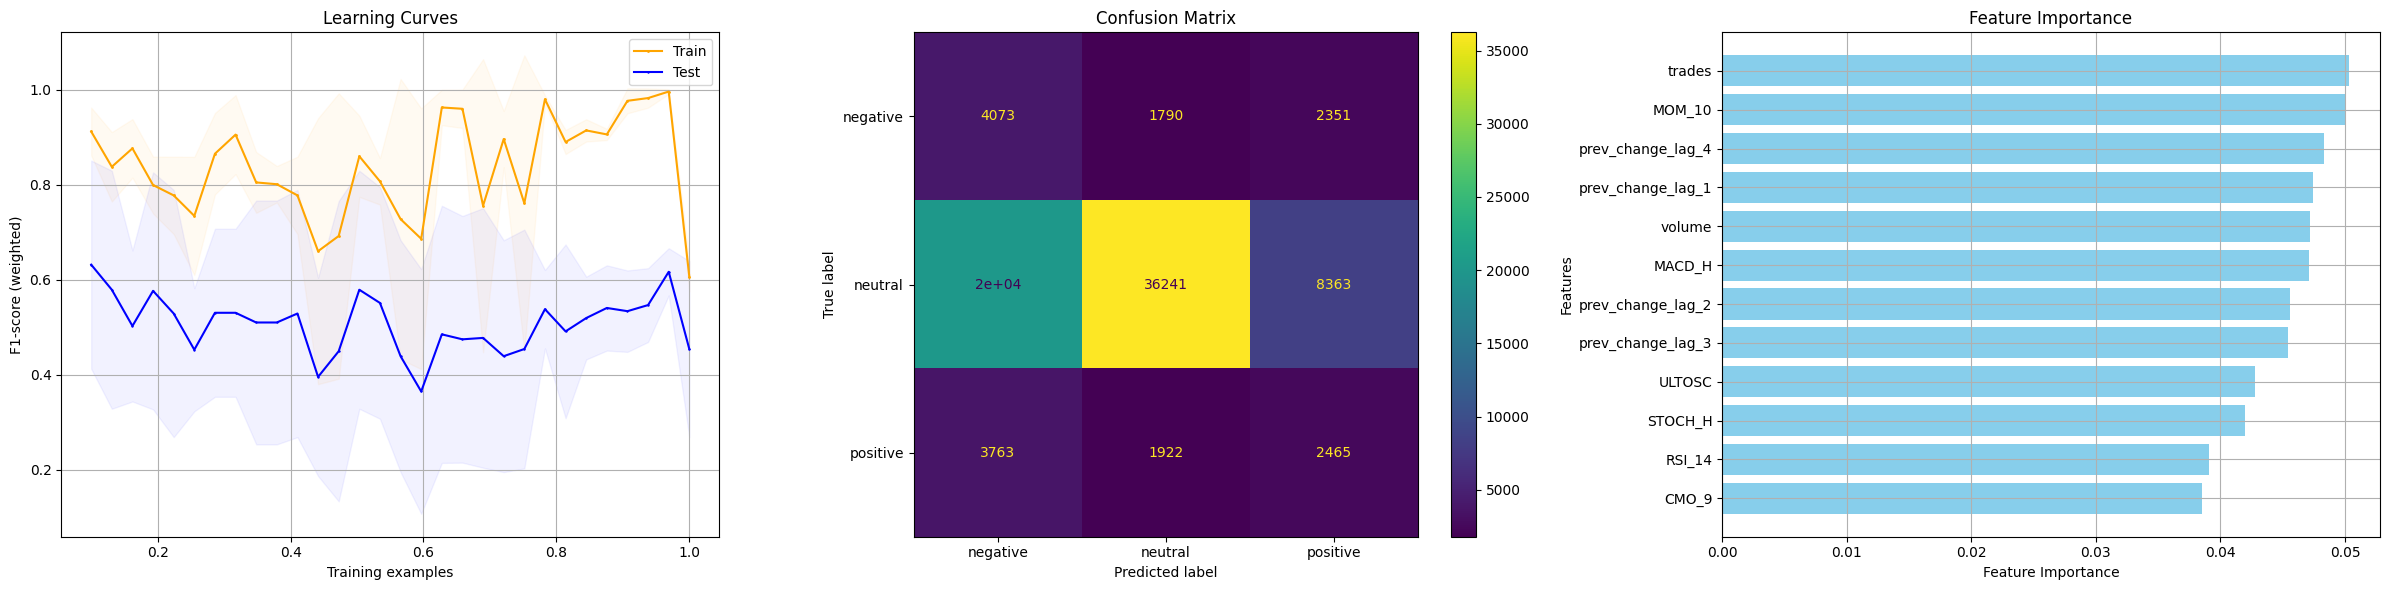

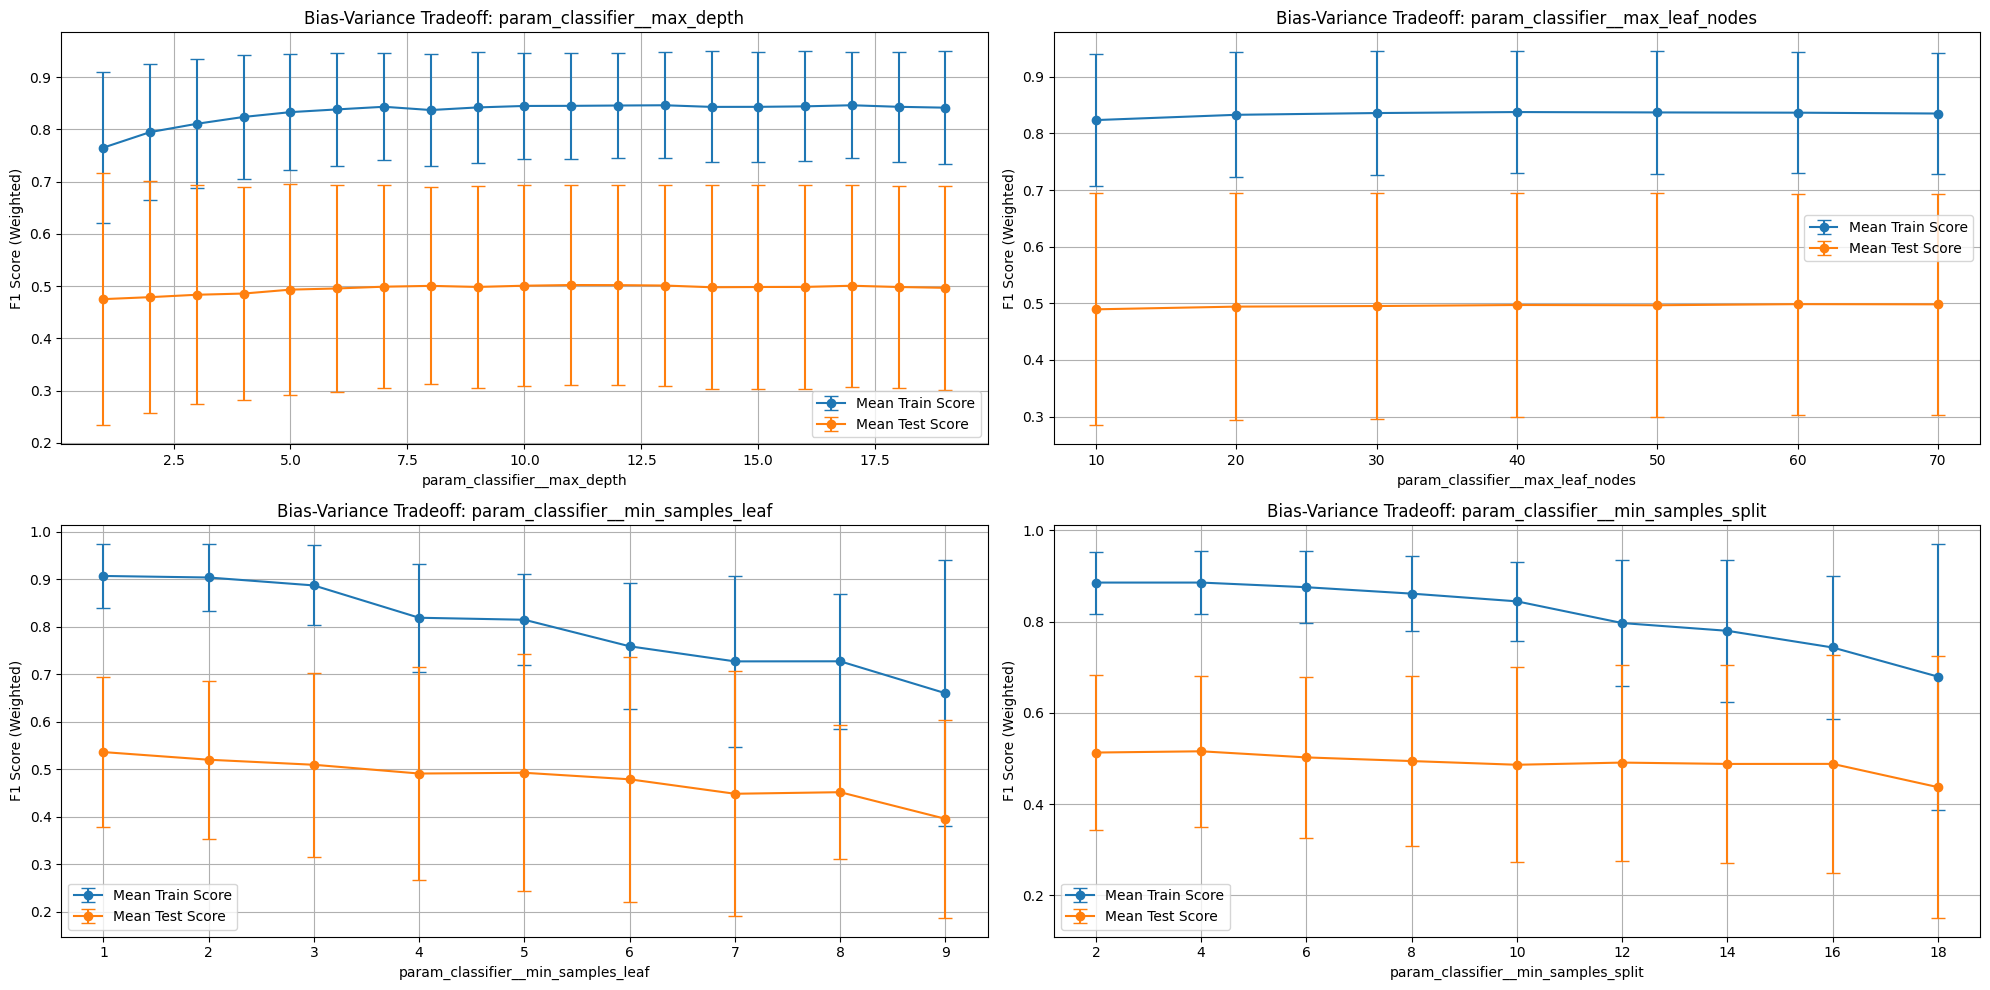


Best params for RFC_balanced_subsample model for HUOBI - orderbook
{'classifier__max_depth': 19, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 16}


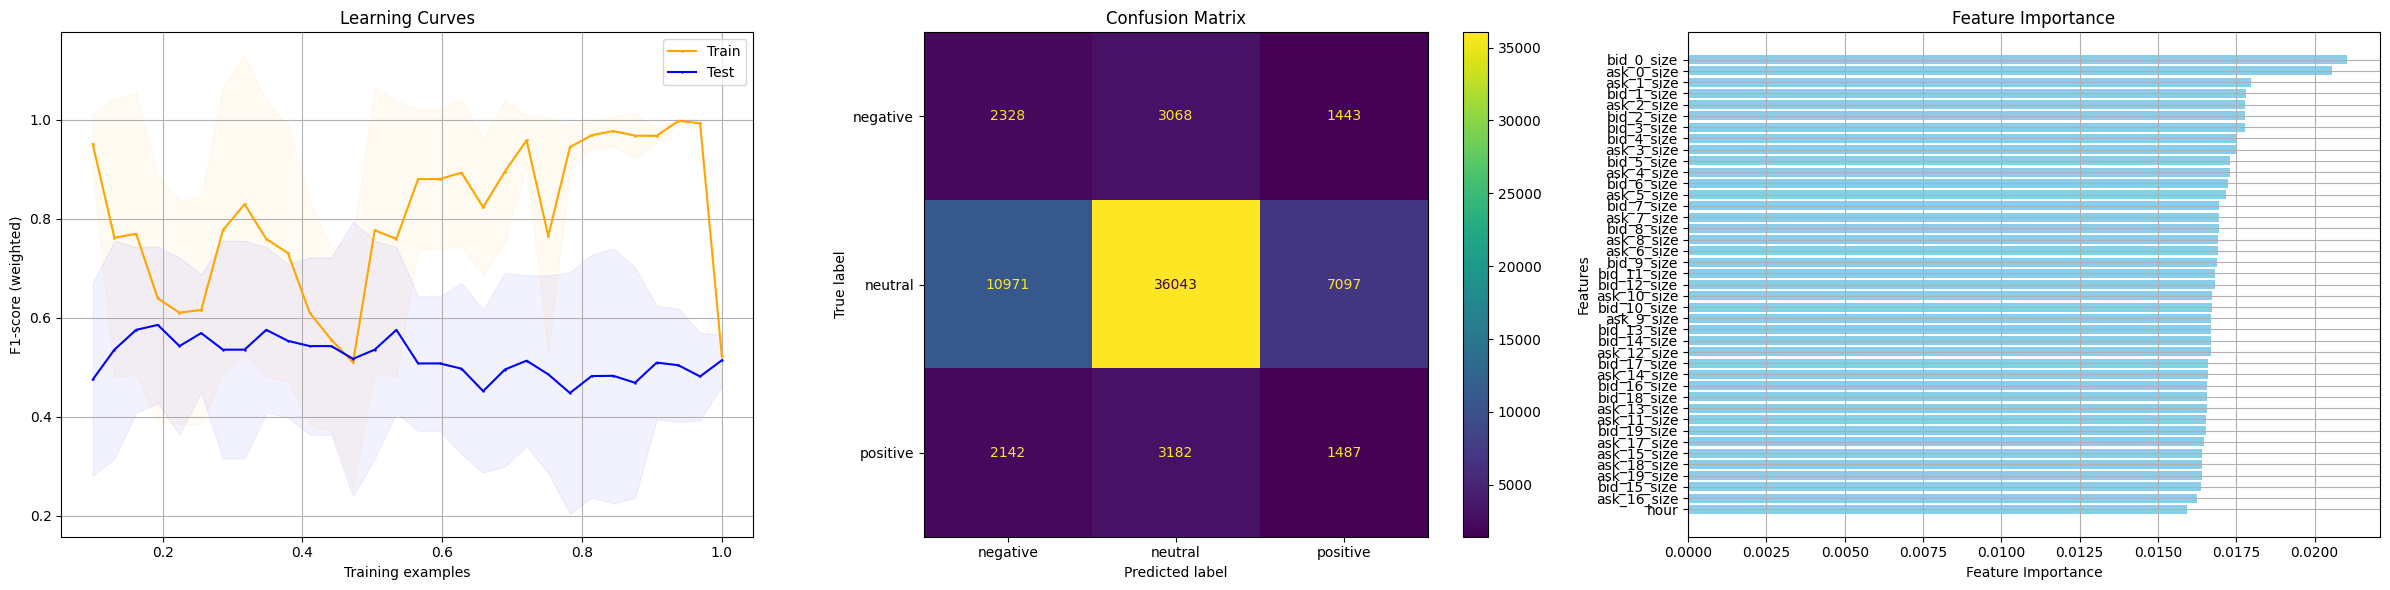

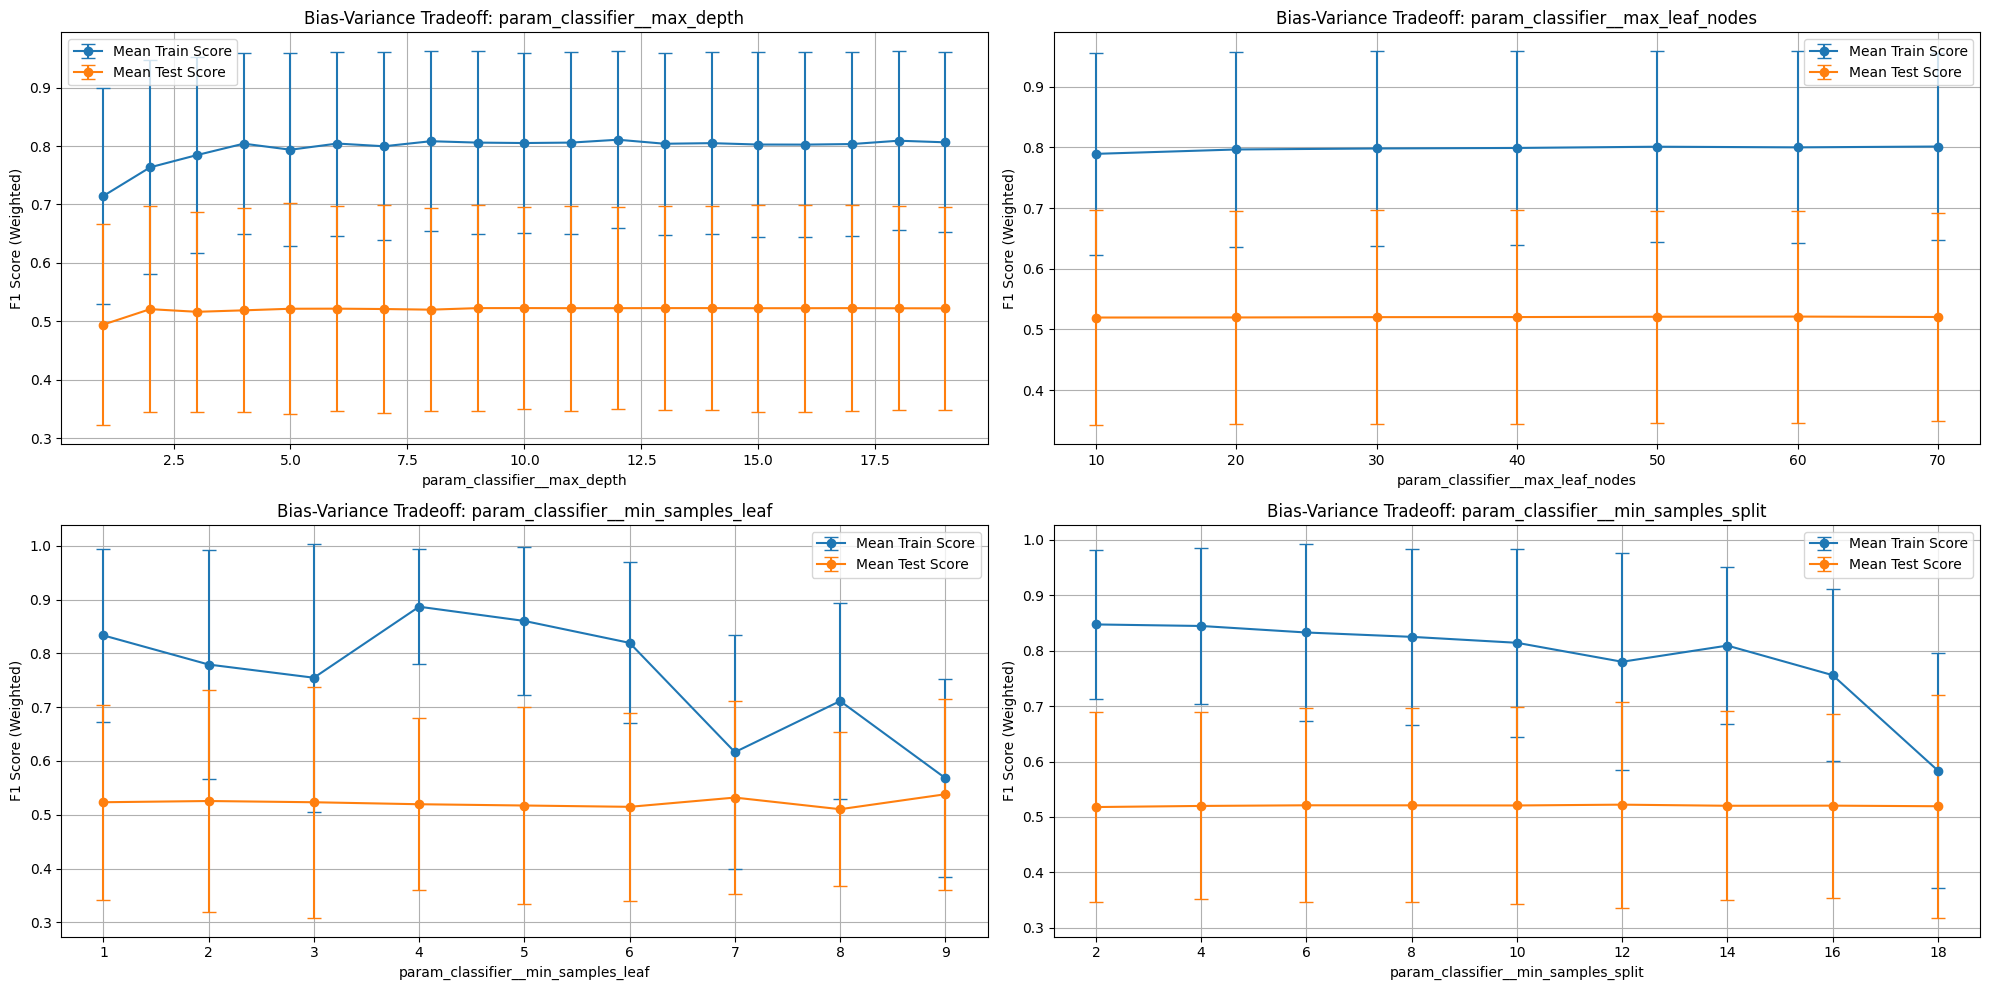


Best params for RFC_balanced_subsample model for HUOBI - unified
{'classifier__max_depth': 13, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 16}


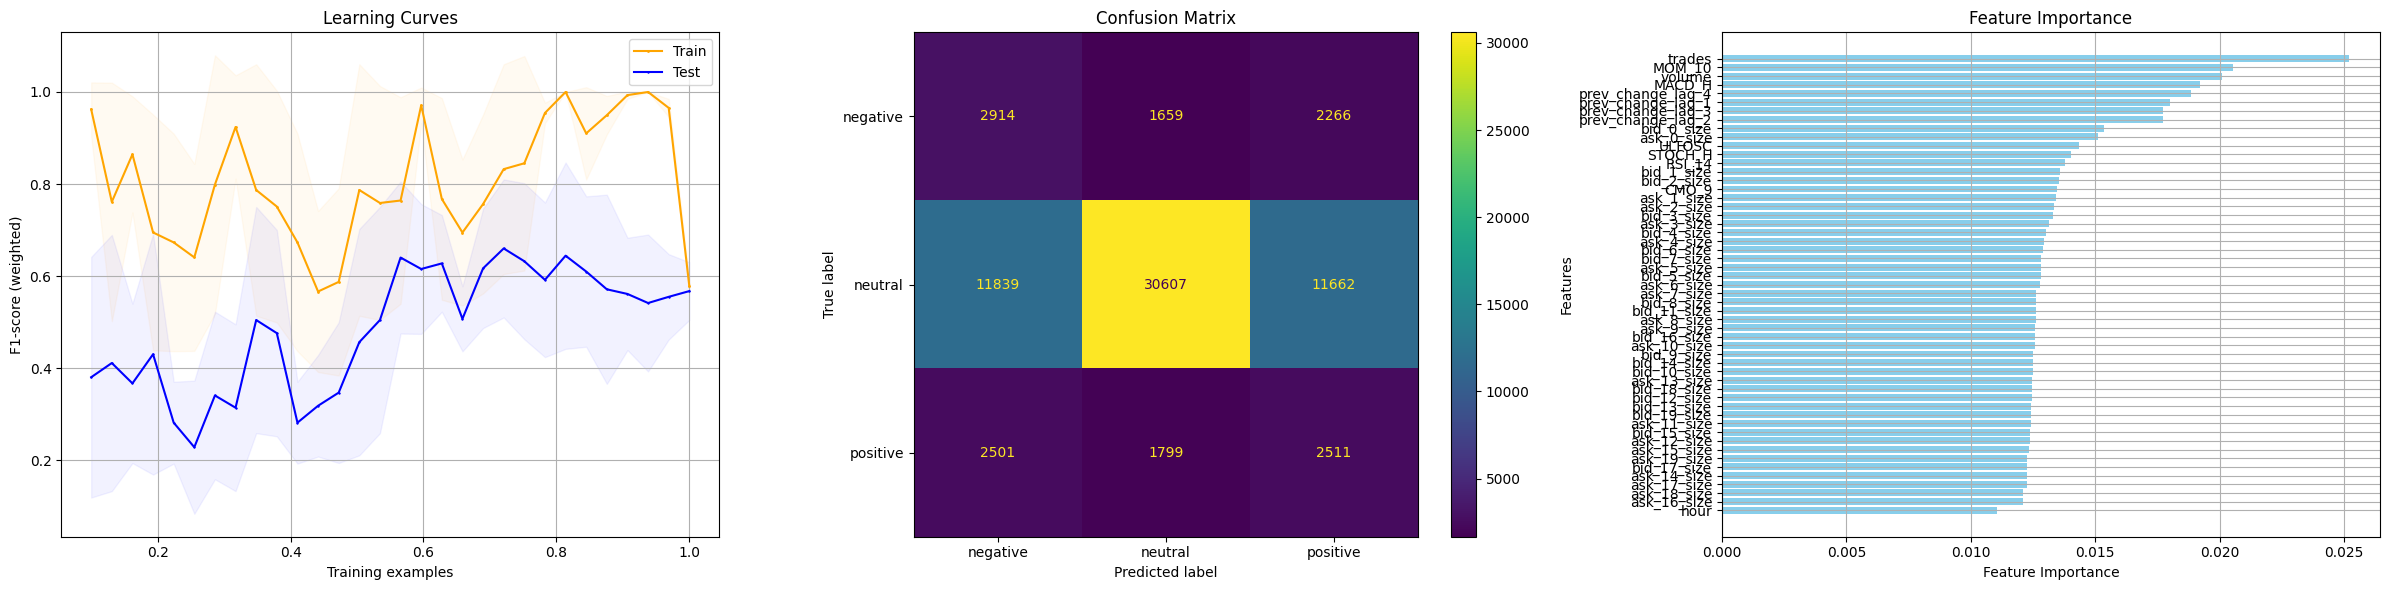

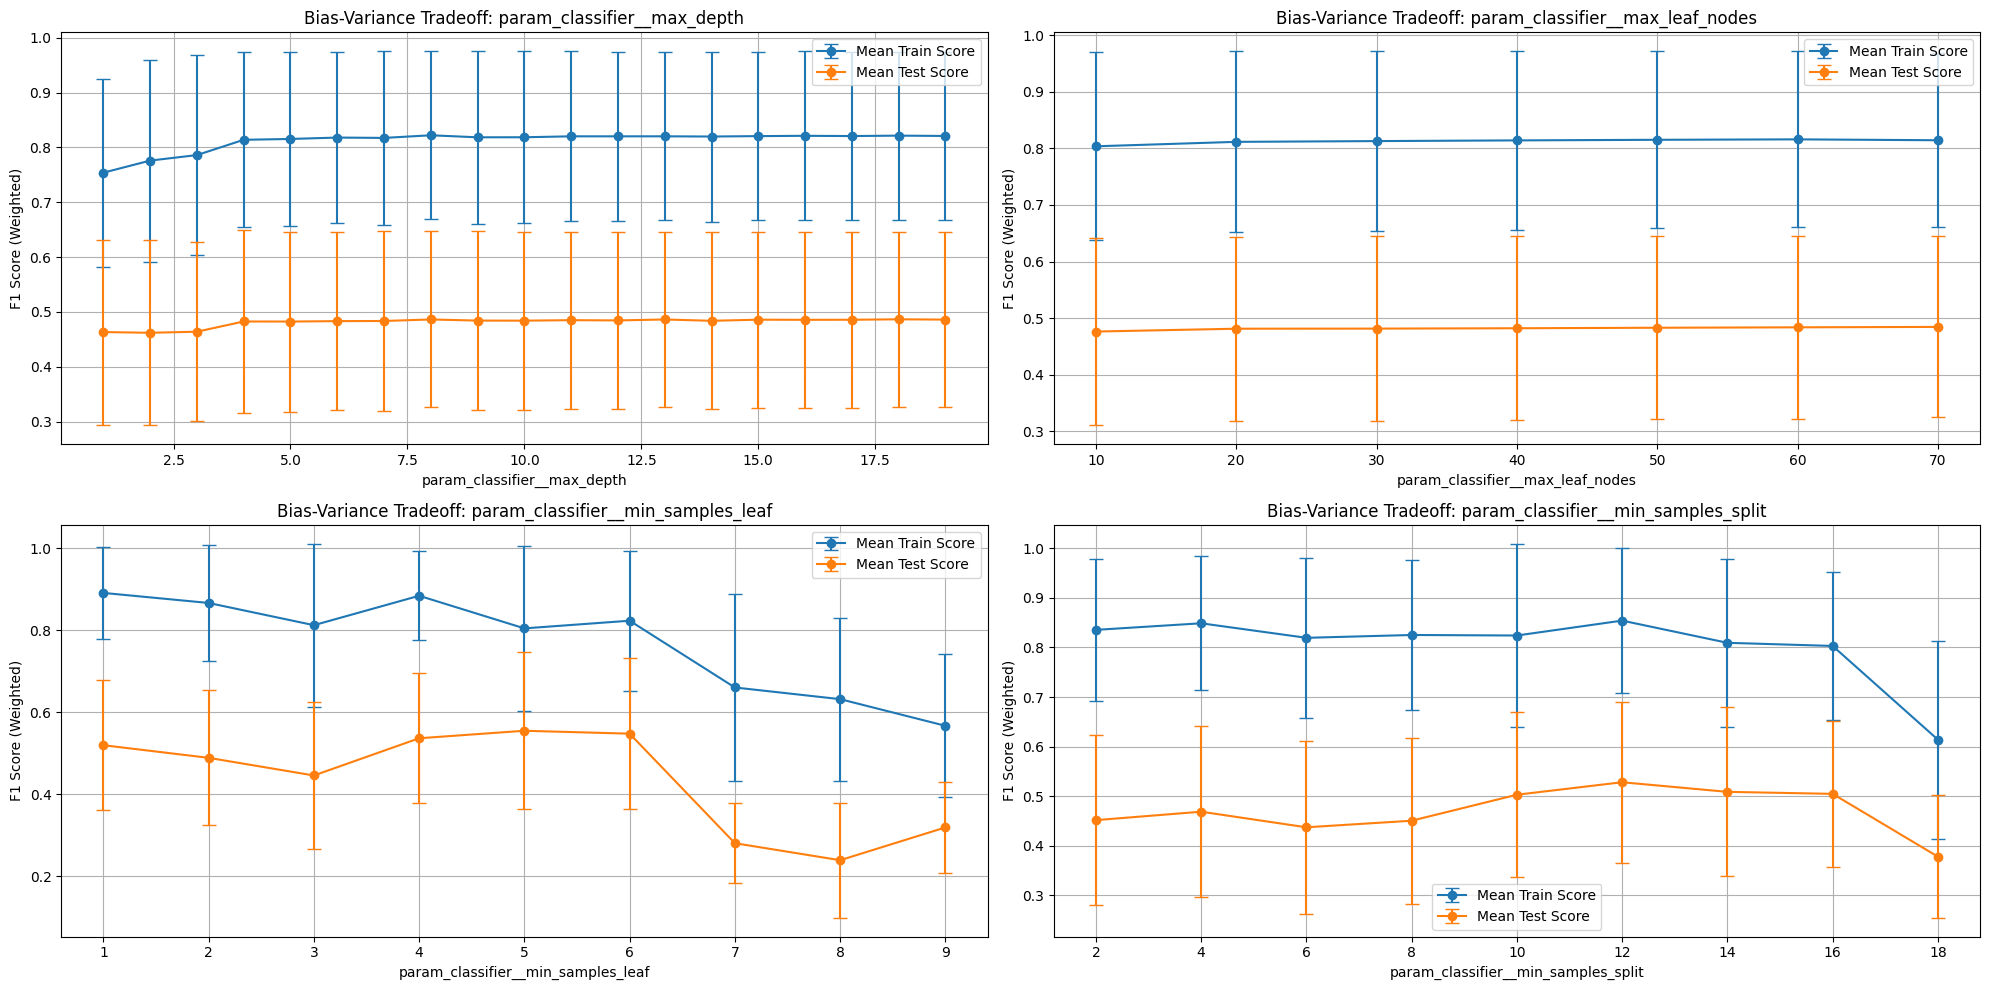


Best params for RFC_balanced_subsample model for OKX - candles
{'classifier__max_depth': 9, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 4}


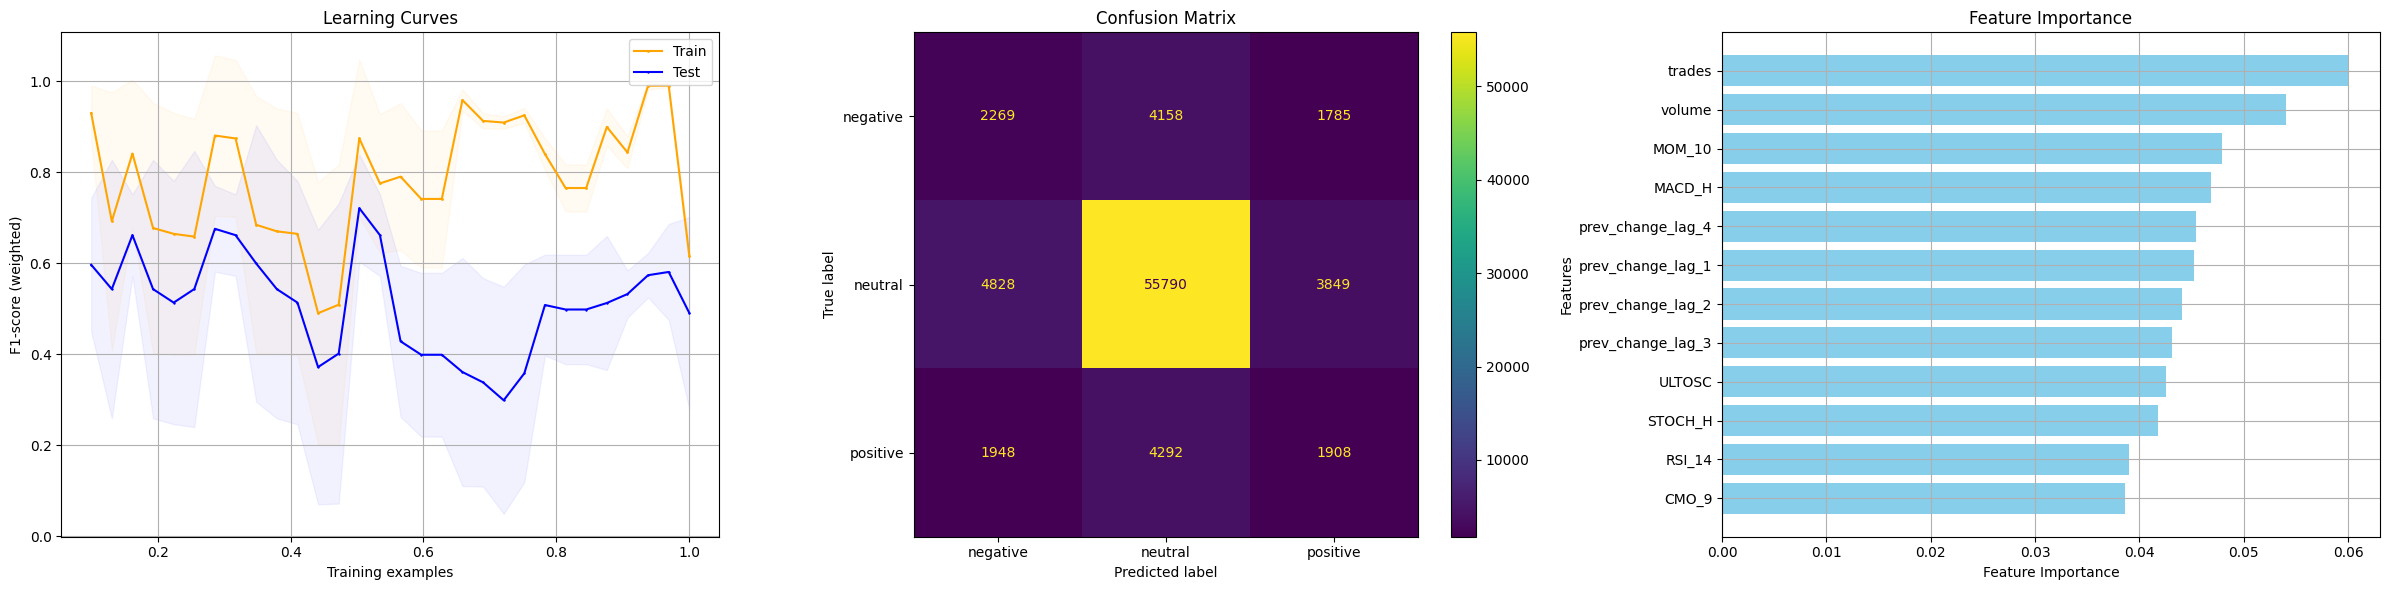

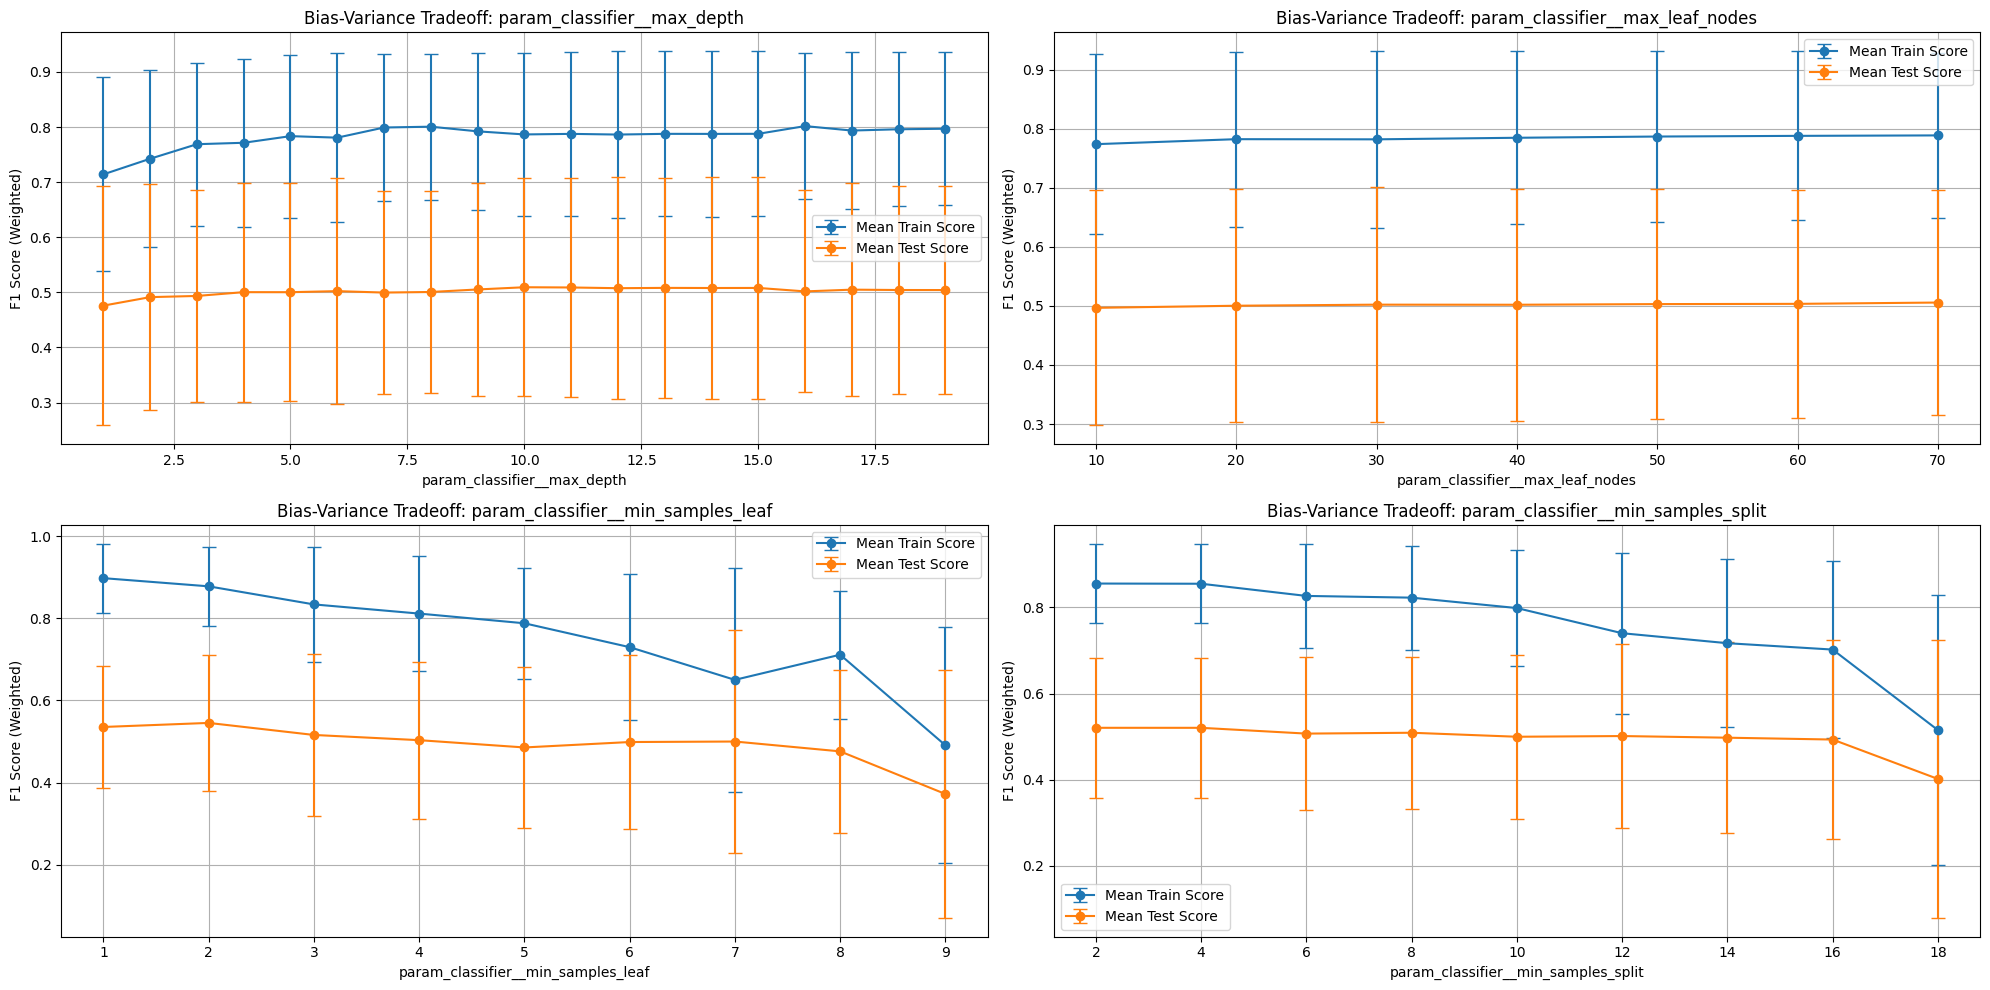


Best params for RFC_balanced_subsample model for OKX - orderbook
{'classifier__max_depth': 15, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 14}


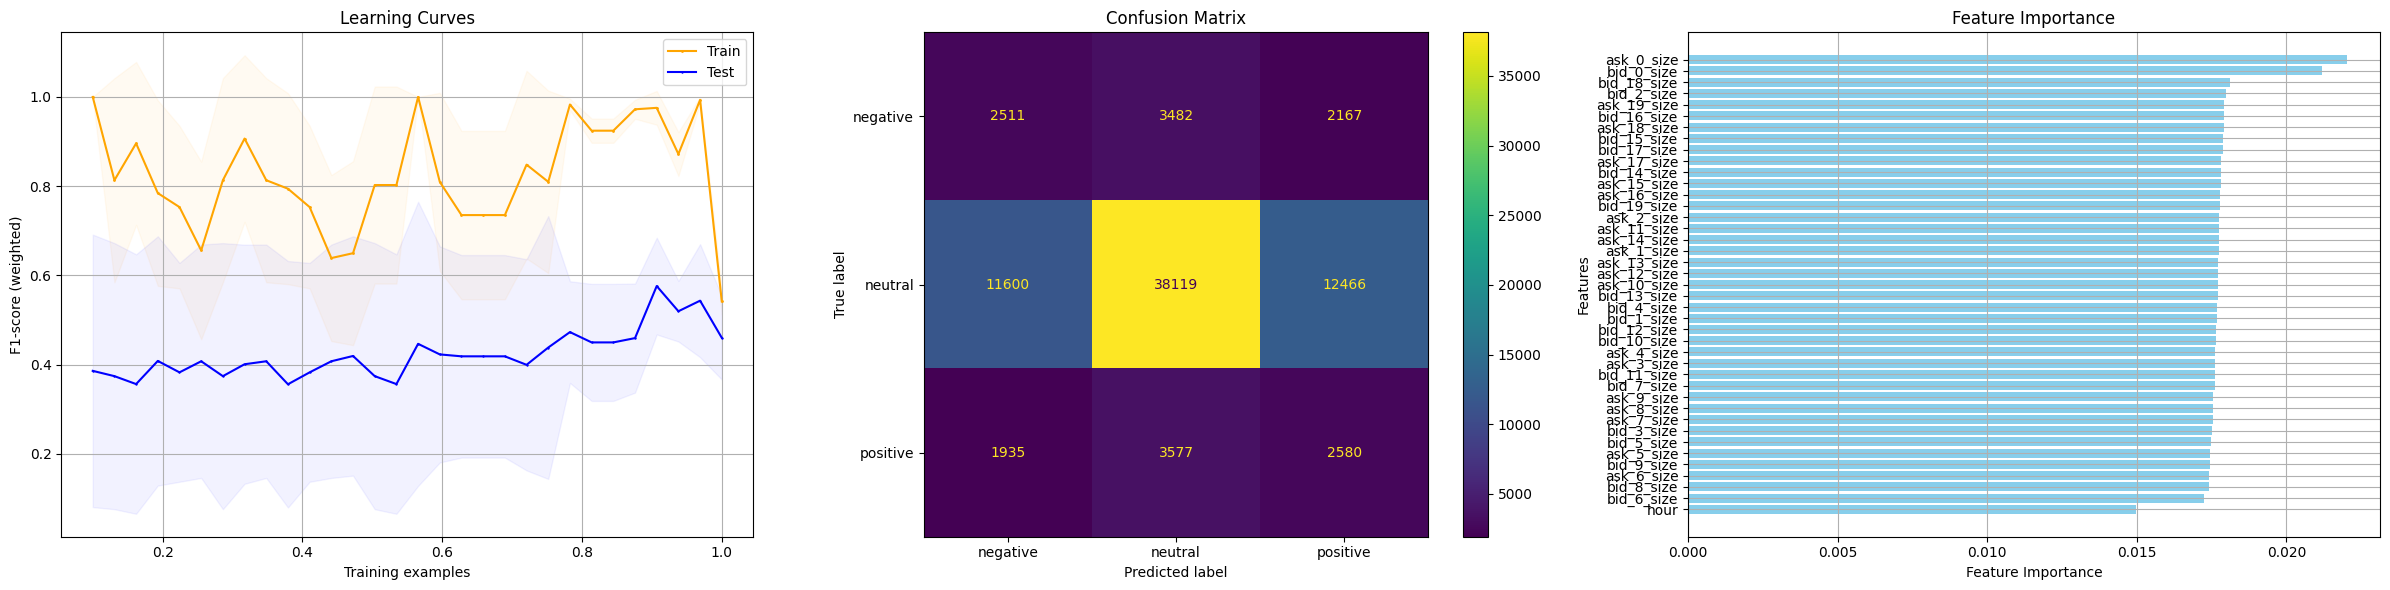

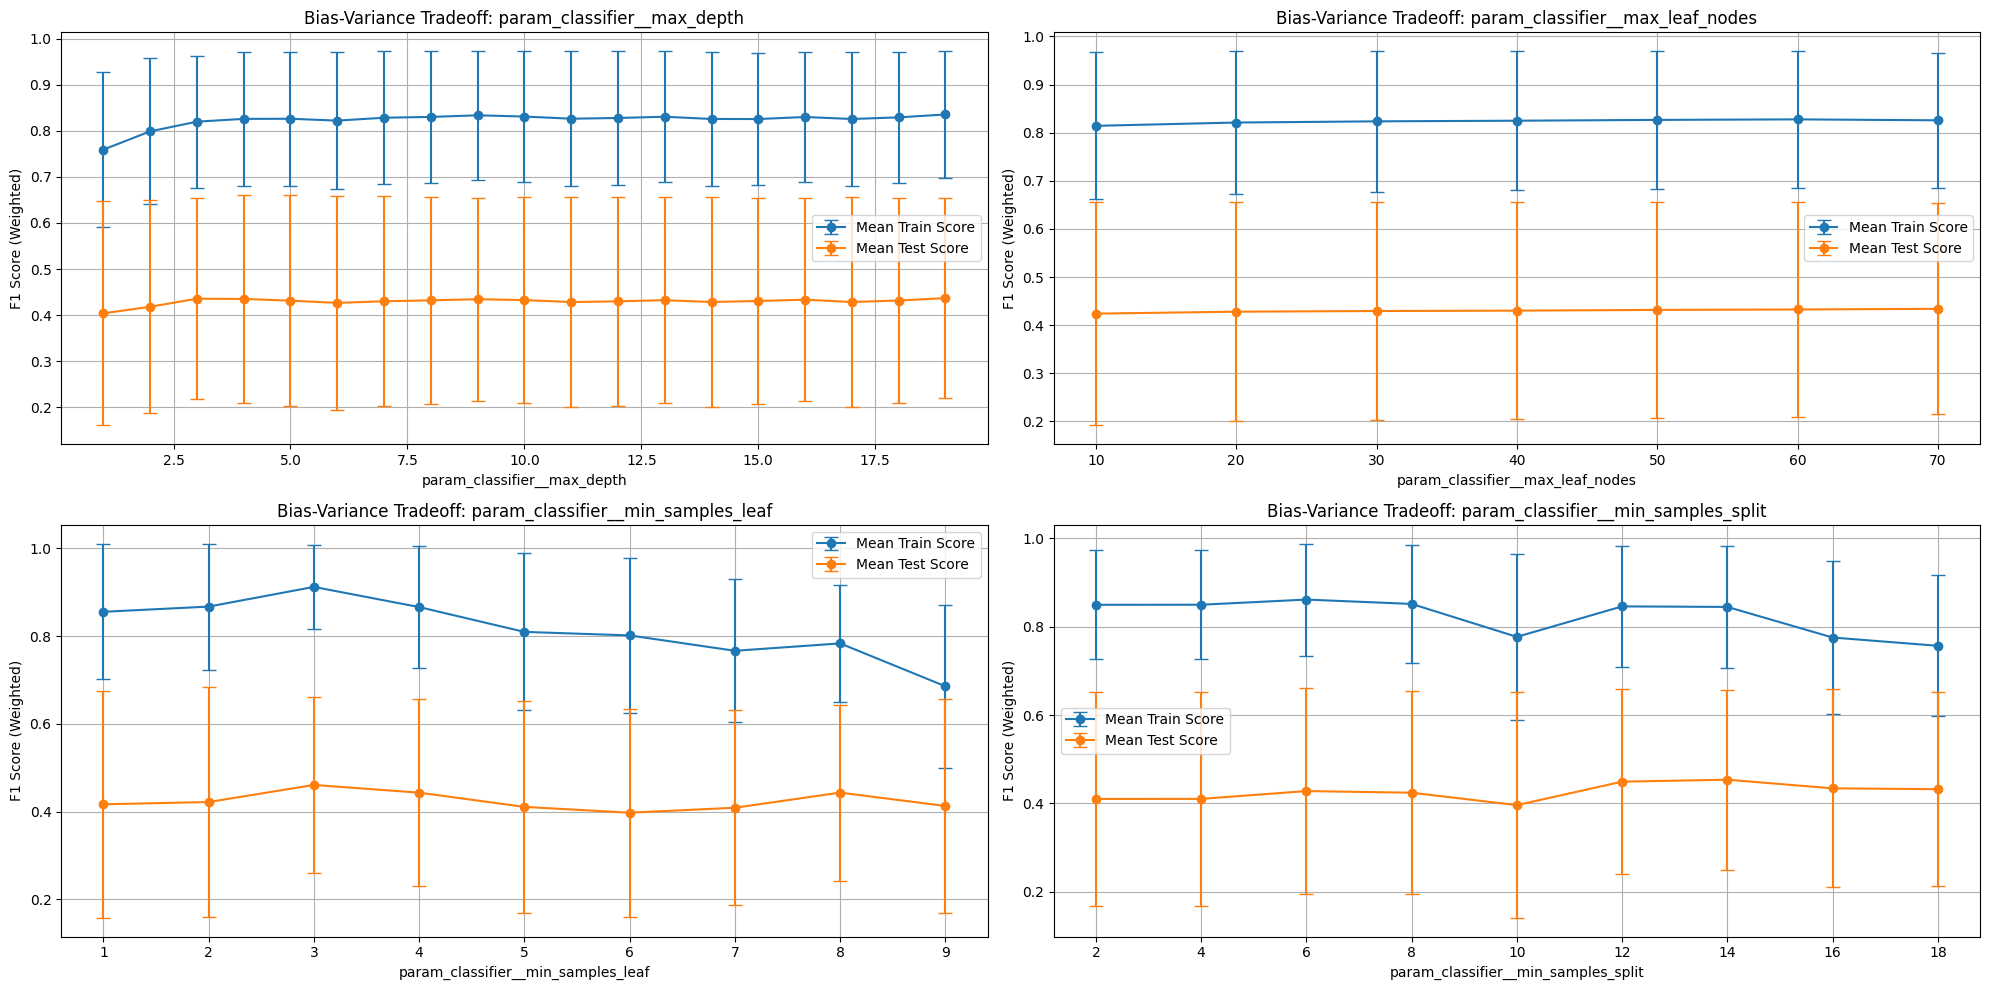


Best params for RFC_balanced_subsample model for OKX - unified
{'classifier__max_depth': 19, 'classifier__max_leaf_nodes': 70, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 14}


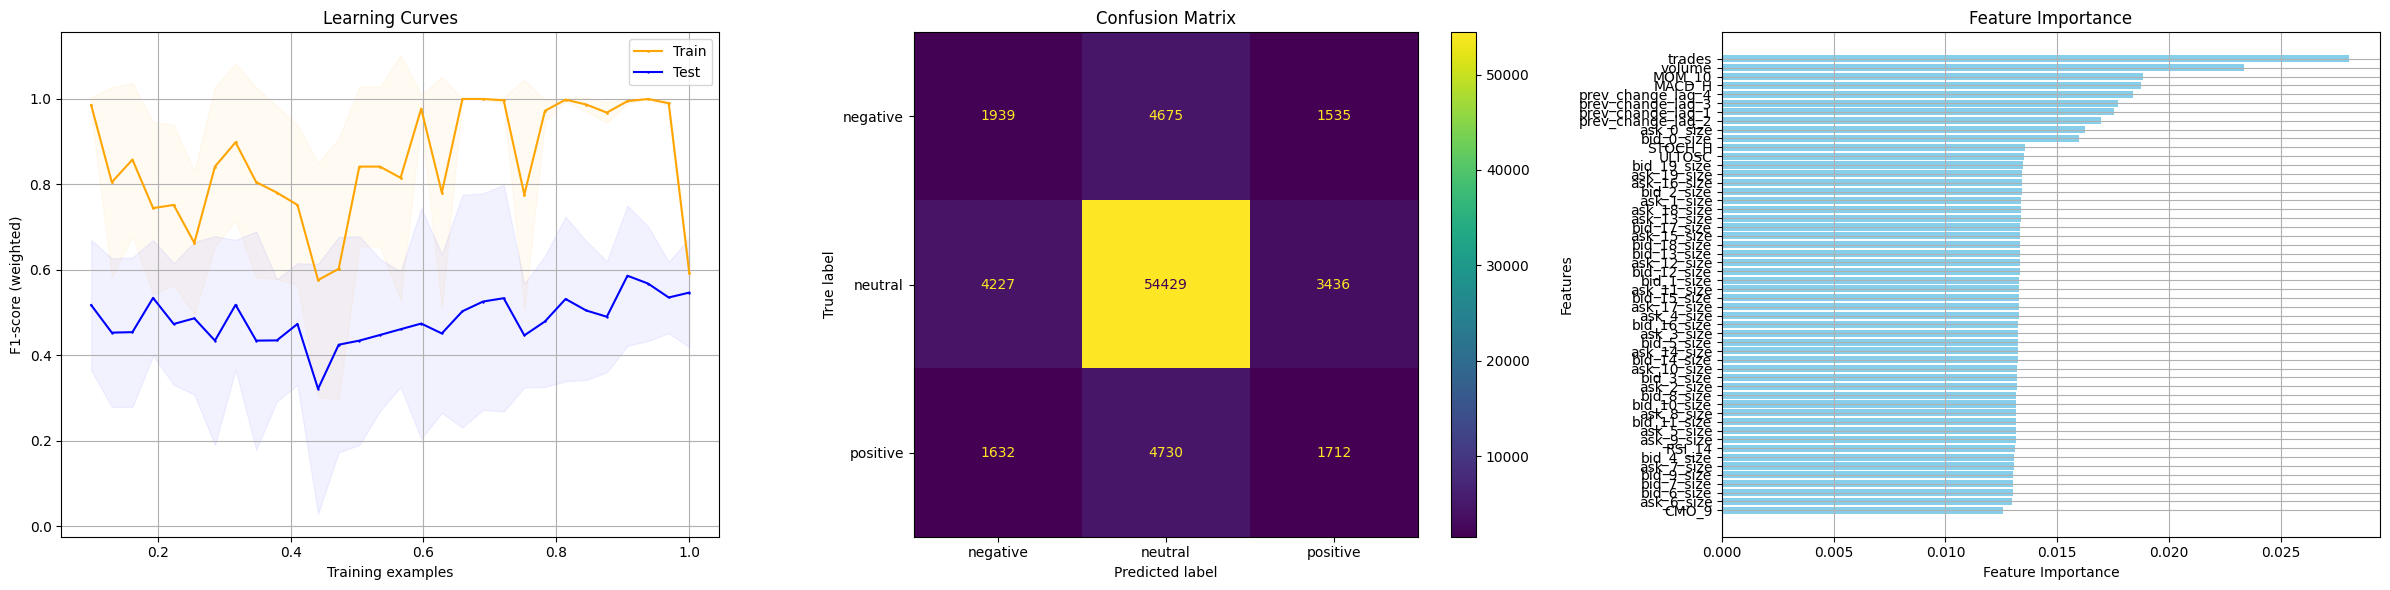

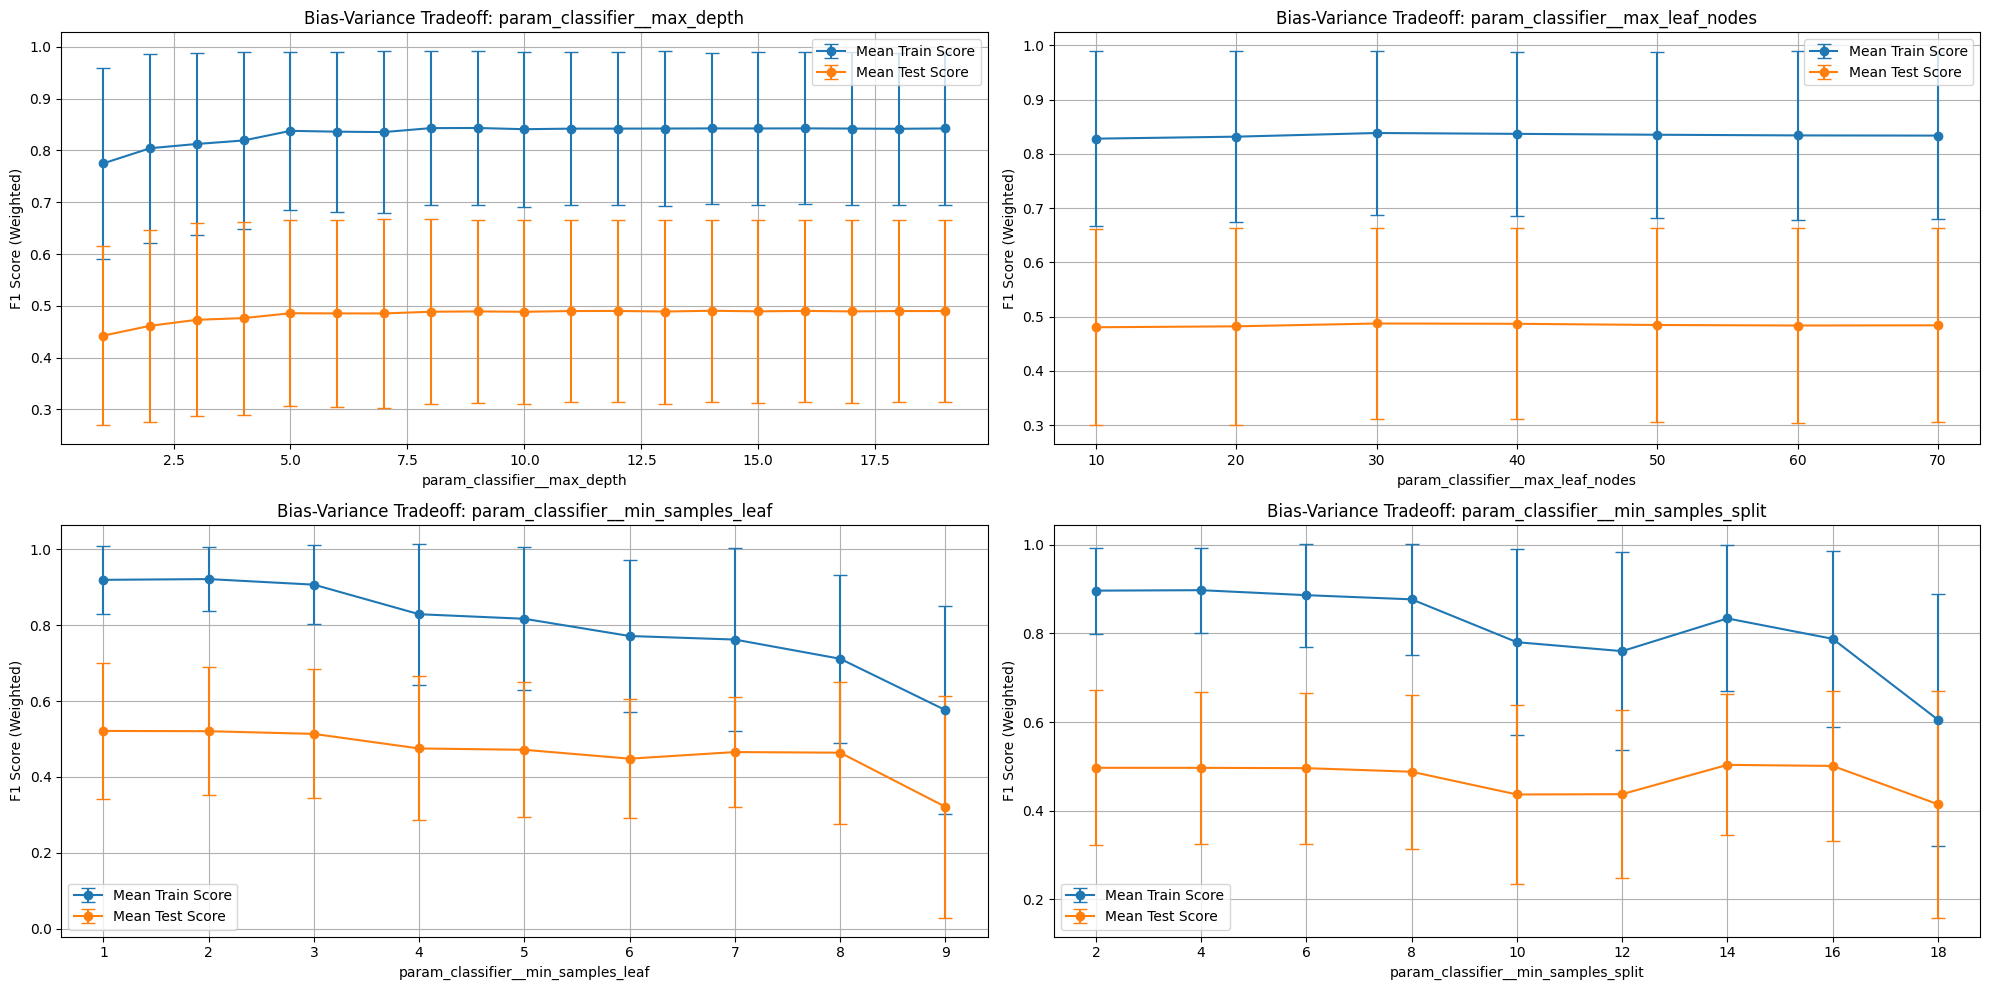


Best params for RFC_balanced_subsample model for ALL - unified
{'classifier__max_depth': 17, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 8}


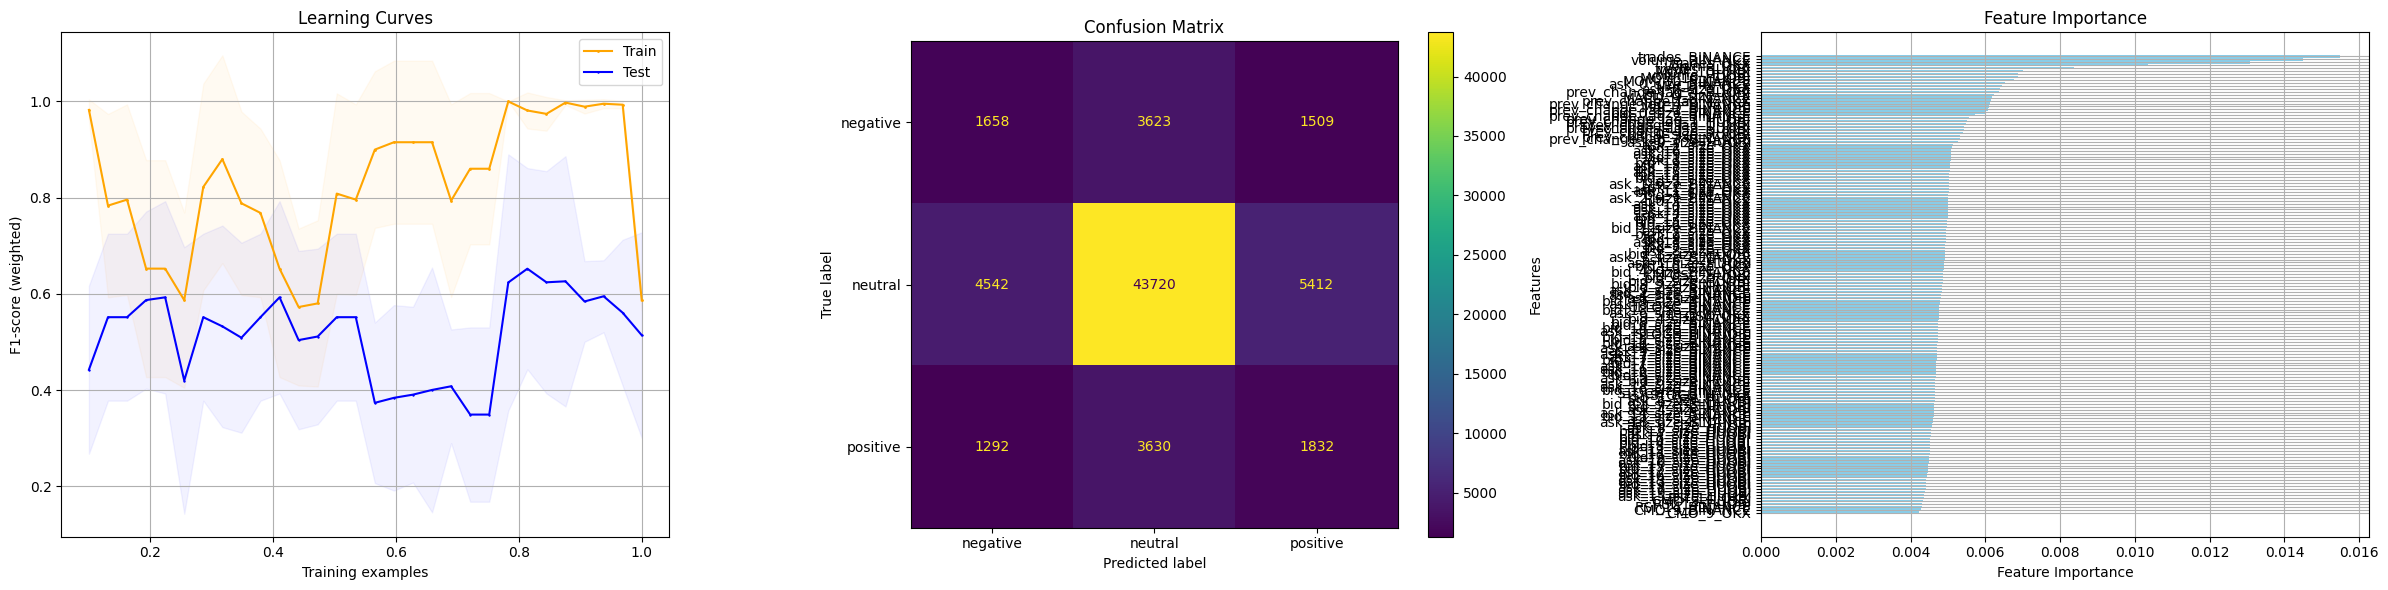

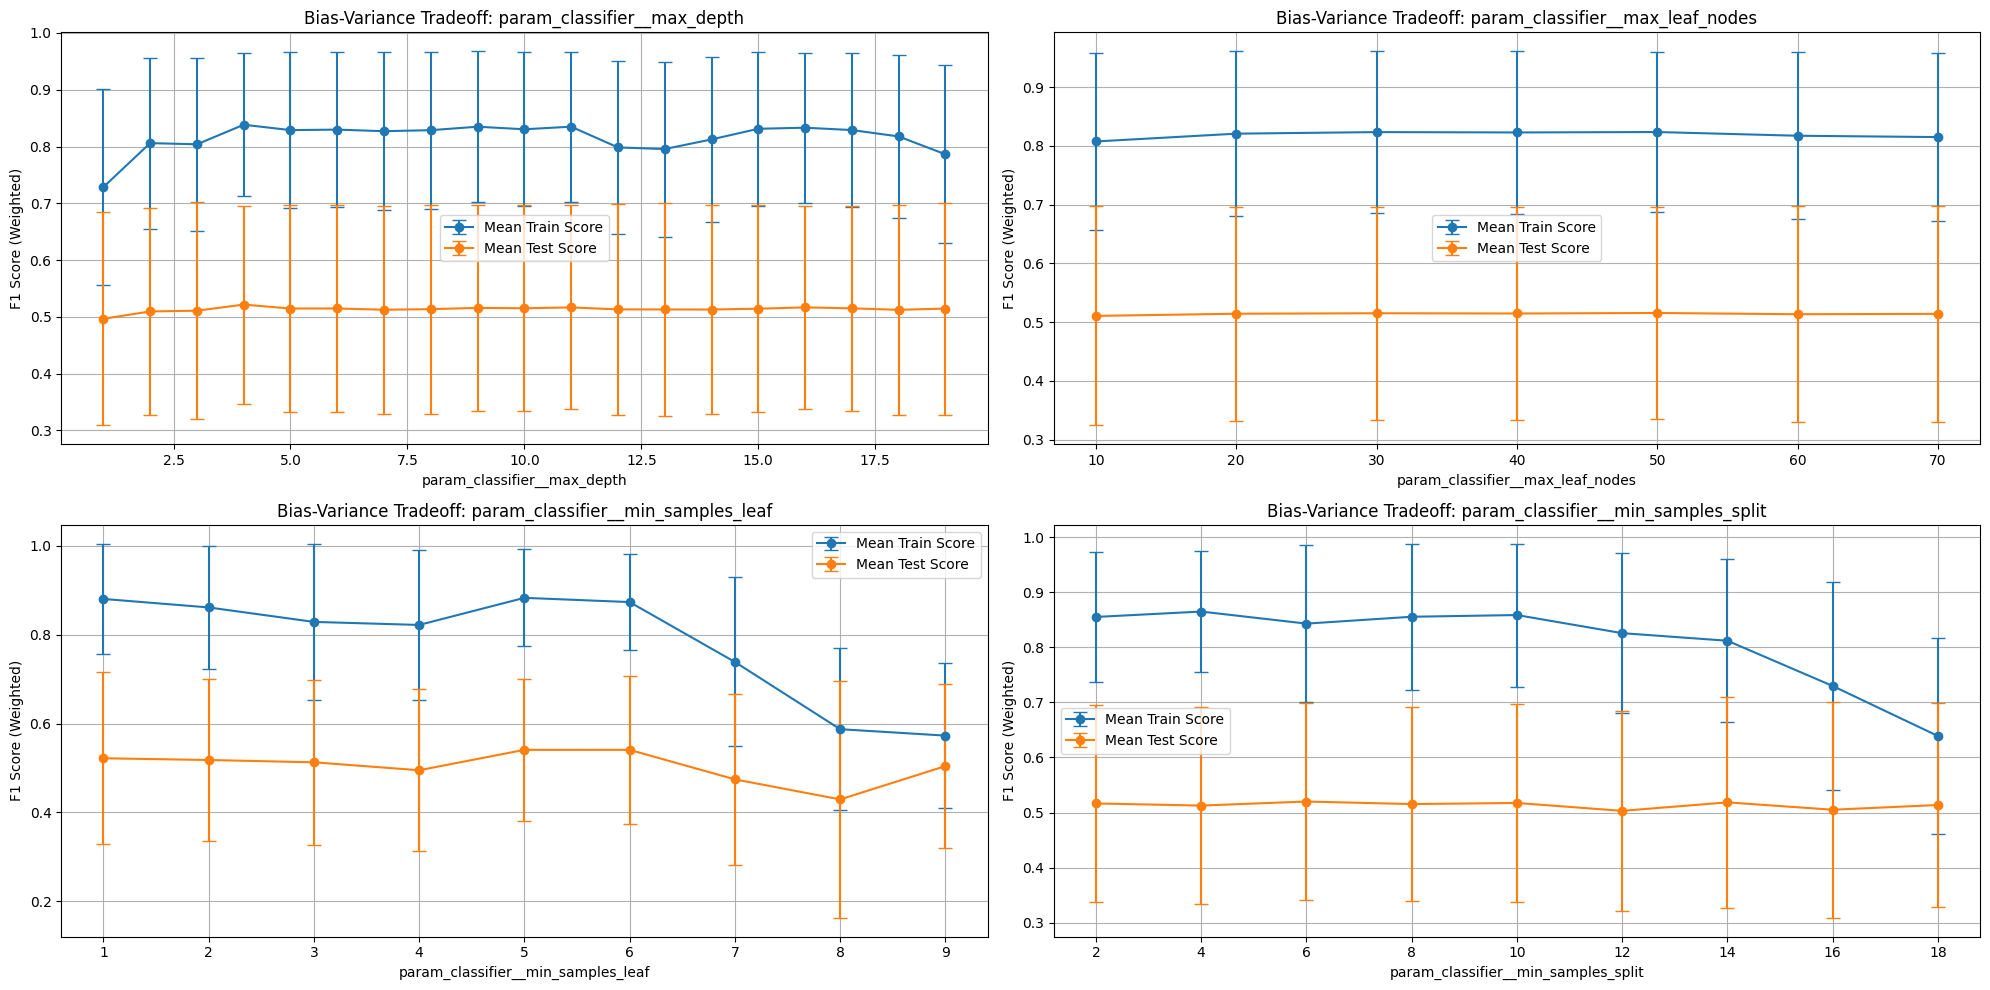

In [7]:
# Evaluation

for classifier_name, _ in classifiers.items():
        for exchange, data_type in product(ALL_MODELS, DATA_TYPES):
                model_path = os.path.join(MODELS_DATA_PATH, f"{classifier_name}_{exchange}_{data_type}.pkl")
                
                if not os.path.exists(model_path):
                    continue

                with open(model_path, "rb") as model_file:
                    btcf = pickle.load(model_file)

                btcf.evaluate()

                save_model(btcf, classifier_name, exchange, data_type)
                
                print(f"\nBest params for {classifier_name} model for {exchange} - {data_type}")
                print(btcf.results['best_params'])
                
                # Plots
                filename_prefix = f"{classifier_name}_{exchange}_{data_type}"
                val_curve_param = 'classifier__max_depth'

                btcf.plot_learn_cm_feat(f"{filename_prefix}_learn_val_feat.png")
                btcf.plot_bias_variance_tradeoff(f"{filename_prefix}_bias_variance_tradeoff.png")

In [8]:
# Best results & Comparison

eval_results = []
t_test_data = []
comparison_data = []
t_test_metrics = ['mean_test_score', 'mean_train_score', 'std_test_score', 'std_train_score']

for classifier_name, _ in classifiers.items():
    for exchange, data_type in product(EXCHANGES, DATA_TYPES):
        model_path = os.path.join(MODELS_DATA_PATH, f"{classifier_name}_{exchange}_{data_type}.pkl")
        if not os.path.exists(model_path):
            continue

        with open(model_path, "rb") as model_file:
            btcf = pickle.load(model_file)

        # Common fields
        common_fields = {
            'classifier': classifier_name,
            'exchange': exchange,
            'data_type': data_type,
        }

        # Collect evaluation metrics
        eval_metrics = [x for x in btcf.results.keys() if x not in ['best_params', 'conf_matrix', 'cv_results', 'classification_report', 'feature_selection']]
        metrics_dict = {metric: btcf.results[metric] for metric in eval_metrics}
        eval_record = common_fields.copy()
        eval_record.update(btcf.results['best_params'])
        eval_record.update(metrics_dict)
        eval_results.append(eval_record)

        # Collect t-test data
        t_record = {metric: btcf.results['cv_results'][metric] for metric in t_test_metrics}
        t_record.update(common_fields)
        t_test_data.append(t_record)

        # Combine records for comparison
        comparison_record = eval_record.copy()  # Avoid updating eval_record with t_record
        comparison_record.update(t_record)
        comparison_data.append(comparison_record)

# Convert to DataFrame
results_df = pd.DataFrame(eval_results)
results_df.to_csv(os.path.join(REPORTS_PATH, 'best_scores.csv'), index=False)
display(results_df)

# Perform t-tests
ttest_dfs = []
for metric in t_test_metrics:
    df = pd.DataFrame(t_test_data)
    ttest_df = perform_ttest(df, metric)
    ttest_dfs.append(ttest_df)

ttest_comparison = pd.concat(ttest_dfs, ignore_index=True)
ttest_comparison.to_csv(os.path.join(REPORTS_PATH, 't_test_comparison.csv'), index=False)
display(ttest_comparison)

# Compute comparisons
data_types = results_df['data_type'].unique()
comparison_dfs = []
for data_type in data_types:
    df = pd.DataFrame(comparison_data)
    comparison_df = compute_comparison(df[df['data_type'] == data_type], data_type)
    comparison_dfs.append(comparison_df)

bootstrap_comparison = pd.concat(comparison_dfs, ignore_index=True)
bootstrap_comparison.to_csv(os.path.join(REPORTS_PATH, 'bootstrap_comparison.csv'), index=False)
display(bootstrap_comparison)

classifier exchange  data_type  classifier__max_depth  \
0            Decision_Tree  BINANCE    candles                      7   
1            Decision_Tree  BINANCE  orderbook                     17   
2            Decision_Tree  BINANCE    unified                     13   
3            Decision_Tree    HUOBI    candles                     11   
4            Decision_Tree    HUOBI  orderbook                     16   
5            Decision_Tree    HUOBI    unified                     19   
6            Decision_Tree      OKX    candles                      9   
7            Decision_Tree      OKX  orderbook                     17   
8            Decision_Tree      OKX    unified                      8   
9   RFC_balanced_subsample  BINANCE    candles                     10   
10  RFC_balanced_subsample  BINANCE  orderbook                     13   
11  RFC_balanced_subsample  BINANCE    unified                      6   
12  RFC_balanced_subsample    HUOBI    candles                      8   
13  RFC_balanced_subsample    HUOBI  orderbook                     19   
14  RFC_balanced_subsample    HUOBI    unified                     13   
15  RFC_balanced_subsample      OKX    candles                      9   
16  RFC_balanced_subsample      OKX  orderbook                     15   
17  RFC_balanced_subsample      OKX    unified                     19   

    classifier__max_leaf_nodes  classifier__min_samples_leaf  \
0                           70                             2   
1                           70                             4   
2                           70                             1   
3                           60                             1   
4                           70                             1   
5                           60                             5   
6                           70                             1   
7                           50                             1   
8                           70                             1   
9                           70                             6   
10                          70                             5   
11                          70                             3   
12                          70                             1   
13                          70                             4   
14                          70                             4   
15                          70                             2   
16                          70                             4   
17                          70                             2   

    classifier__min_samples_split  best_score  accuracy_balanced  \
0                               4    0.576463           0.421356   
1                               2    0.430864           0.371325   
2                               8    0.535140           0.420830   
3                               2    0.413923           0.453043   
4                               6    0.335179           0.351634   
5                               4    0.443605           0.439748   
6                               6    0.393300           0.459337   
7                               2    0.352529           0.379101   
8                               6    0.488706           0.450856   
9                              12    0.593220           0.435290   
10                             14    0.454187           0.396799   
11                              4    0.569034           0.416497   
12                              2    0.453942           0.452697   
13                             16    0.513713           0.408273   
14                             16    0.567647           0.453473   
15                              4    0.490818           0.458625   
16                             14    0.460279           0.413182   
17                             14    0.546845           0.442189   

    precision_macro  recall_macro  fscore_macro  precision_weighted  \
0          0.450853      0.421356      0.431308

data_type exchange1 exchange2            metric     t_stat        p_value
0     candles   BINANCE     HUOBI   mean_test_score  51.137221   0.000000e+00
1     candles   BINANCE       OKX   mean_test_score -36.442486  1.574090e-285
2     candles     HUOBI       OKX   mean_test_score -73.535570   0.000000e+00
3   orderbook   BINANCE     HUOBI   mean_test_score  46.463430   0.000000e+00
4   orderbook   BINANCE       OKX   mean_test_score  54.247097   0.000000e+00
5   orderbook     HUOBI       OKX   mean_test_score  -1.508220   1.315061e-01
6     unified   BINANCE     HUOBI   mean_test_score -20.439792   2.037476e-92
7     unified   BINANCE       OKX   mean_test_score   9.166829   5.084404e-20
8     unified     HUOBI       OKX   mean_test_score  28.107971  3.192992e-172
9     candles   BINANCE     HUOBI  mean_train_score -21.138008   1.129437e-98
10    candles   BINANCE       OKX  mean_train_score   4.718114   2.387878e-06
11    candles     HUOBI       OKX  mean_train_score  25.541627  7.918166e-143
12  orderbook   BINANCE     HUOBI  mean_train_score  38.603643   0.000000e+00
13  orderbook   BINANCE       OKX  mean_train_score   4.833819   1.344195e-06
14  orderbook     HUOBI       OKX  mean_train_score -32.188542  1.741399e-224
15    unified   BINANCE     HUOBI  mean_train_score  13.119487   3.069705e-39
16    unified   BINANCE       OKX  mean_train_score  11.306633   1.339387e-29
17    unified     HUOBI       OKX  mean_train_score  -0.304464   7.607763e-01
18    candles   BINANCE     HUOBI    std_test_score -17.452964   5.641726e-68
19    candles   BINANCE       OKX    std_test_score -48.760394   0.000000e+00
20    candles     HUOBI       OKX    std_test_score -31.913666  8.187463e-221
21  orderbook   BINANCE     HUOBI    std_test_score -27.137273  1.251242e-160
22  orderbook   BINANCE       OKX    std_test_score  67.780807   0.000000e+00
23  orderbook     HUOBI       OKX    std_test_score  80.242467   0.000000e+00
24    unified   BINANCE     HUOBI    std_test_score -52.634802   0.000000e+00
25    unified   BINANCE       OKX    std_test_score  50.861854   0.000000e+00
26    unified     HUOBI       OKX    std_test_score  94.551978   0.000000e+00
27    candles   BINANCE     HUOBI   std_train_score -17.456430   5.348855e-68
28    candles   BINANCE       OKX   std_train_score  -7.449767   9.526235e-14
29    candles     HUOBI       OKX   std_train_score  10.223054   1.668071e-24
30  orderbook   BINANCE     HUOBI   std_train_score  45.896507   0.000000e+00
31  orderbook   BINANCE       OKX   std_train_score  -9.824469   9.342206e-23
32  orderbook     HUOBI       OKX   std_train_score -52.936190   0.000000e+00
33    unified   BINANCE     HUOBI   std_train_score  -7.177317   7.224068e-13
34    unified   BINANCE       OKX   std_train_score  33.855642  8.257996e-248
35    unified     HUOBI       OKX   std_train_score  43.001880   0.000000e+00

data_type exchange1 exchange2  exchange1_mean_lower  exchange1_mean_upper  \
0    candles   BINANCE     HUOBI              0.521097              0.523570   
1    candles   BINANCE       OKX              0.521088              0.523510   
2    candles     HUOBI       OKX              0.455656              0.457191   
3  orderbook   BINANCE     HUOBI              0.461887              0.464180   
4  orderbook   BINANCE       OKX              0.461733              0.464193   
5  orderbook     HUOBI       OKX              0.421707              0.424218   
6    unified   BINANCE     HUOBI              0.381350              0.383015   
7    unified   BINANCE       OKX              0.381349              0.383033   
8    unified     HUOBI       OKX              0.428060              0.430538   

   exchange2_mean_lower  exchange2_mean_upper  mean_diff_lower  \
0              0.455740              0.457198         0.064388   
1              0.489873              0.491821         0.029854   
2              0.489791              0.491781        -0.035660   
3              0.421754              0.424207         0.038365   
4              0.377727              0.379464         0.082984   
5              0.377755              0.379461         0.042795   
6              0.428110              0.430558        -0.048598   
7              0.416677              0.418618        -0.036688   
8              0.416578              0.418703         0.010102   

   mean_diff_upper  exchange1_ci_percentage  exchange2_ci_percentage  \
0         0.067290                 0.474474                 0.319832   
1         0.032969                 0.464941                 0.397713   
2        -0.033050                 0.336923                 0.406228   
3         0.041685                 0.496577                 0.581804   
4         0.085857                 0.532819                 0.459971   
5         0.045869                 0.595454                 0.451768   
6        -0.045726                 0.436514                 0.571938   
7        -0.034101                 0.441759                 0.465839   
8         0.013295                 0.578913                 0.510018   

   mean_diff_ci_percentage  
0                 4.506139  
1                10.433603  
2                 7.320618  
3                 8.654900  
4                 3.461797  
5                 7.182199  
6                 5.909840  
7                 7.050798  
8                31.612837